# SNVs and Indel frequency over time  
**Author**: Katarina Braun 


## Overview
- Merge SNVs and indels across each day post infection 
    - Use only intersection SNVs
- Save these dataframes as CSV files
- Plot the dataframes as line plots 
    - X: DPI
    - Y: SNV/indel frequency  

### Reference 

Everything was mapped to the Japan reference sequence (MW219695.1) -- this is the consensus sequence for the inoculum that was used to infect the cats we are evaluating here. 

Nucleotide numbering scheme will therefore differ from the the numbering scheme used in Nextstrain. 

[Link](https://www.ncbi.nlm.nih.gov/nuccore/MW219695.1) to GenBank accession page for the reference sequence.

[Link](https://www.nejm.org/doi/full/10.1056/nejmc2013400) to the original NEJM report on transmission of SARS-CoV-2 in domestic cats by Halfmann et al. 

## Transmission events: 
1. pair 1 day 2 --> day 3
2. pair 2 day 5 --> day 6 
3. pair 3 day 4 --> day 5


## Input: 

1. Cleaned vcf files: 
    - `SARSCoV2_transmission_in_domestic_cats/data_derived/cleaned/*`

## Output: 

1. CSV files with all variants over time within each cat and each transmisison pair:       
     - `SARSCoV2_transmission_in_domestic_cats/data_derived/cleaned/*`


2. Figures showing variants frequencies over time:   
     - `SARSCoV2_in_domestic_cats/figure/*`


## Import modules and dependencies

In [203]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table

In [204]:
# get all datafrmes uploaded

stock = pd.read_csv('../data_derived/cleaned/343_p2_Tokyo-cleaned.csv', sep='\t')
stock = stock[['SNP', 'POS', 'FREQ']]
stock = stock.rename(columns={'FREQ': '%'}) 

cat1_1 = pd.read_csv('../data_derived/cleaned/1_1-intersection.csv', sep='\t')
cat1_1 = cat1_1[['SNP', 'POS_x', '%']]
cat1_1 = cat1_1.rename(columns={'POS_x': 'POS'})

cat1_2 = pd.read_csv('../data_derived/cleaned/1_2-intersection.csv', sep='\t')
cat1_2 = cat1_2[['SNP', 'POS_x', '%']]
cat1_2 = cat1_2.rename(columns={'POS_x': 'POS'})

cat1_3 = pd.read_csv('../data_derived/cleaned/1_3-intersection.csv', sep='\t')
cat1_3 = cat1_3[['SNP', 'POS_x', '%']]
cat1_3 = cat1_3.rename(columns={'POS_x': 'POS'})

cat1_4 = pd.read_csv('../data_derived/cleaned/1_4-intersection.csv', sep='\t')
cat1_4 = cat1_4[['SNP', 'POS_x', '%']]
cat1_4 = cat1_4.rename(columns={'POS_x': 'POS'})

cat1_5 = pd.read_csv('../data_derived/cleaned/1_5-intersection.csv', sep='\t')
cat1_5 = cat1_5[['SNP', 'POS_x', '%']]
cat1_5 = cat1_5.rename(columns={'POS_x': 'POS'})

cat1_6 = pd.read_csv('../data_derived/cleaned/1_6-intersection.csv', sep='\t')
cat1_6 = cat1_6[['SNP', 'POS_x', '%']]
cat1_6 = cat1_6.rename(columns={'POS_x': 'POS'})

cat1_7 = pd.read_csv('../data_derived/cleaned/1_7-intersection.csv', sep='\t')
cat1_7 = cat1_7[['SNP', 'POS_x', '%']]
cat1_7 = cat1_7.rename(columns={'POS_x': 'POS'})

cat1_8 = pd.read_csv('../data_derived/cleaned/1_8-intersection.csv', sep='\t')
cat1_8 = cat1_8[['SNP', 'POS_x', '%']]
cat1_8 = cat1_8.rename(columns={'POS_x': 'POS'})


# start merging

cat1_stock = pd.merge(stock, cat1_1, on='SNP', how='outer')
cat1_stock['POS_x'] = cat1_stock['POS_x'].fillna(cat1_stock['POS_y'])
cat1_stock = cat1_stock.rename(columns={'POS_x': 'POS', '%_x':'stock', '%_y':'DPI 1'})
cat1_stock = cat1_stock[['SNP', 'POS', 'stock', 'DPI 1']]

cat1a = pd.merge(cat1_stock, cat1_2, on='SNP', how='outer')
cat1a['POS_x'] = cat1a['POS_x'].fillna(cat1a['POS_y'])
cat1a = cat1a.rename(columns={'POS_x': 'POS', '%':'DPI 2'})
cat1a = cat1a[['SNP', 'POS', 'stock', 'DPI 1', 'DPI 2']]

cat1b = pd.merge(cat1a, cat1_3, on='SNP', how='outer')
cat1b['POS_x'] = cat1b['POS_x'].fillna(cat1b['POS_y'])
cat1b = cat1b.rename(columns={'POS_x': 'POS', '%':'DPI 3'})
cat1b = cat1b[['SNP', 'POS', 'stock', 'DPI 1', 'DPI 2', 'DPI 3']]

cat1c = pd.merge(cat1b, cat1_4, on='SNP', how='outer')
cat1c['POS_x'] = cat1c['POS_x'].fillna(cat1c['POS_y'])
cat1c = cat1c.rename(columns={'POS_x': 'POS', '%':'DPI 4'})
cat1c = cat1c[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4']]

cat1d = pd.merge(cat1c, cat1_5, on='SNP', how='outer')
cat1d['POS_x'] = cat1d['POS_x'].fillna(cat1d['POS_y'])
cat1d = cat1d.rename(columns={'POS_x': 'POS', '%':'DPI 5'})
cat1d = cat1d[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5']]

cat1e = pd.merge(cat1d, cat1_6, on='SNP', how='outer')
cat1e['POS_x'] = cat1e['POS_x'].fillna(cat1e['POS_y'])
cat1e = cat1e.rename(columns={'POS_x': 'POS', '%':'DPI 6'})
cat1e = cat1e[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6']]

cat1f = pd.merge(cat1e, cat1_7, on='SNP', how='outer')
cat1f['POS_x'] = cat1f['POS_x'].fillna(cat1f['POS_y'])
cat1f = cat1f.rename(columns={'POS_x': 'POS', '%':'DPI 7'})
cat1f = cat1f[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7']]

cat1g = pd.merge(cat1f, cat1_8, on='SNP', how='outer')
cat1g['POS_x'] = cat1g['POS_x'].fillna(cat1g['POS_y'])
cat1g = cat1g.rename(columns={'POS_x': 'POS', '%':'DPI 8'})
cat1 = cat1g[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

# sort on POS column 

cat1 = cat1.sort_values('POS', ascending=True)
# cat1 = cat1.replace(np.nan, 0)

cat1.to_csv('../data_derived/cleaned/cat1_snps_over_time.csv', sep='\t')


In [205]:
# split into synonymous, missense, frameshift

syn1 = cat1.SNP.str.contains('synonymous')
syn2 = cat1.SNP.str.contains('intergenic-region')
cat1_syn1 = cat1[syn1]
cat1_syn2 = cat1[syn2]
cat1_syn = pd.concat([cat1_syn1, cat1_syn2], axis=0)

mis = cat1.SNP.str.contains('missense')
cat1_mis = cat1[mis]

fs = cat1.SNP.str.contains('frameshift')
cat1_fs = cat1[fs]

intergenic = cat1.SNP.str.contains('intergenic')
cat1_intergenic = cat1[intergenic]

In [206]:
# synonymous

cat1_syn = cat1_syn.set_index('SNP')

cat1_syn = cat1_syn[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat1_syn_t = cat1_syn.T

# cat1_syn_t

In [207]:
# missense

cat1_mis = cat1_mis.set_index('SNP')

cat1_mis = cat1_mis[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat1_mis_t = cat1_mis.T

# cat1_mis_t

In [208]:
# frameshift

cat1_fs = cat1_fs.set_index('SNP')

cat1_fs = cat1_fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat1_fs_t = cat1_fs.T

# cat1_fs_t

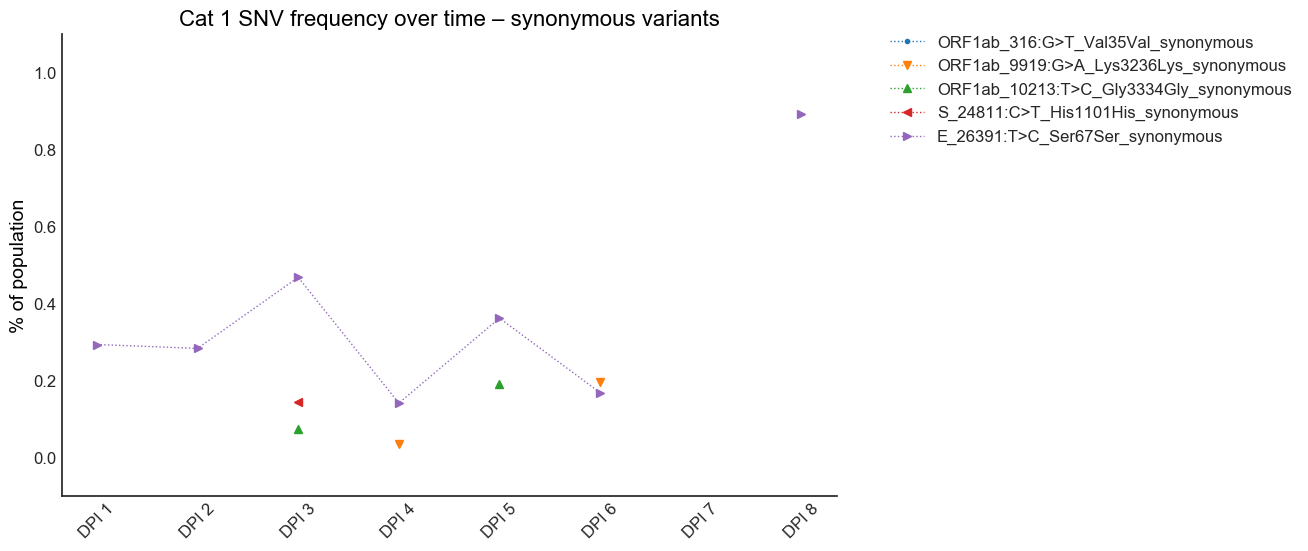

In [209]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat1_syn_t:
    num+=1
    plt.plot(cat1_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 1 SNV frequency over time – synonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat1_synonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)


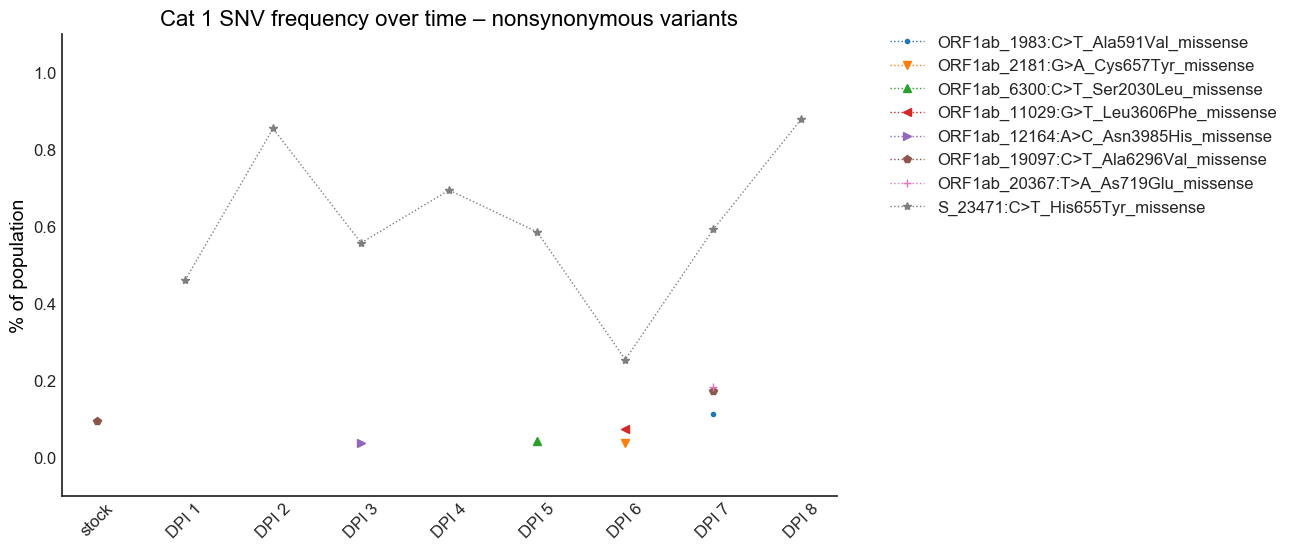

In [210]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat1_mis_t:
    num+=1
    plt.plot(cat1_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 1 SNV frequency over time – nonsynonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat1_nonsynonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)


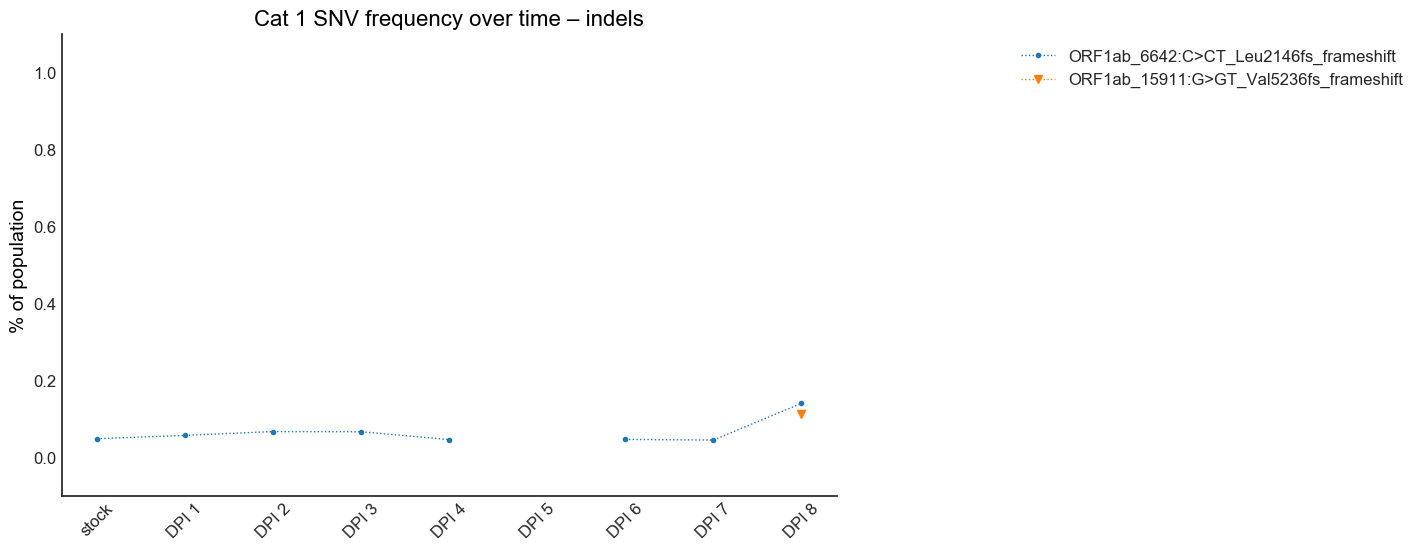

In [211]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat1_fs_t:
    num+=1
    plt.plot(cat1_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.75, 1.0), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 1 SNV frequency over time – indels", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat1_indels_snps_over_time.svg", bbox_inches='tight', dpi=300)



In [212]:
# get all datafrmes uploaded

stock = pd.read_csv('../data_derived/cleaned/343_p2_Tokyo-cleaned.csv', sep='\t')
stock = stock[['SNP', 'POS', 'FREQ']]
stock = stock.rename(columns={'FREQ': '%'})

cat2_1 = pd.read_csv('../data_derived/cleaned/2_1-intersection.csv', sep='\t')
cat2_1 = cat2_1[['SNP', 'POS_x', '%']]
cat2_1 = cat2_1.rename(columns={'POS_x': 'POS'})

cat2_2 = pd.read_csv('../data_derived/cleaned/2_2-intersection.csv', sep='\t')
cat2_2 = cat2_2[['SNP', 'POS_x', '%']]
cat2_2 = cat2_2.rename(columns={'POS_x': 'POS'})

cat2_3 = pd.read_csv('../data_derived/cleaned/2_3-intersection.csv', sep='\t')
cat2_3 = cat2_3[['SNP', 'POS_x', '%']]
cat2_3 = cat2_3.rename(columns={'POS_x': 'POS'})

cat2_4 = pd.read_csv('../data_derived/cleaned/2_4-intersection.csv', sep='\t')
cat2_4 = cat2_4[['SNP', 'POS_x', '%']]
cat2_4 = cat2_4.rename(columns={'POS_x': 'POS'})

cat2_5 = pd.read_csv('../data_derived/cleaned/2_5-intersection.csv', sep='\t')
cat2_5 = cat2_5[['SNP', 'POS_x', '%']]
cat2_5 = cat2_5.rename(columns={'POS_x': 'POS'})

cat2_6 = pd.read_csv('../data_derived/cleaned/2_6-intersection.csv', sep='\t')
cat2_6 = cat2_6[['SNP', 'POS_x', '%']]
cat2_6 = cat2_6.rename(columns={'POS_x': 'POS'})

cat2_7 = pd.read_csv('../data_derived/cleaned/2_7-intersection.csv', sep='\t')
cat2_7 = cat2_7[['SNP', 'POS_x', '%']]
cat2_7 = cat2_7.rename(columns={'POS_x': 'POS'})

cat2_8 = pd.read_csv('../data_derived/cleaned/2_8-intersection.csv', sep='\t')
cat2_8 = cat2_8[['SNP', 'POS_x', '%']]
cat2_8 = cat2_8.rename(columns={'POS_x': 'POS'})

# start merging

cat2_stock = pd.merge(stock, cat2_1, on='SNP', how='outer')
cat2_stock['POS_x'] = cat2_stock['POS_x'].fillna(cat2_stock['POS_y'])
cat2_stock = cat2_stock.rename(columns={'POS_x': 'POS', '%_x':'stock', '%_y':'DPI 1'})
cat2_stock = cat2_stock[['SNP', 'POS', 'stock', 'DPI 1']]

cat2a = pd.merge(cat2_stock, cat2_2, on='SNP', how='outer')
cat2a['POS_x'] = cat2a['POS_x'].fillna(cat2a['POS_y'])
cat2a = cat2a.rename(columns={'POS_x': 'POS', '%':'DPI 2'})
cat2a = cat2a[['SNP', 'POS', 'stock', 'DPI 1', 'DPI 2']]

cat2b = pd.merge(cat2a, cat2_3, on='SNP', how='outer')
cat2b['POS_x'] = cat2b['POS_x'].fillna(cat2b['POS_y'])
cat2b = cat2b.rename(columns={'POS_x': 'POS', '%':'DPI 3'})
cat2b = cat2b[['SNP', 'POS', 'stock', 'DPI 1', 'DPI 2', 'DPI 3']]

cat2c = pd.merge(cat2b, cat2_4, on='SNP', how='outer')
cat2c['POS_x'] = cat2c['POS_x'].fillna(cat2c['POS_y'])
cat2c = cat2c.rename(columns={'POS_x': 'POS', '%':'DPI 4'})
cat2c = cat2c[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4']]

cat2d = pd.merge(cat2c, cat2_5, on='SNP', how='outer')
cat2d['POS_x'] = cat2d['POS_x'].fillna(cat2d['POS_y'])
cat2d = cat2d.rename(columns={'POS_x': 'POS', '%':'DPI 5'})
cat2d = cat2d[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5']]

cat2e = pd.merge(cat2d, cat2_6, on='SNP', how='outer')
cat2e['POS_x'] = cat2e['POS_x'].fillna(cat2e['POS_y'])
cat2e = cat2e.rename(columns={'POS_x': 'POS', '%':'DPI 6'})
cat2e = cat2e[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6']]

cat2f = pd.merge(cat2e, cat2_7, on='SNP', how='outer')
cat2f['POS_x'] = cat2f['POS_x'].fillna(cat2f['POS_y'])
cat2f = cat2f.rename(columns={'POS_x': 'POS', '%':'DPI 7'})
cat2f = cat2f[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7']]

cat2g = pd.merge(cat2f, cat2_8, on='SNP', how='outer')
cat2g['POS_x'] = cat2g['POS_x'].fillna(cat2g['POS_y'])
cat2g = cat2g.rename(columns={'POS_x': 'POS', '%':'DPI 8'})
cat2 = cat2g[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

# sort on POS column 

cat2 = cat2.sort_values('POS', ascending=True)
# cat2 = cat2.replace(np.nan, 0)

cat2.to_csv('../data_derived/cleaned/cat2_snps_over_time.csv', sep='\t')

In [213]:
# split into synonymous, missense, frameshift, intergenic 

syn1 = cat2.SNP.str.contains('synonymous')
syn2 = cat2.SNP.str.contains('intergenic-region')
cat2_syn1 = cat2[syn1]
cat2_syn2 = cat2[syn2]
cat2_syn = pd.concat([cat2_syn1, cat2_syn2], axis=0)

mis = cat2.SNP.str.contains('missense')
cat2_mis = cat2[mis]

fs = cat2.SNP.str.contains('frameshift')
cat2_fs = cat2[fs]

# synonymous

cat2_syn = cat2_syn.set_index('SNP')

cat2_syn = cat2_syn[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat2_syn_t = cat2_syn.T

# cat2_syn_t

# missense

cat2_mis = cat2_mis.set_index('SNP')

cat2_mis = cat2_mis[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat2_mis_t = cat2_mis.T

# cat2_mis_t

# frameshift

# cat2_fs['SNP'] = cat2_fs['SNP'].replace({'S_21734:TTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACAC>T_Phe58fs_frameshift': 'S_21734_T[...]1543nts>T_Phe58fs_frameshift'})

cat2_fs = cat2_fs.set_index('SNP')

cat2_fs = cat2_fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat2_fs_t = cat2_fs.T

#

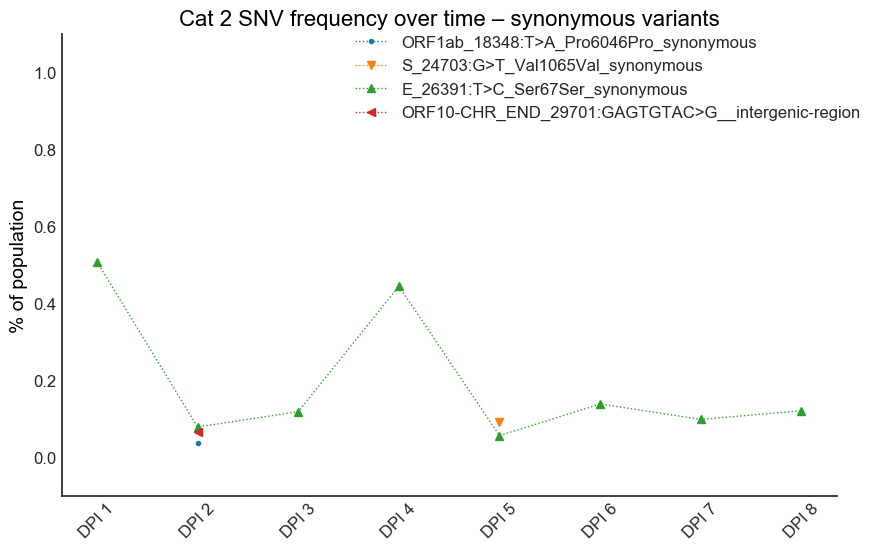

In [214]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat2_syn_t:
    num+=1
    plt.plot(cat2_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 2 SNV frequency over time – synonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat2_synonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)

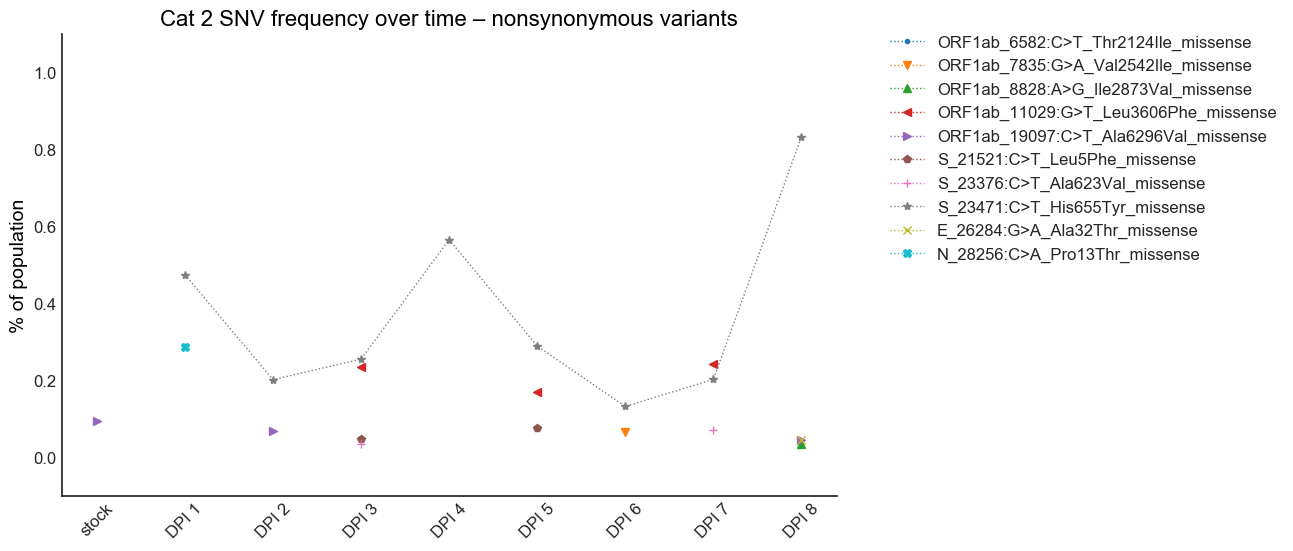

In [215]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat2_mis_t:
    num+=1
    plt.plot(cat2_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 2 SNV frequency over time – nonsynonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat2_nonsynonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)


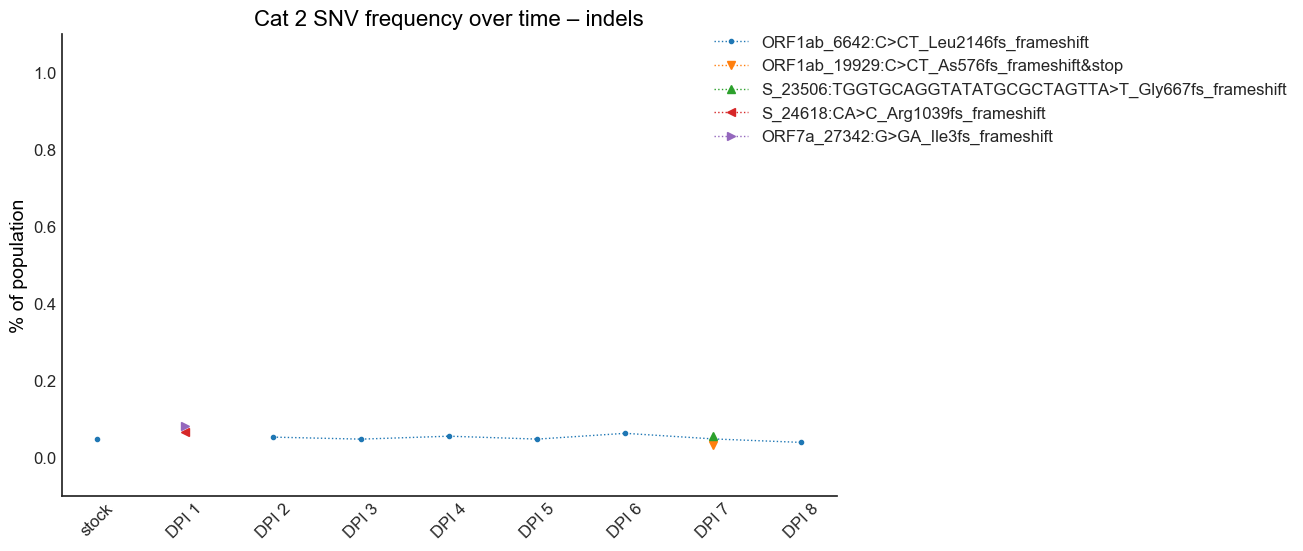

In [216]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat2_fs_t:
    num+=1
    plt.plot(cat2_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.6, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 2 SNV frequency over time – indels", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat2_indels_snps_over_time.svg", bbox_inches='tight', dpi=300)

#

In [217]:
# get all datafrmes uploaded

stock = pd.read_csv('../data_derived/cleaned/343_p2_Tokyo-cleaned.csv', sep='\t')
stock = stock[['SNP', 'POS', 'FREQ']]
stock = stock.rename(columns={'FREQ': '%'})

cat3_1 = pd.read_csv('../data_derived/cleaned/3_1-intersection.csv', sep='\t')
cat3_1 = cat3_1[['SNP', 'POS_x', '%']]
cat3_1 = cat3_1.rename(columns={'POS_x': 'POS'})

cat3_2 = pd.read_csv('../data_derived/cleaned/3_2-intersection.csv', sep='\t')
cat3_2 = cat3_2[['SNP', 'POS_x', '%']]
cat3_2 = cat3_2.rename(columns={'POS_x': 'POS'})

cat3_3 = pd.read_csv('../data_derived/cleaned/3_3-intersection.csv', sep='\t')
cat3_3 = cat3_3[['SNP', 'POS_x', '%']]
cat3_3 = cat3_3.rename(columns={'POS_x': 'POS'})

cat3_4 = pd.read_csv('../data_derived/cleaned/3_4-intersection.csv', sep='\t')
cat3_4 = cat3_4[['SNP', 'POS_x', '%']]
cat3_4 = cat3_4.rename(columns={'POS_x': 'POS'})

cat3_5 = pd.read_csv('../data_derived/cleaned/3_5-intersection.csv', sep='\t')
cat3_5 = cat3_5[['SNP', 'POS_x', '%']]
cat3_5 = cat3_5.rename(columns={'POS_x': 'POS'})

# cat3_6 = pd.read_csv('../data_derived/cleaned/3_6-intersection.csv', sep='\t')
# cat3_6 = cat3_6[['SNP', 'POS_x', '%']]
# cat3_6 = cat3_6.rename(columns={'POS_x': 'POS'})

cat3_7 = pd.read_csv('../data_derived/cleaned/3_7-intersection.csv', sep='\t')
cat3_7 = cat3_7[['SNP', 'POS_x', '%']]
cat3_7 = cat3_7.rename(columns={'POS_x': 'POS'})

cat3_8 = pd.read_csv('../data_derived/cleaned/3_8-intersection.csv', sep='\t')
cat3_8 = cat3_8[['SNP', 'POS_x', '%']]
cat3_8 = cat3_8.rename(columns={'POS_x': 'POS'})


# start merging

cat3_stock = pd.merge(stock, cat3_1, on='SNP', how='outer')
cat3_stock['POS_x'] = cat3_stock['POS_x'].fillna(cat3_stock['POS_y'])
cat3_stock = cat3_stock.rename(columns={'POS_x': 'POS', '%_x':'stock', '%_y':'DPI 1'})
cat3_stock = cat3_stock[['SNP', 'POS', 'stock', 'DPI 1']]

cat3a = pd.merge(cat3_stock, cat3_2, on='SNP', how='outer')
cat3a['POS_x'] = cat3a['POS_x'].fillna(cat3a['POS_y'])
cat3a = cat3a.rename(columns={'POS_x': 'POS', '%':'DPI 2'})
cat3a = cat3a[['SNP', 'POS', 'stock', 'DPI 1', 'DPI 2']]

cat3b = pd.merge(cat3a, cat3_3, on='SNP', how='outer')
cat3b['POS_x'] = cat3b['POS_x'].fillna(cat3b['POS_y'])
cat3b = cat3b.rename(columns={'POS_x': 'POS', '%':'DPI 3'})
cat3b = cat3b[['SNP', 'POS', 'stock', 'DPI 1', 'DPI 2', 'DPI 3']]

cat3c = pd.merge(cat3b, cat3_4, on='SNP', how='outer')
cat3c['POS_x'] = cat3c['POS_x'].fillna(cat3c['POS_y'])
cat3c = cat3c.rename(columns={'POS_x': 'POS', '%':'DPI 4'})
cat3c = cat3c[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4']]

cat3d = pd.merge(cat3c, cat3_5, on='SNP', how='outer')
cat3d['POS_x'] = cat3d['POS_x'].fillna(cat3d['POS_y'])
cat3d = cat3d.rename(columns={'POS_x': 'POS', '%':'DPI 5'})
cat3d = cat3d[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5']]

# cat3e = pd.merge(cat3d, cat3_6, on='SNP', how='outer')
# cat3e['POS_x'] = cat3e['POS_x'].fillna(cat3e['POS_y'])
# cat3e = cat3e.rename(columns={'POS_x': 'POS', '%':'DPI 6'})
# cat3e = cat3e[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6']]

cat3f = pd.merge(cat3d, cat3_7, on='SNP', how='outer')
cat3f['POS_x'] = cat3f['POS_x'].fillna(cat3f['POS_y'])
cat3f = cat3f.rename(columns={'POS_x': 'POS', '%':'DPI 7'})
cat3f = cat3f[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 7']]

cat3g = pd.merge(cat3f, cat3_8, on='SNP', how='outer')
cat3g['POS_x'] = cat3g['POS_x'].fillna(cat3g['POS_y'])
cat3g = cat3g.rename(columns={'POS_x': 'POS', '%':'DPI 8'})
cat3 = cat3g[['SNP', 'POS','stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 7', 'DPI 8']]

# sort on POS column 

cat3 = cat3.sort_values('POS', ascending=True)
# cat3 = cat3.replace(np.nan, 0)

cat3.to_csv('../data_derived/cleaned/cat3_snps_over_time.csv', sep='\t')

In [218]:
# split into synonymous, missense, frameshift, intergenic 

syn1 = cat3.SNP.str.contains('synonymous')
syn2 = cat3.SNP.str.contains('intergenic-region')
cat3_syn1 = cat3[syn1]
cat3_syn2 = cat3[syn2]
cat3_syn = pd.concat([cat3_syn1, cat3_syn2], axis=0)

mis = cat3.SNP.str.contains('missense')
cat3_mis = cat3[mis]

fs = cat3.SNP.str.contains('frameshift')
cat3_fs = cat3[fs]

intergenic = cat3.SNP.str.contains('intergenic')
cat3_intergenic = cat3[intergenic]

# synonymous

cat3_syn = cat3_syn.set_index('SNP')

cat3_syn = cat3_syn[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 7', 'DPI 8']]

cat3_syn_t = cat3_syn.T

# cat3_syn_t

# missense

cat3_mis = cat3_mis.set_index('SNP')

cat3_mis = cat3_mis[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 7', 'DPI 8']]

cat3_mis_t = cat3_mis.T

# cat3_mis_t

# frameshift

cat3_fs = cat3_fs.set_index('SNP')

cat3_fs = cat3_fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 7', 'DPI 8']]

cat3_fs_t = cat3_fs.T

# cat3_fs_t

# intergenic

cat3_intergenic = cat3_intergenic.set_index('SNP')

cat3_intergenic = cat3_intergenic[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 7', 'DPI 8']]

cat3_intergenic_t = cat3_intergenic.T

# cat3_intergenic_t

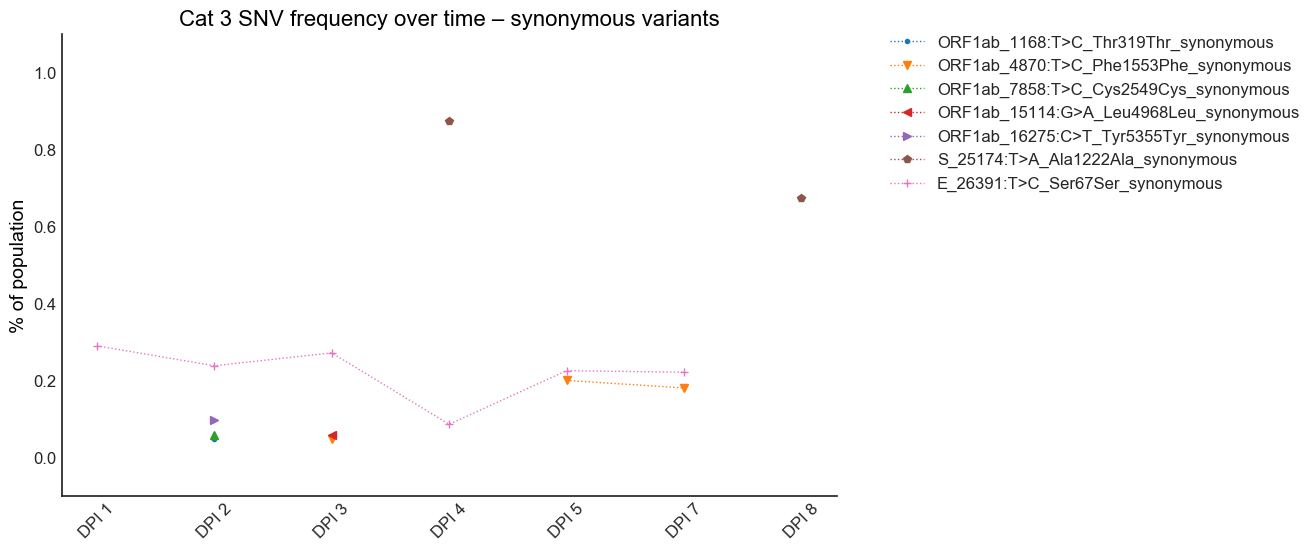

In [219]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat3_syn_t:
    num+=1
    plt.plot(cat3_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 3 SNV frequency over time – synonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat3_synonymous_snps.svg", bbox_inches='tight', dpi=300)

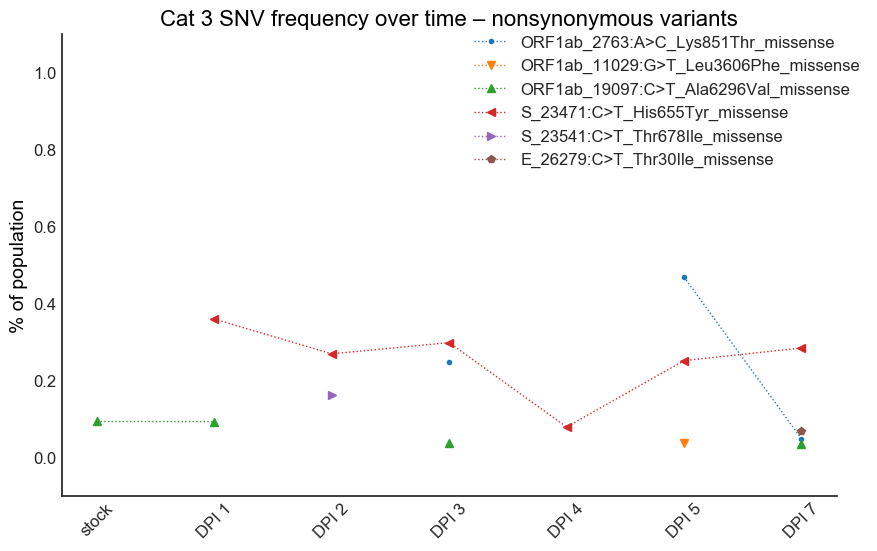

In [220]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat3_mis_t:
    num+=1
    plt.plot(cat3_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 3 SNV frequency over time – nonsynonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat3_nonsynonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)

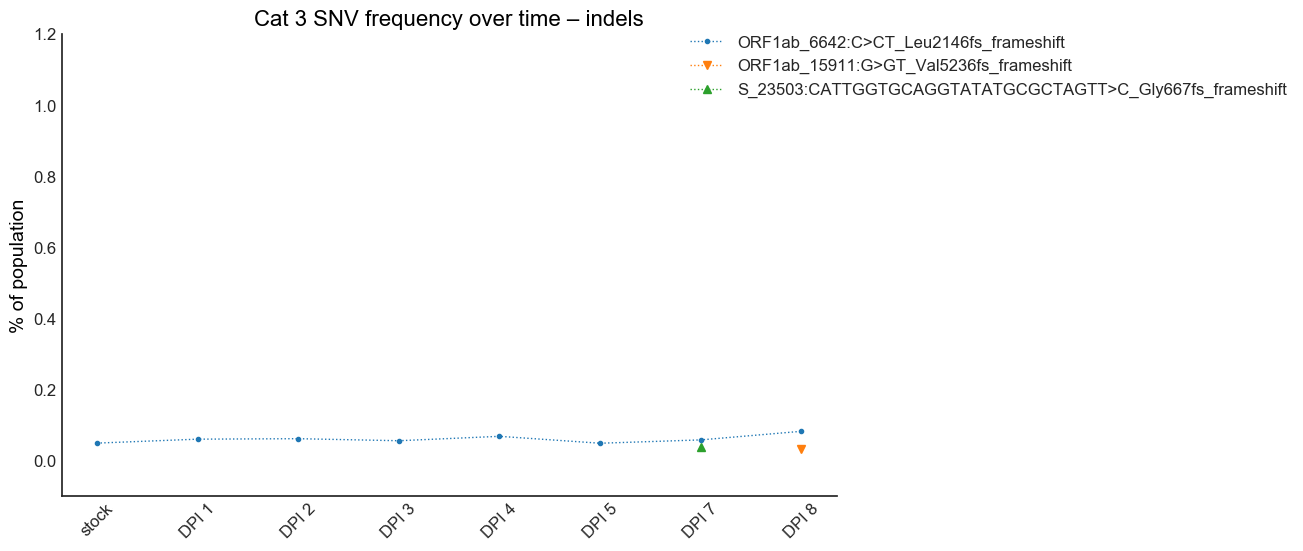

In [221]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat3_fs_t:
    num+=1
    plt.plot(cat3_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.6, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.2])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 3 SNV frequency over time – indels", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat3_indels_snps_over_time.svg", bbox_inches='tight', dpi=300)

In [222]:
# get all datafrmes uploaded
stock = pd.read_csv('../data_derived/cleaned/343_p2_Tokyo-cleaned.csv', sep='\t')
stock = stock[['SNP', 'POS', 'FREQ']]
stock = stock.rename(columns={'FREQ': '%'})

cat4_3 = pd.read_csv('../data_derived/cleaned/4_3-intersection.csv', sep='\t')
cat4_3 = cat4_3[['SNP', 'POS_x', '%']]
cat4_3 = cat4_3.rename(columns={'POS_x': 'POS'})

cat4_4 = pd.read_csv('../data_derived/cleaned/4_4-intersection.csv', sep='\t')
cat4_4 = cat4_4[['SNP', 'POS_x', '%']]
cat4_4 = cat4_4.rename(columns={'POS_x': 'POS'})

cat4_5 = pd.read_csv('../data_derived/cleaned/4_5-intersection.csv', sep='\t')
cat4_5 = cat4_5[['SNP', 'POS_x', '%']]
cat4_5 = cat4_5.rename(columns={'POS_x': 'POS'})

cat4_6 = pd.read_csv('../data_derived/cleaned/4_6-intersection.csv', sep='\t')
cat4_6 = cat4_6[['SNP', 'POS_x', '%']]
cat4_6 = cat4_6.rename(columns={'POS_x': 'POS'})

cat4_7 = pd.read_csv('../data_derived/cleaned/4_7-intersection.csv', sep='\t')
cat4_7 = cat4_7[['SNP', 'POS_x', '%']]
cat4_7 = cat4_7.rename(columns={'POS_x': 'POS'})

cat4_8 = pd.read_csv('../data_derived/cleaned/4_8-intersection.csv', sep='\t')
cat4_8 = cat4_8[['SNP', 'POS_x', '%']]
cat4_8 = cat4_8.rename(columns={'POS_x': 'POS'})

cat4_9 = pd.read_csv('../data_derived/cleaned/4_9-intersection.csv', sep='\t')
cat4_9 = cat4_9[['SNP', 'POS_x', '%']]
cat4_9 = cat4_9.rename(columns={'POS_x': 'POS'})

cat4_10 = pd.read_csv('../data_derived/cleaned/4_10-intersection.csv', sep='\t')
cat4_10 = cat4_10[['SNP', 'POS_x', '%']]
cat4_10 = cat4_10.rename(columns={'POS_x': 'POS'})


# start merging
cat4_stock = pd.merge(stock, cat4_3, on='SNP', how='outer')
cat4_stock['POS_x'] = cat4_stock['POS_x'].fillna(cat4_stock['POS_y'])
cat4_stock = cat4_stock.rename(columns={'POS_x': 'POS', '%_x':'stock', '%_y':'DPI 3'})
cat4_stock = cat4_stock[['SNP', 'POS', 'stock', 'DPI 3']]

cat4a = pd.merge(cat4_stock, cat4_4, on='SNP', how='outer')
cat4a['POS_x'] = cat4a['POS_x'].fillna(cat4a['POS_y'])
cat4a = cat4a.rename(columns={'POS_x': 'POS', '%':'DPI 4'})
cat4a = cat4a[['SNP', 'POS', 'stock', 'DPI 3', 'DPI 4']]

cat4b = pd.merge(cat4a, cat4_5, on='SNP', how='outer')
cat4b['POS_x'] = cat4b['POS_x'].fillna(cat4b['POS_y'])
cat4b = cat4b.rename(columns={'POS_x': 'POS', '%':'DPI 5'})
cat4b = cat4b[['SNP', 'POS', 'DPI 3', 'DPI 4', 'DPI 5']]

cat4c = pd.merge(cat4b, cat4_6, on='SNP', how='outer')
cat4c['POS_x'] = cat4c['POS_x'].fillna(cat4c['POS_y'])
cat4c = cat4c.rename(columns={'POS_x': 'POS', '%':'DPI 6'})
cat4c = cat4c[['SNP', 'POS', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6']]

cat4d = pd.merge(cat4c, cat4_7, on='SNP', how='outer')
cat4d['POS_x'] = cat4d['POS_x'].fillna(cat4d['POS_y'])
cat4d = cat4d.rename(columns={'POS_x': 'POS', '%':'DPI 7'})
cat4d = cat4d[['SNP', 'POS','DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7']]

cat4e = pd.merge(cat4d, cat4_8, on='SNP', how='outer')
cat4e['POS_x'] = cat4e['POS_x'].fillna(cat4e['POS_y'])
cat4e = cat4e.rename(columns={'POS_x': 'POS', '%':'DPI 8'})
cat4e = cat4e[['SNP', 'POS','DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat4f = pd.merge(cat4e, cat4_9, on='SNP', how='outer')
cat4f['POS_x'] = cat4f['POS_x'].fillna(cat4f['POS_y'])
cat4f = cat4f.rename(columns={'POS_x': 'POS', '%':'DPI 9'})
cat4f = cat4f[['SNP', 'POS', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9']]

cat4g = pd.merge(cat4f, cat4_10, on='SNP', how='outer')
cat4g['POS_x'] = cat4g['POS_x'].fillna(cat4g['POS_y'])
cat4g = cat4g.rename(columns={'POS_x': 'POS', '%':'DPI 10'})
cat4 = cat4g[['SNP', 'POS', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

# # sort on POS column 

cat4 = cat4.sort_values('POS', ascending=True)
# cat4 = cat4.replace(np.nan, 0)

cat4.to_csv('../data_derived/cleaned/cat4_snps_over_time.csv', sep='\t')

In [223]:
# split into synonymous, missense, frameshift, intergenic 

syn1 = cat4.SNP.str.contains('synonymous')
syn2 = cat4.SNP.str.contains('intergenic-region')
cat4_syn1 = cat4[syn1]
cat4_syn2 = cat4[syn2]
cat4_syn = pd.concat([cat4_syn1, cat4_syn2], axis=0)

mis = cat4.SNP.str.contains('missense')
cat4_mis = cat4[mis]

fs = cat4.SNP.str.contains('frameshift')
cat4_fs = cat4[fs]

# synonymous

cat4_syn = cat4_syn.set_index('SNP')

cat4_syn = cat4_syn[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat4_syn_t = cat4_syn.T

# cat4_syn_t

# missense

cat4_mis = cat4_mis.set_index('SNP')

cat4_mis = cat4_mis[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat4_mis_t = cat4_mis.T

# cat4_mis_t

# frameshift

cat4_fs = cat4_fs.set_index('SNP')

cat4_fs = cat4_fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat4_fs_t = cat4_fs.T

# cat4_fs_t

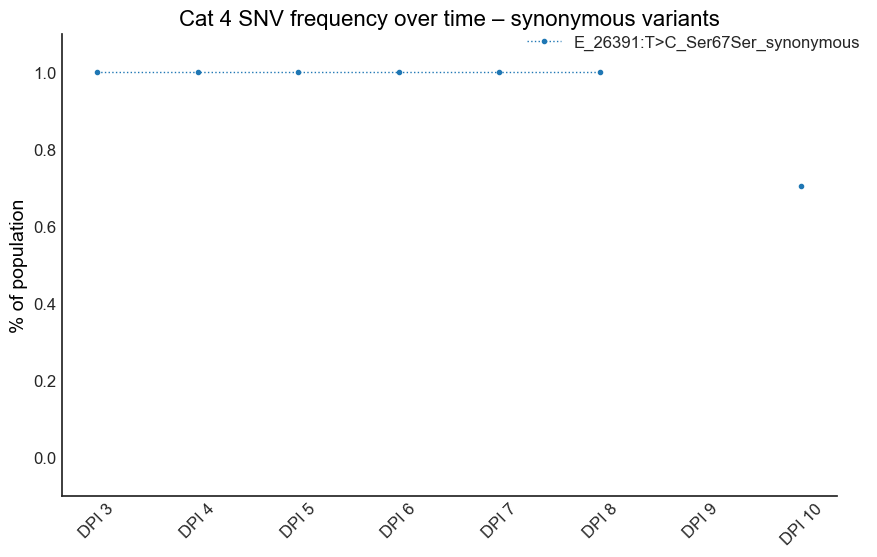

In [224]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat4_syn_t:
    num+=1
    plt.plot(cat4_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 4 SNV frequency over time – synonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat4_synonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)

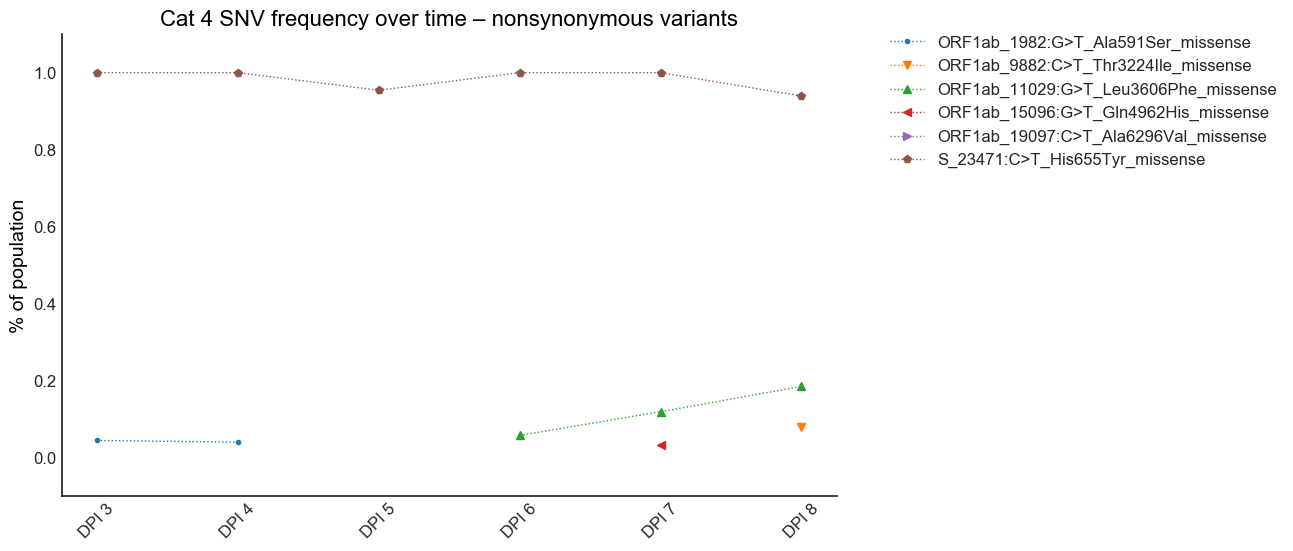

In [225]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat4_mis_t:
    num+=1
    plt.plot(cat4_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 4 SNV frequency over time – nonsynonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat4_nonsynonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)

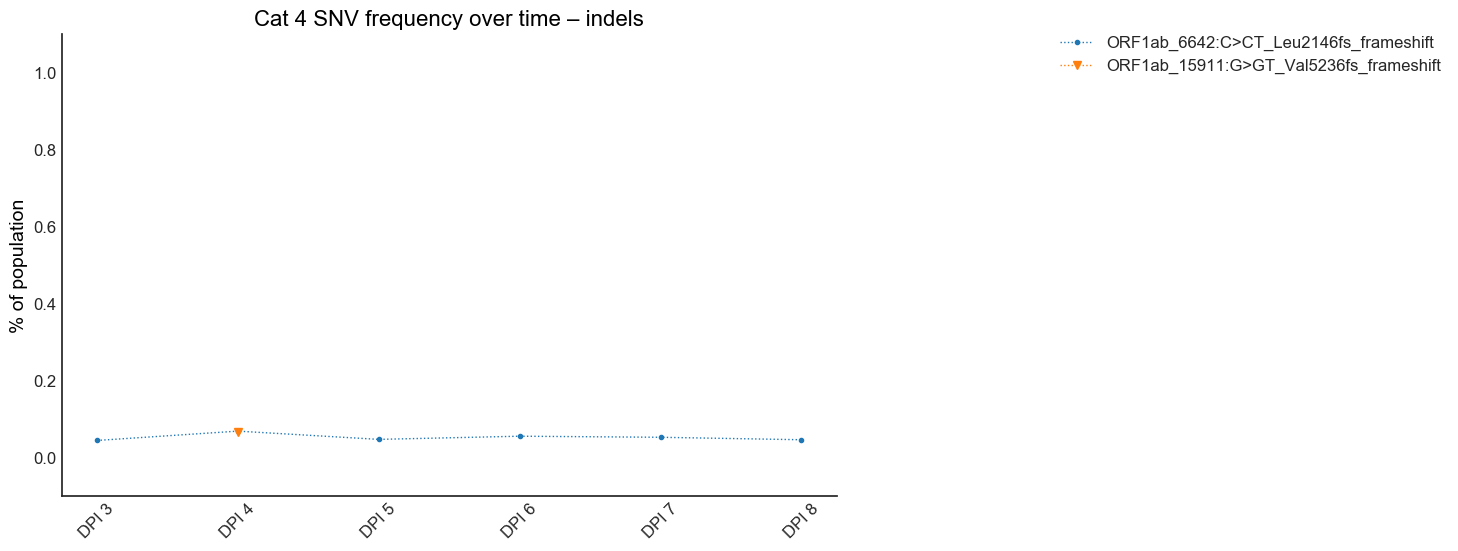

In [226]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat4_fs_t:
    num+=1
    plt.plot(cat4_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.8, 1.03), fontsize=12, ncol=1)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 4 SNV frequency over time – indels", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat4_indels_snps_over_time.svg", bbox_inches='tight', dpi=300)

In [227]:
# get all datafrmes uploaded

stock = pd.read_csv('../data_derived/cleaned/343_p2_Tokyo-cleaned.csv', sep='\t')
stock = stock[['SNP', 'POS', 'FREQ']]
stock = stock.rename(columns={'FREQ': '%'})

cat5_3 = pd.read_csv('../data_derived/cleaned/5_3-intersection.csv', sep='\t')
cat5_3 = cat5_3[['SNP', 'POS_x', '%']]
cat5_3 = cat5_3.rename(columns={'POS_x': 'POS'})

cat5_4 = pd.read_csv('../data_derived/cleaned/5_4-intersection.csv', sep='\t')
cat5_4 = cat5_4[['SNP', 'POS_x', '%']]
cat5_4 = cat5_4.rename(columns={'POS_x': 'POS'})

cat5_5 = pd.read_csv('../data_derived/cleaned/5_5-intersection.csv', sep='\t')
cat5_5 = cat5_5[['SNP', 'POS_x', '%']]
cat5_5 = cat5_5.rename(columns={'POS_x': 'POS'})

cat5_6 = pd.read_csv('../data_derived/cleaned/5_6-intersection.csv', sep='\t')
cat5_6 = cat5_6[['SNP', 'POS_x', '%']]
cat5_6 = cat5_6.rename(columns={'POS_x': 'POS'})

cat5_7 = pd.read_csv('../data_derived/cleaned/5_7-intersection.csv', sep='\t')
cat5_7 = cat5_7[['SNP', 'POS_x', '%']]
cat5_7 = cat5_7.rename(columns={'POS_x': 'POS'})

cat5_8 = pd.read_csv('../data_derived/cleaned/5_8-intersection.csv', sep='\t')
cat5_8 = cat5_8[['SNP', 'POS_x', '%']]
cat5_8 = cat5_8.rename(columns={'POS_x': 'POS'})

cat5_9 = pd.read_csv('../data_derived/cleaned/5_9-intersection.csv', sep='\t')
cat5_9 = cat5_9[['SNP', 'POS_x', '%']]
cat5_9 = cat5_9.rename(columns={'POS_x': 'POS'})

cat5_10 = pd.read_csv('../data_derived/cleaned/5_10-intersection.csv', sep='\t')
cat5_10 = cat5_10[['SNP', 'POS_x', '%']]
cat5_10 = cat5_10.rename(columns={'POS_x': 'POS'})


# start merging

cat5_stock = pd.merge(stock, cat5_3, on='SNP', how='outer')
cat5_stock['POS_x'] = cat5_stock['POS_x'].fillna(cat5_stock['POS_y'])
cat5_stock = cat5_stock.rename(columns={'POS_x': 'POS', '%_x':'stock', '%_y':'DPI 3'})
cat5_stock = cat5_stock[['SNP', 'POS', 'stock', 'DPI 3']]

cat5a = pd.merge(cat5_stock, cat5_4, on='SNP', how='outer')
cat5a['POS_x'] = cat5a['POS_x'].fillna(cat5a['POS_y'])
cat5a = cat5a.rename(columns={'POS_x': 'POS', '%':'DPI 4'})
cat5a = cat5a[['SNP', 'POS', 'stock', 'DPI 3', 'DPI 4']]

cat5b = pd.merge(cat5a, cat5_5, on='SNP', how='outer')
cat5b['POS_x'] = cat5b['POS_x'].fillna(cat5b['POS_y'])
cat5b = cat5b.rename(columns={'POS_x': 'POS', '%':'DPI 5'})
cat5b = cat5b[['SNP', 'POS', 'stock', 'DPI 3', 'DPI 4', 'DPI 5']]

cat5c = pd.merge(cat5b, cat5_6, on='SNP', how='outer')
cat5c['POS_x'] = cat5c['POS_x'].fillna(cat5c['POS_y'])
cat5c = cat5c.rename(columns={'POS_x': 'POS', '%':'DPI 6'})
cat5c = cat5c[['SNP', 'POS','stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6']]

cat5d = pd.merge(cat5c, cat5_7, on='SNP', how='outer')
cat5d['POS_x'] = cat5d['POS_x'].fillna(cat5d['POS_y'])
cat5d = cat5d.rename(columns={'POS_x': 'POS', '%':'DPI 7'})
cat5d = cat5d[['SNP', 'POS','stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7']]

cat5e = pd.merge(cat5d, cat5_8, on='SNP', how='outer')
cat5e['POS_x'] = cat5e['POS_x'].fillna(cat5e['POS_y'])
cat5e = cat5e.rename(columns={'POS_x': 'POS', '%':'DPI 8'})
cat5e = cat5e[['SNP', 'POS','stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat5f = pd.merge(cat5e, cat5_9, on='SNP', how='outer')
cat5f['POS_x'] = cat5f['POS_x'].fillna(cat5f['POS_y'])
cat5f = cat5f.rename(columns={'POS_x': 'POS', '%':'DPI 9'})
cat5f = cat5f[['SNP', 'POS','stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9']]

cat5g = pd.merge(cat5f, cat5_10, on='SNP', how='outer')
cat5g['POS_x'] = cat5g['POS_x'].fillna(cat5g['POS_y'])
cat5g = cat5g.rename(columns={'POS_x': 'POS', '%':'DPI 10'})
cat5 = cat5g[['SNP', 'POS','stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

# sort on POS column 

cat5 = cat5.sort_values('POS', ascending=True)
# cat5 = cat5.replace(np.nan, 0)

cat5.to_csv('../data_derived/cleaned/cat5_snps_over_time.csv', sep='\t')

In [228]:
# split into synonymous, missense, frameshift, intergenic 

syn1 = cat5.SNP.str.contains('synonymous')
syn2 = cat5.SNP.str.contains('intergenic-region')
cat5_syn1 = cat5[syn1]
cat5_syn2 = cat5[syn2]
cat5_syn = pd.concat([cat5_syn1, cat5_syn2], axis=0)

mis = cat5.SNP.str.contains('missense')
cat5_mis = cat5[mis]

fs = cat5.SNP.str.contains('frameshift')
cat5_fs = cat5[fs]

intergenic = cat5.SNP.str.contains('intergenic')
cat5_intergenic = cat5[intergenic]

# synonymous

cat5_syn = cat5_syn.set_index('SNP')

cat5_syn = cat5_syn[['stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat5_syn_t = cat5_syn.T

# cat5_syn_t

# missense

cat5_mis = cat5_mis.set_index('SNP')

cat5_mis = cat5_mis[['stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat5_mis_t = cat5_mis.T

# cat5_mis_t

# frameshift

cat5_fs = cat5_fs.set_index('SNP')

cat5_fs = cat5_fs[['stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat5_fs_t = cat5_fs.T

# cat5_fs_t


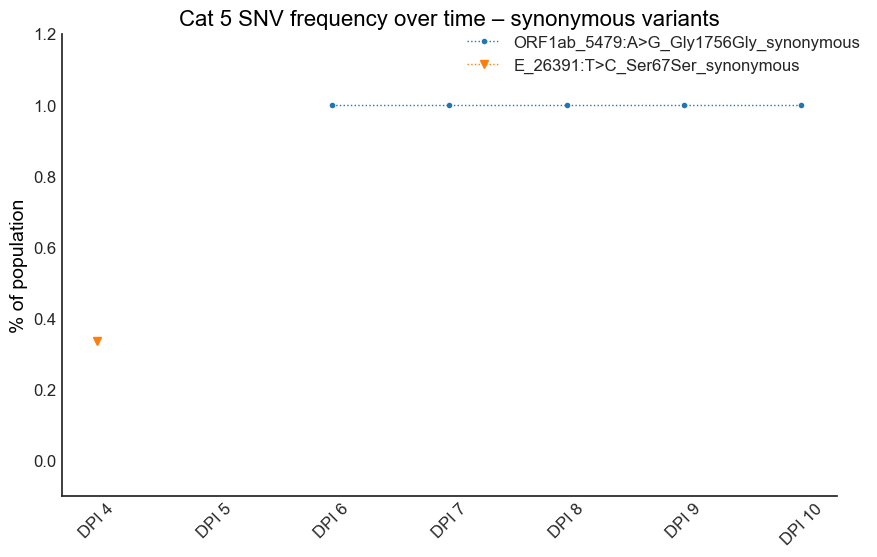

In [229]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat5_syn_t:
    num+=1
    plt.plot(cat5_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.2])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 5 SNV frequency over time – synonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat5_synonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)

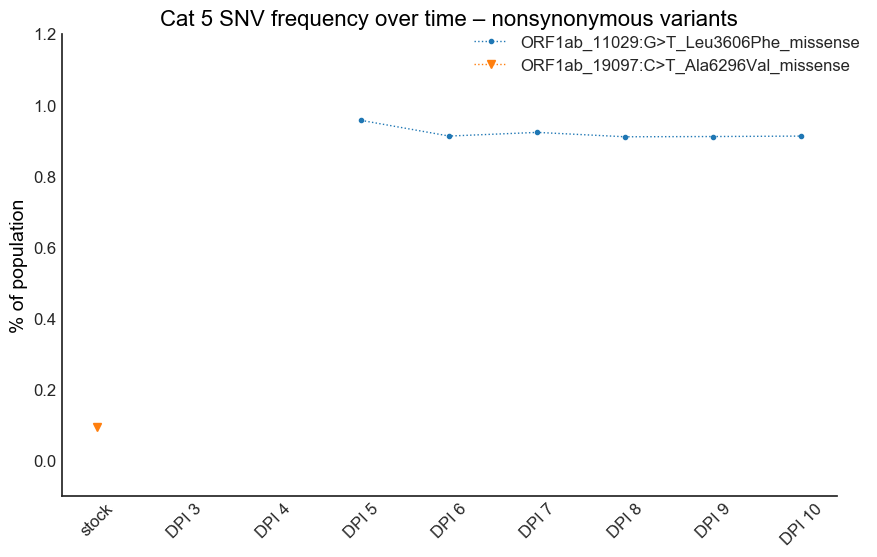

In [230]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat5_mis_t:
    num+=1
    plt.plot(cat5_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.2])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 5 SNV frequency over time – nonsynonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat5_nonsynonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)

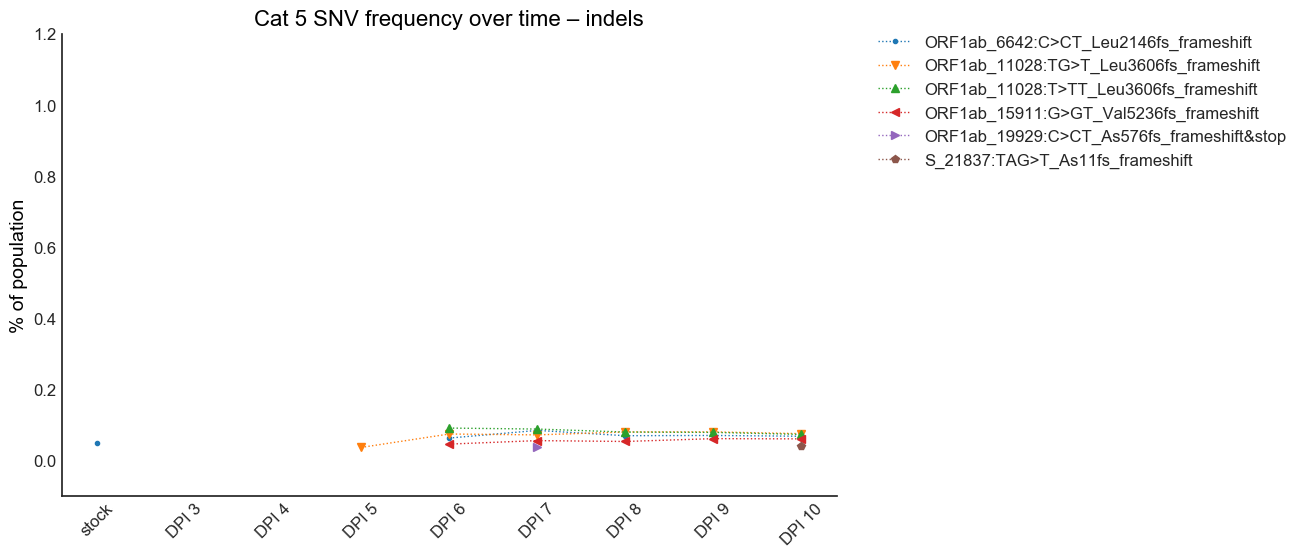

In [231]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat5_fs_t:
    num+=1
    plt.plot(cat5_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.6, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.2])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 5 SNV frequency over time – indels", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat5_indels_snps_over_time.svg", bbox_inches='tight', dpi=300)

In [274]:
# get all datafrmes uploaded

stock = pd.read_csv('../data_derived/cleaned/343_p2_Tokyo-cleaned.csv', sep='\t')
stock = stock[['SNP', 'POS', 'FREQ']]
stock = stock.rename(columns={'FREQ': '%'})

# cat6_3 = pd.read_csv('../data_derived/cleaned/6_3-cleaned.csv', sep='\t')
# cat6_3 = cat6_3[['SNP', 'POS', 'FREQ']]
# cat6_3 = cat6_3.rename(columns={'FREQ':'%'})

cat6_4 = pd.read_csv('../data_derived/cleaned/6_4-intersection.csv', sep='\t')
cat6_4 = cat6_4[['SNP', 'POS_x', '%']]
cat6_4 = cat6_4.rename(columns={'POS_x': 'POS'})

cat6_5 = pd.read_csv('../data_derived/cleaned/6_5-intersection.csv', sep='\t')
cat6_5 = cat6_5[['SNP', 'POS_x', '%']]
cat6_5 = cat6_5.rename(columns={'POS_x': 'POS'})

cat6_6 = pd.read_csv('../data_derived/cleaned/6_6-intersection.csv', sep='\t')
cat6_6 = cat6_6[['SNP', 'POS_x', '%']]
cat6_6 = cat6_6.rename(columns={'POS_x': 'POS'})

cat6_7 = pd.read_csv('../data_derived/cleaned/6_7-intersection.csv', sep='\t')
cat6_7 = cat6_7[['SNP', 'POS_x', '%']]
cat6_7 = cat6_7.rename(columns={'POS_x': 'POS'})

cat6_8 = pd.read_csv('../data_derived/cleaned/6_8-intersection.csv', sep='\t')
cat6_8 = cat6_8[['SNP', 'POS_x', '%']]
cat6_8 = cat6_8.rename(columns={'POS_x': 'POS'})

cat6_9 = pd.read_csv('../data_derived/cleaned/6_9-intersection.csv', sep='\t')
cat6_9 = cat6_9[['SNP', 'POS_x', '%']]
cat6_9 = cat6_9.rename(columns={'POS_x': 'POS'})

cat6_10 = pd.read_csv('../data_derived/cleaned/6_10-intersection.csv', sep='\t')
cat6_10 = cat6_10[['SNP', 'POS_x', '%']]
cat6_10 = cat6_10.rename(columns={'POS_x': 'POS'})


# start merging

# cat6_stock = pd.merge(stock, cat6_3, on='SNP', how='outer')
# cat6_stock['POS_x'] = cat6_stock['POS_x'].fillna(cat6_stock['POS_y'])
# cat6_stock = cat6_stock.rename(columns={'POS_x': 'POS', '%_x':'stock', '%_y':'DPI 3'})
# cat6_stock = cat6_stock[['SNP', 'POS', 'stock', 'DPI 3']]

cat6a = pd.merge(stock, cat6_4, on='SNP', how='outer')
cat6a['POS_x'] = cat6a['POS_x'].fillna(cat6a['POS_y'])
cat6a = cat6a.rename(columns={'POS_x': 'POS', '%_x':'stock', '%_y':'DPI 4'})
cat6a = cat6a[['SNP', 'POS', 'stock', 'DPI 4']]

cat6b = pd.merge(cat6a, cat6_5, on='SNP', how='outer')
cat6b['POS_x'] = cat6b['POS_x'].fillna(cat6b['POS_y'])
cat6b = cat6b.rename(columns={'POS_x': 'POS', '%':'DPI 5'})
cat6b = cat6b[['SNP', 'POS', 'stock', 'DPI 4', 'DPI 5']]

cat6c = pd.merge(cat6b, cat6_6, on='SNP', how='outer')
cat6c['POS_x'] = cat6c['POS_x'].fillna(cat6c['POS_y'])
cat6c = cat6c.rename(columns={'POS_x': 'POS', '%':'DPI 6'})
cat6c = cat6c[['SNP', 'POS','stock', 'DPI 4', 'DPI 5', 'DPI 6']]

cat6d = pd.merge(cat6c, cat6_7, on='SNP', how='outer')
cat6d['POS_x'] = cat6d['POS_x'].fillna(cat6d['POS_y'])
cat6d = cat6d.rename(columns={'POS_x': 'POS', '%':'DPI 7'})
cat6d = cat6d[['SNP', 'POS','stock', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7']]

cat6e = pd.merge(cat6d, cat6_8, on='SNP', how='outer')
cat6e['POS_x'] = cat6e['POS_x'].fillna(cat6e['POS_y'])
cat6e = cat6e.rename(columns={'POS_x': 'POS', '%':'DPI 8'})
cat6e = cat6e[['SNP', 'POS','stock', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]

cat6f = pd.merge(cat6e, cat6_9, on='SNP', how='outer')
cat6f['POS_x'] = cat6f['POS_x'].fillna(cat6f['POS_y'])
cat6f = cat6f.rename(columns={'POS_x': 'POS', '%':'DPI 9'})
cat6f = cat6f[['SNP', 'POS','stock', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9']]

cat6g = pd.merge(cat6f, cat6_10, on='SNP', how='outer')
cat6g['POS_x'] = cat6g['POS_x'].fillna(cat6g['POS_y'])
cat6g = cat6g.rename(columns={'POS_x': 'POS', '%':'DPI 10'})
cat6 = cat6g[['SNP', 'POS','stock', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

# sort on POS column 

cat6 = cat6.sort_values('POS', ascending=True)
# cat6 = cat6.replace(np.nan, 0)

cat6.to_csv('../data_derived/cleaned/cat6_snps_over_time.csv', sep='\t')

In [275]:
# split into synonymous, missense, frameshift, intergenic 

syn1 = cat6.SNP.str.contains('synonymous')
syn2 = cat6.SNP.str.contains('intergenic-region')
cat6_syn1 = cat6[syn1]
cat6_syn2 = cat6[syn2]
cat6_syn = pd.concat([cat6_syn1, cat6_syn2], axis=0)

mis = cat6.SNP.str.contains('missense')
cat6_mis = cat6[mis]

fs = cat6.SNP.str.contains('frameshift')
cat6_fs = cat6[fs]

intergenic = cat6.SNP.str.contains('intergenic')
cat6_intergenic = cat6[intergenic]

# synonymous

cat6_syn = cat6_syn.set_index('SNP')

cat6_syn = cat6_syn[['stock', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat6_syn_t = cat6_syn.T

# cat6_syn_t

# missense

cat6_mis = cat6_mis.set_index('SNP')

cat6_mis = cat6_mis[['stock', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat6_mis_t = cat6_mis.T

# cat6_mis_t

# frameshift

cat6_fs = cat6_fs.set_index('SNP')

cat6_fs = cat6_fs[['stock', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]

cat6_fs_t = cat6_fs.T

# cat6_fs_t

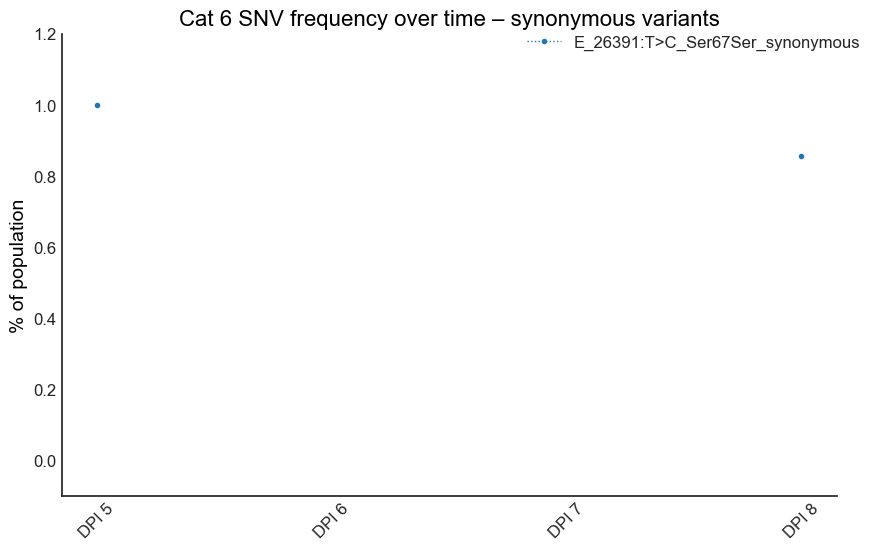

In [276]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat6_syn_t:
    num+=1
    plt.plot(cat6_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.2])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 6 SNV frequency over time – synonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat6_synonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)

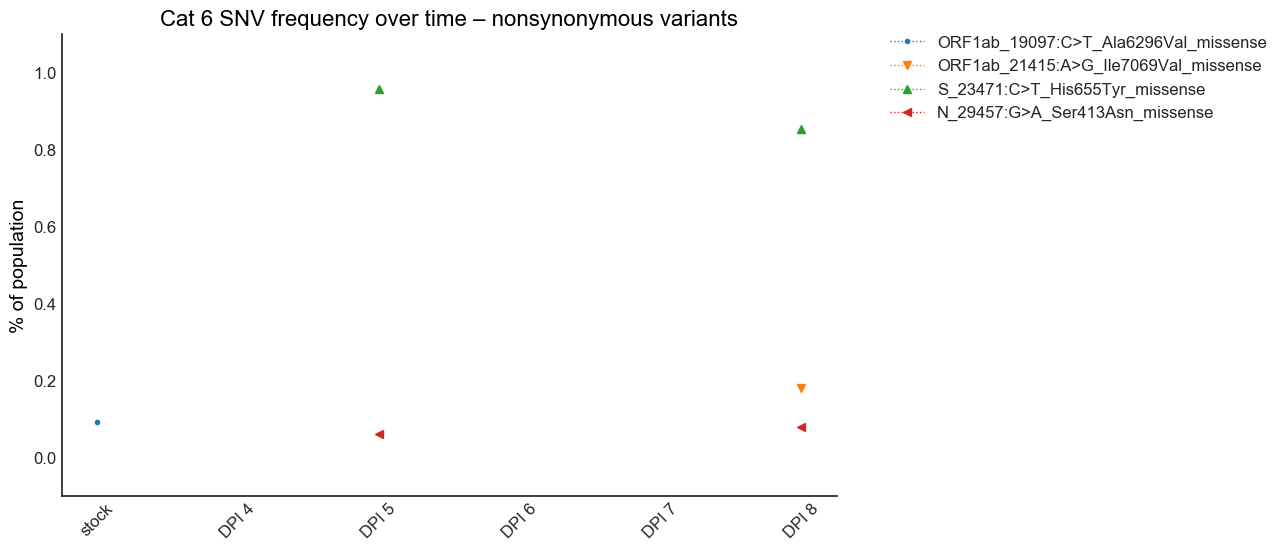

In [277]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat6_mis_t:
    num+=1
    plt.plot(cat6_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 6 SNV frequency over time – nonsynonymous variants", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat6_nonsynonymous_snps_over_time.svg", bbox_inches='tight', dpi=300)

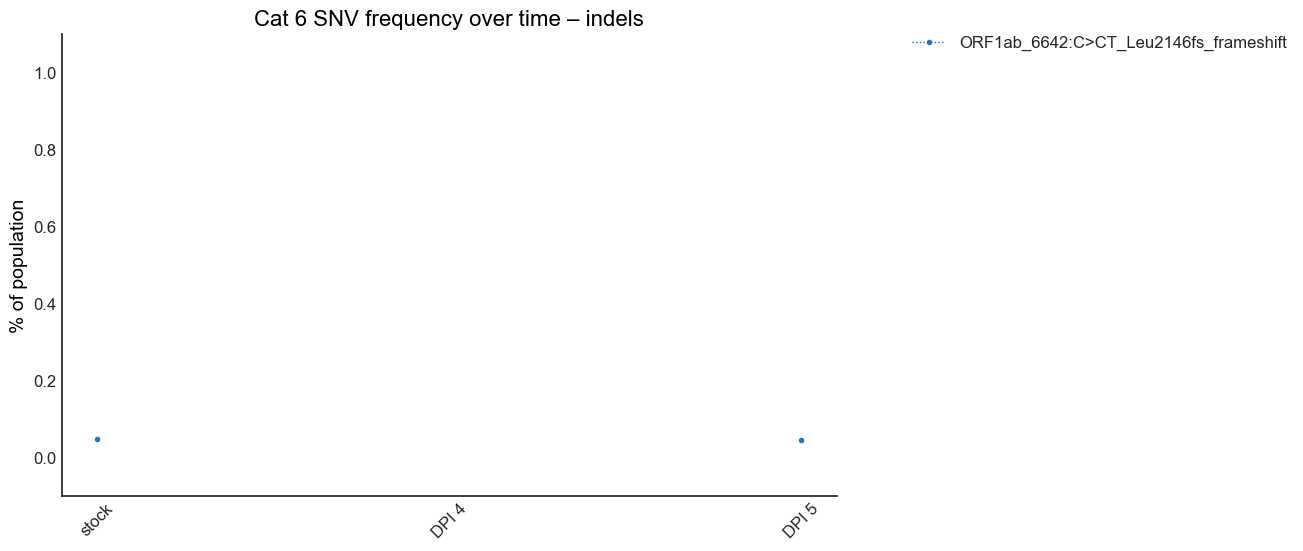

In [278]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat6_fs_t:
    num+=1
    plt.plot(cat6_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add legend
plt.legend(bbox_to_anchor=(1.6, 1.03), fontsize=12)

# adjust axes
axes = plt.gca()
axes.set_ylim([-0.1, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# add titles
plt.title("Cat 6 SNV frequency over time – indels", loc='center', fontsize=16, fontweight=1, color='black')
# plt.xlabel("\n days post infection", fontsize=14, fontweight=0, color='black')
plt.ylabel("% of population", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/cat6_indels_snps_over_time.svg", bbox_inches='tight', dpi=300)

## upload viral load CSV to plot on the right Y axis of these longitudinal SNP plots

In [279]:
VL = pd.read_csv('../viral_loads.csv', sep=',')

VL = VL[['Sample ID', 'Viral load (copies/ml)']]

# create one dataframe per cat
VL1 = VL[VL['Sample ID'].str.contains("1-")]
VL1['DPI'] = VL1['Sample ID'].replace({'1-1 RNA I stock':'stock', '1-1 RNA I':'DPI 1', '1-2 RNA I': 'DPI 2', '1-3 RNA I': 'DPI 3', '1-4 RNA I': 'DPI 4', '1-5 RNA I': 'DPI 5', '1-6 RNA I': 'DPI 6', '1-7 RNA I': 'DPI 7', '1-8 RNA I':'DPI 8'})
VL1 = VL1.rename(columns={'Viral load (copies/ml)':'viral_load'})
VL1 = VL1[['DPI', 'viral_load']]
VL1.set_index('DPI', inplace=True)

VL2 = VL[VL['Sample ID'].str.contains("2-")]
VL2['DPI'] = VL2['Sample ID'].replace({'2-1 RNA I stock':'stock', '2-1 RNA I':'DPI 1', '2-2 RNA I': 'DPI 2', '2-3 RNA I': 'DPI 3', '2-4 RNA I': 'DPI 4', '2-5 RNA I': 'DPI 5', '2-6 RNA I': 'DPI 6', '2-7 RNA I': 'DPI 7', '2-8 RNA I':'DPI 8'})
VL2 = VL2.rename(columns={'Viral load (copies/ml)':'viral_load'})
VL2 = VL2[['DPI', 'viral_load']]
VL2.set_index('DPI', inplace=True)

VL3 = VL[VL['Sample ID'].str.contains("3-")]
VL3['DPI'] = VL3['Sample ID'].replace({'3-1 RNA I stock':'stock', '3-1 RNA I':'DPI 1', '3-2 RNA I': 'DPI 2', '3-3 RNA I': 'DPI 3', '3-4 RNA I': 'DPI 4', '3-5 RNA I': 'DPI 5', '3-6 RNA I': 'DPI 6', '3-7 RNA I': 'DPI 7', '3-8 RNA I':'DPI 8'})
VL3 = VL3.rename(columns={'Viral load (copies/ml)':'viral_load'})
VL3 = VL3[['DPI', 'viral_load']]
VL3.set_index('DPI', inplace=True)

VL4 = VL[VL['Sample ID'].str.contains("4-")]
VL4['DPI'] = VL4['Sample ID'].replace({'4-3 RNA c stock':'stock', '4-3 RNA c': 'DPI 3', '4-4 RNA c': 'DPI 4', '4-5 RNA c': 'DPI 5', '4-6 RNA c': 'DPI 6', '4-7 RNA c':'DPI 7', '4-8 RNA c':'DPI 8', '4-9 RNA c':'DPI 9', '4-10 RNA c':'DPI 10'})
VL4 = VL4.rename(columns={'Viral load (copies/ml)':'viral_load'})
VL4 = VL4[['DPI', 'viral_load']]
VL4.set_index('DPI', inplace=True)

VL5 = VL[VL['Sample ID'].str.contains("5-")]
VL5['DPI'] = VL5['Sample ID'].replace({'5-3 RNA c stock':'stock','5-3 RNA c': 'DPI 3', '5-4 RNA c': 'DPI 4', '5-5 RNA c': 'DPI 5', '5-6 RNA c': 'DPI 6', '5-7 RNA c': 'DPI 7', '5-8 RNA c':'DPI 8', '5-9 RNA c':'DPI 9', '5-10 RNA c':'DPI 10'})
VL5 = VL5.rename(columns={'Viral load (copies/ml)':'viral_load'})
VL5 = VL5[['DPI', 'viral_load']]
VL5.set_index('DPI', inplace=True)

VL6 = VL[VL['Sample ID'].str.contains("6-")]
VL6['DPI'] = VL6['Sample ID'].replace({'6-3 RNA c stock':'stock','6-3 RNA c': 'DPI 3', '6-4 RNA c': 'DPI 4', '6-5 RNA c': 'DPI 5', '6-6 RNA c': 'DPI 6', '6-7 RNA c': 'DPI 7', '6-8 RNA c':'DPI 8', '6-9 RNA c':'DPI 9', '6-10 RNA c':'DPI 10'})
VL6 = VL6.rename(columns={'Viral load (copies/ml)':'viral_load'})
VL6 = VL6[['DPI', 'viral_load']]
VL6.set_index('DPI', inplace=True)

# VL1

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


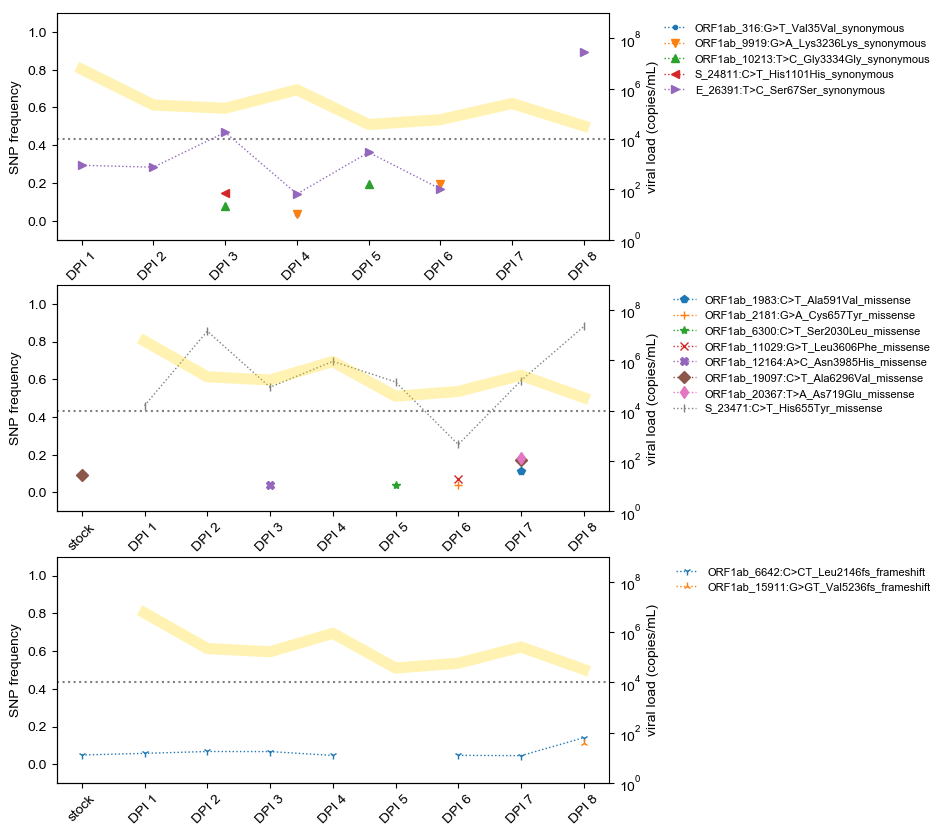

In [280]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn
ax2 = fig.add_subplot(gs[1,0:9]) # nonsyn
ax3 = fig.add_subplot(gs[2,0:9]) # indel

# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)  
    
# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat1_syn_t:
    num+=1
    ax1.plot(cat1_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax4 = ax1.twinx() 
ax4.plot(VL1['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')
    
# add legend
ax1.legend(bbox_to_anchor=(1.6 ,1), fontsize=8, frameon=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax1.set_ylabel('SNP frequency')
ax4.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax4.axhline(y=10000, color='grey', linestyle='dotted')

# plot the nonsynonymous lines 
num=0
for column in cat1_mis_t:
    num+=1
    ax2.plot(cat1_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax5 = ax2.twinx() 
ax5.plot(VL1['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 

# add legend
ax2.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)

# add title and x axis text
# ax2.title.set_text('nonsynonymous variants')
ax2.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax2.set_ylim([-0.1, 1.1])
ax5.set_yscale('log')
ax5.set_ylim([1,1000000000])

ax2.set_ylabel('SNP frequency')
ax5.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax5.axhline(y=10000, color='grey', linestyle='dotted')

# plot the indel lines 
num=0
for column in cat1_fs_t:
    num+=1
    ax3.plot(cat1_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax6 = ax3.twinx() 
ax6.plot(VL1['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 
    
# add legend
ax3.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)


# add title and x axis text
# ax3.title.set_text('indels')
ax3.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax3.set_ylim([-0.1, 1.1])
ax6.set_yscale('log')
ax6.set_ylim([1,1000000000])

ax3.set_ylabel('SNP frequency')
ax6.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax6.axhline(y=10000, color='grey', linestyle='dotted')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax5.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax6.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat1_all_snps_over_time.svg", bbox_inches='tight', dpi=300)

#

In [281]:
#rename column headers for variant names that are too long

cat2_syn_t = cat2_syn_t.rename(columns={'ORF10-CHR_END_29701:GAGTGTAC>G__intergenic-region': 'ORF10-END_29701:del_intergenic'})

cat2_fs_t = cat2_fs_t.rename(columns={'S_23506:TGGTGCAGGTATATGCGCTAGTTA>T_Gly667fs_frameshift':'S_23506:T...>T_Gly667fs_frameshift'})

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


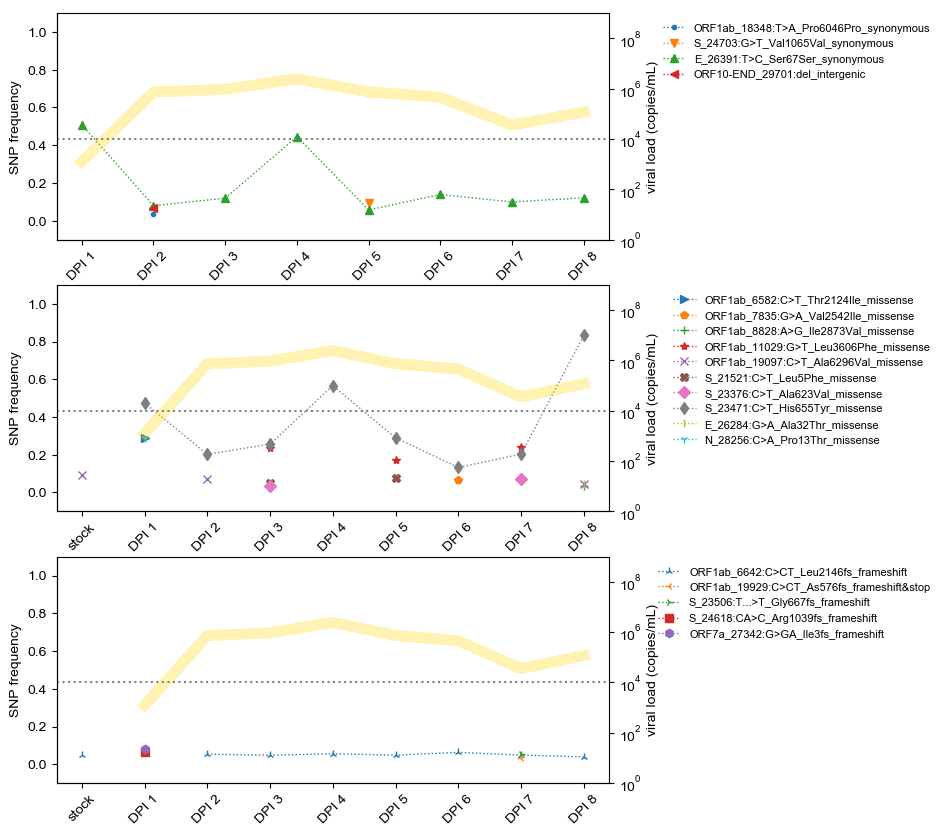

In [282]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn
ax2 = fig.add_subplot(gs[1,0:9]) # nonsyn
ax3 = fig.add_subplot(gs[2,0:9]) # indel

# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)  
    
# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat2_syn_t:
    num+=1
    ax1.plot(cat2_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax4 = ax1.twinx() 
ax4.plot(VL2['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')
    
# add legend
ax1.legend(bbox_to_anchor=(1.6 ,1), fontsize=8, frameon=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax1.set_ylabel('SNP frequency')
ax4.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax4.axhline(y=10000, color='grey', linestyle='dotted')

# plot the nonsynonymous lines 
num=0
for column in cat2_mis_t:
    num+=1
    ax2.plot(cat2_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax5 = ax2.twinx() 
ax5.plot(VL2['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 

# add legend
ax2.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)

# add title and x axis text
# ax2.title.set_text('nonsynonymous variants')
ax2.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax2.set_ylim([-0.1, 1.1])
ax5.set_yscale('log')
ax5.set_ylim([1,1000000000])

ax2.set_ylabel('SNP frequency')
ax5.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax5.axhline(y=10000, color='grey', linestyle='dotted')

# plot the indel lines 
num=0
for column in cat2_fs_t:
    num+=1
    ax3.plot(cat2_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax6 = ax3.twinx() 
ax6.plot(VL2['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 
    
# add legend
ax3.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)


# add title and x axis text
# ax3.title.set_text('indels')
ax3.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax3.set_ylim([-0.1, 1.1])
ax6.set_yscale('log')
ax6.set_ylim([1,1000000000])

ax3.set_ylabel('SNP frequency')
ax6.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax6.axhline(y=10000, color='grey', linestyle='dotted')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax5.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax6.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat2_all_snps_over_time.svg", bbox_inches='tight', dpi=300)

#

In [283]:
#rename column headers for variant names that are too long
cat3_fs_t = cat3_fs_t.rename(columns={'S_23503:CATTGGTGCAGGTATATGCGCTAGTT>C_Gly667fs_frameshift':'S_23503:C..>C_Gly667fs_frameshift'})


#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


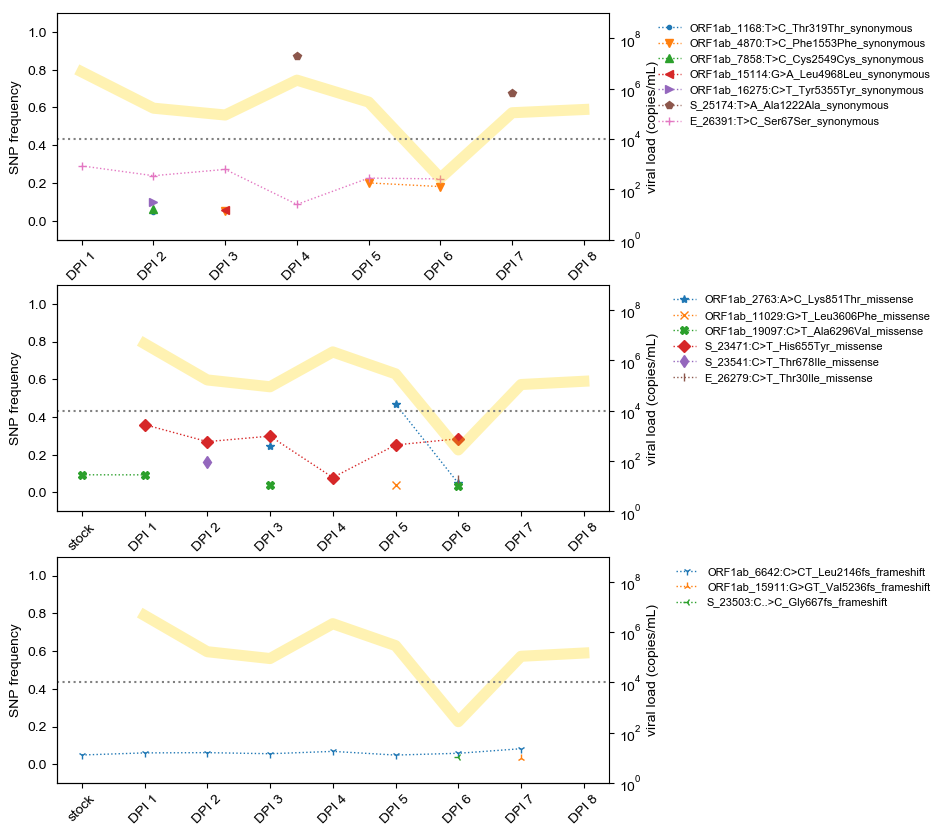

In [284]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn
ax2 = fig.add_subplot(gs[1,0:9]) # nonsyn
ax3 = fig.add_subplot(gs[2,0:9]) # indel

# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)  
    
# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat3_syn_t:
    num+=1
    ax1.plot(cat3_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax4 = ax1.twinx() 
ax4.plot(VL3['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')
    
# add legend
ax1.legend(bbox_to_anchor=(1.6 ,1), fontsize=8, frameon=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax1.set_ylabel('SNP frequency')
ax4.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax4.axhline(y=10000, color='grey', linestyle='dotted')

# plot the nonsynonymous lines 
num=0
for column in cat3_mis_t:
    num+=1
    ax2.plot(cat3_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax5 = ax2.twinx() 
ax5.plot(VL3['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 

# add legend
ax2.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)

# add title and x axis text
# ax2.title.set_text('nonsynonymous variants')
ax2.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax2.set_ylim([-0.1, 1.1])
ax5.set_yscale('log')
ax5.set_ylim([1,1000000000])

ax2.set_ylabel('SNP frequency')
ax5.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax5.axhline(y=10000, color='grey', linestyle='dotted')

# plot the indel lines 
num=0
for column in cat3_fs_t:
    num+=1
    ax3.plot(cat3_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax6 = ax3.twinx() 
ax6.plot(VL3['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 
    
# add legend
ax3.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)


# add title and x axis text
# ax3.title.set_text('indels')
ax3.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax3.set_ylim([-0.1, 1.1])
ax6.set_yscale('log')
ax6.set_ylim([1,1000000000])

ax3.set_ylabel('SNP frequency')
ax6.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax6.axhline(y=10000, color='grey', linestyle='dotted')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax5.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax6.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat3_all_snps_over_time.svg", bbox_inches='tight', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


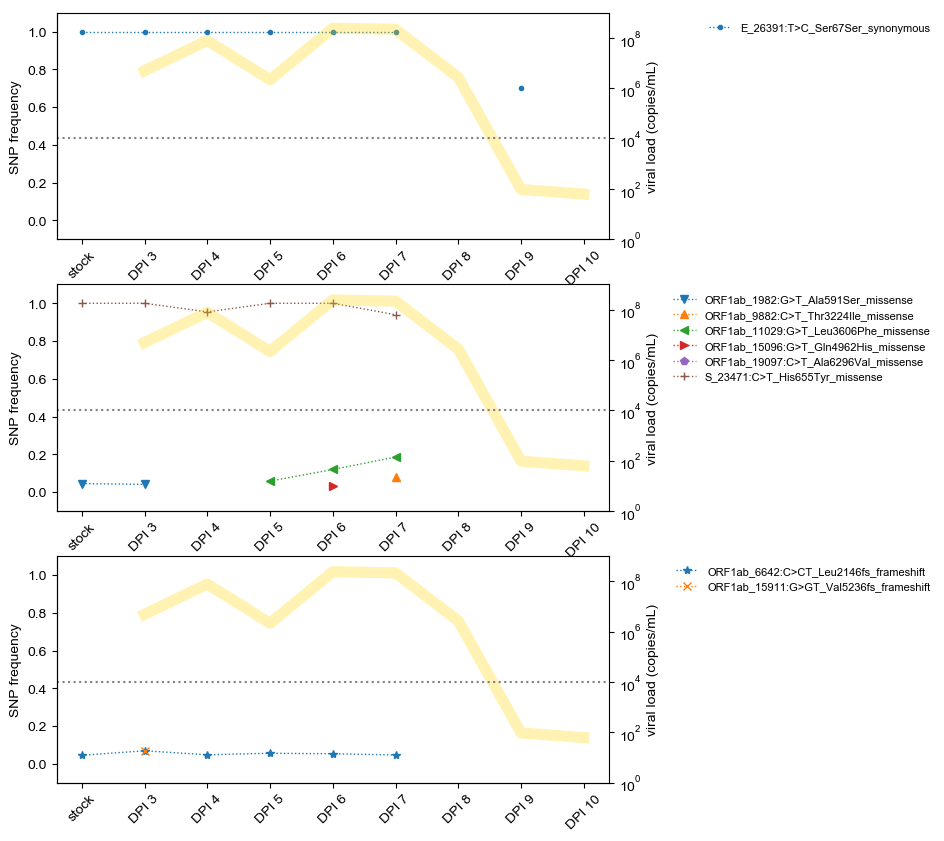

In [285]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn
ax2 = fig.add_subplot(gs[1,0:9]) # nonsyn
ax3 = fig.add_subplot(gs[2,0:9]) # indel

# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)  
    
# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat4_syn_t:
    num+=1
    ax1.plot(cat4_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax4 = ax1.twinx() 
ax4.plot(VL4['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')
    
# add legend
ax1.legend(bbox_to_anchor=(1.6 ,1), fontsize=8, frameon=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax1.set_ylabel('SNP frequency')
ax4.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax4.axhline(y=10000, color='grey', linestyle='dotted')

# plot the nonsynonymous lines 
num=0
for column in cat4_mis_t:
    num+=1
    ax2.plot(cat4_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax5 = ax2.twinx() 
ax5.plot(VL4['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 

# add legend
ax2.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)

# add title and x axis text
# ax2.title.set_text('nonsynonymous variants')
ax2.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax2.set_ylim([-0.1, 1.1])
ax5.set_yscale('log')
ax5.set_ylim([1,1000000000])

ax2.set_ylabel('SNP frequency')
ax5.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax5.axhline(y=10000, color='grey', linestyle='dotted')

# plot the indel lines 
num=0
for column in cat4_fs_t:
    num+=1
    ax3.plot(cat4_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax6 = ax3.twinx() 
ax6.plot(VL4['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 
    
# add legend
ax3.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)


# add title and x axis text
# ax3.title.set_text('indels')
ax3.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax3.set_ylim([-0.1, 1.1])
ax6.set_yscale('log')
ax6.set_ylim([1,1000000000])

ax3.set_ylabel('SNP frequency')
ax6.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax6.axhline(y=10000, color='grey', linestyle='dotted')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax5.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax6.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat4_all_snps_over_time.svg", bbox_inches='tight', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


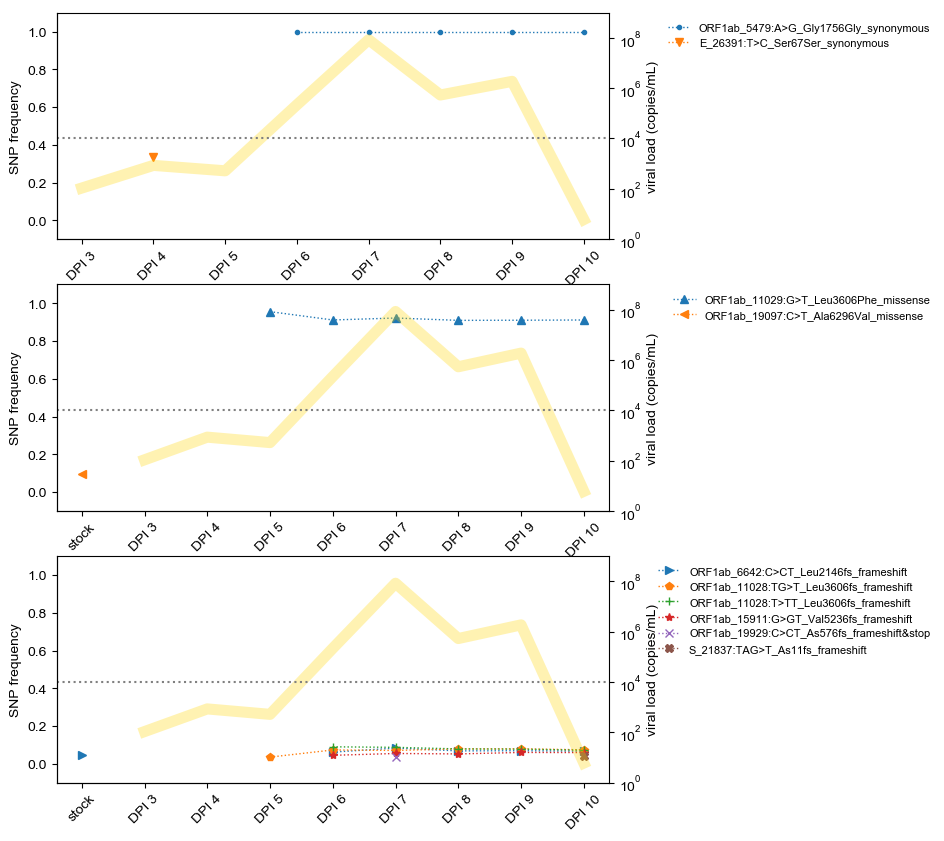

In [286]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn
ax2 = fig.add_subplot(gs[1,0:9]) # nonsyn
ax3 = fig.add_subplot(gs[2,0:9]) # indel

# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)  
    
# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat5_syn_t:
    num+=1
    ax1.plot(cat5_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax4 = ax1.twinx() 
ax4.plot(VL5['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')
    
# add legend
ax1.legend(bbox_to_anchor=(1.6 ,1), fontsize=8, frameon=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax1.set_ylabel('SNP frequency')
ax4.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax4.axhline(y=10000, color='grey', linestyle='dotted')

# plot the nonsynonymous lines 
num=0
for column in cat5_mis_t:
    num+=1
    ax2.plot(cat5_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax5 = ax2.twinx() 
ax5.plot(VL5['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 

# add legend
ax2.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)

# add title and x axis text
# ax2.title.set_text('nonsynonymous variants')
ax2.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax2.set_ylim([-0.1, 1.1])
ax5.set_yscale('log')
ax5.set_ylim([1,1000000000])

ax2.set_ylabel('SNP frequency')
ax5.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax5.axhline(y=10000, color='grey', linestyle='dotted')

# plot the indel lines 
num=0
for column in cat5_fs_t:
    num+=1
    ax3.plot(cat5_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax6 = ax3.twinx() 
ax6.plot(VL5['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 
    
# add legend
ax3.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)


# add title and x axis text
# ax3.title.set_text('indels')
ax3.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax3.set_ylim([-0.1, 1.1])
ax6.set_yscale('log')
ax6.set_ylim([1,1000000000])

ax3.set_ylabel('SNP frequency')
ax6.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax6.axhline(y=10000, color='grey', linestyle='dotted')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax5.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax6.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat5_all_snps_over_time.svg", bbox_inches='tight', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


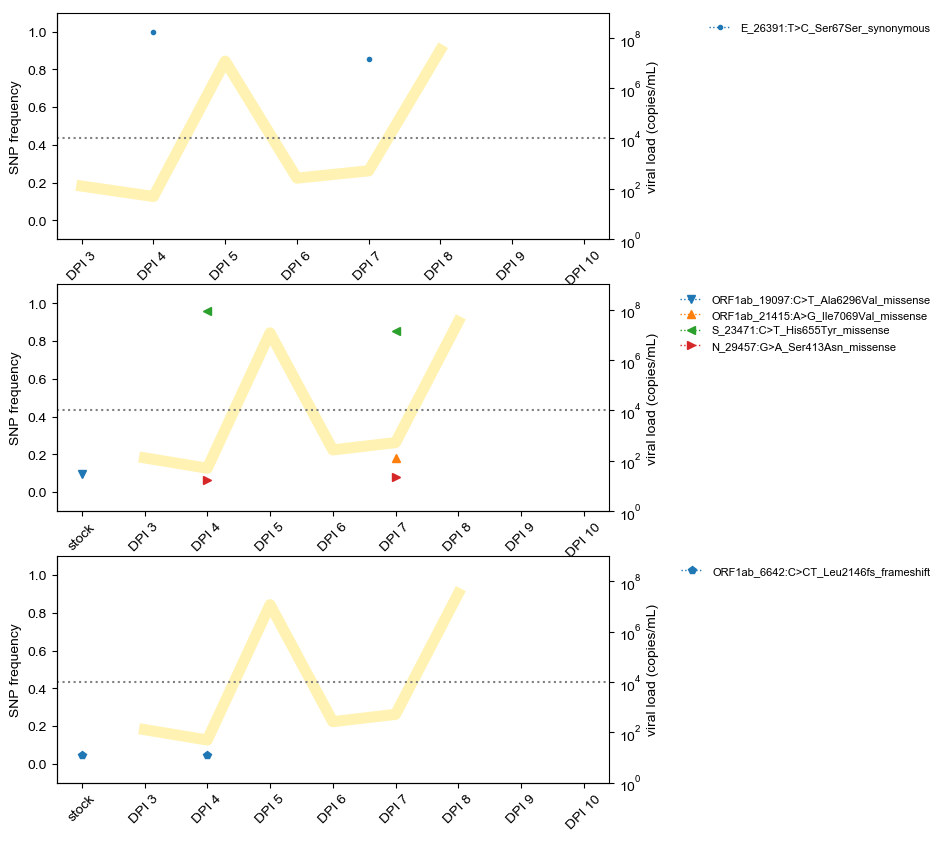

In [287]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn
ax2 = fig.add_subplot(gs[1,0:9]) # nonsyn
ax3 = fig.add_subplot(gs[2,0:9]) # indel

# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)  
    
# create a marker palette
marker = itertools.cycle(('.', 'v', '^', '<', '>', 'p', '+', '*', 'x', 'X', 'D', 'd', '|', '1', '2', '3', '4', 's', 'h', 'H')) 

# plot the synonymous lines 
num=0
for column in cat6_syn_t:
    num+=1
    ax1.plot(cat6_syn_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax4 = ax1.twinx() 
ax4.plot(VL6['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')
    
# add legend
ax1.legend(bbox_to_anchor=(1.6 ,1), fontsize=8, frameon=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax1.set_ylabel('SNP frequency')
ax4.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax4.axhline(y=10000, color='grey', linestyle='dotted')

# plot the nonsynonymous lines 
num=0
for column in cat6_mis_t:
    num+=1
    ax2.plot(cat6_mis_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax5 = ax2.twinx() 
ax5.plot(VL6['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 

# add legend
ax2.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)

# add title and x axis text
# ax2.title.set_text('nonsynonymous variants')
ax2.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax2.set_ylim([-0.1, 1.1])
ax5.set_yscale('log')
ax5.set_ylim([1,1000000000])

ax2.set_ylabel('SNP frequency')
ax5.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax5.axhline(y=10000, color='grey', linestyle='dotted')

# plot the indel lines 
num=0
for column in cat6_fs_t:
    num+=1
    ax3.plot(cat6_fs_t[column], marker=next(marker), linewidth=1, alpha=1, label=column, linestyle='dotted')

# add the viral load data to the right y axis on these plots
ax6 = ax3.twinx() 
ax6.plot(VL6['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold') 
    
# add legend
ax3.legend(bbox_to_anchor=(1.6,1), fontsize=8, frameon=False)


# add title and x axis text
# ax3.title.set_text('indels')
ax3.set(xlabel="", ylabel="SNP frequency")

# adjust axes
ax3.set_ylim([-0.1, 1.1])
ax6.set_yscale('log')
ax6.set_ylim([1,1000000000])

ax3.set_ylabel('SNP frequency')
ax6.set_ylabel('viral load (copies/mL)')

# plot horizontal line at 10^4 copies/ml --> 10 copies/ul x10ul in RT =~ 100 input copies
# below this level we need to be very skeptical of SNP calls 
ax6.axhline(y=10000, color='grey', linestyle='dotted')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax5.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax6.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat6_all_snps_over_time.svg", bbox_inches='tight', dpi=300)

#

In [288]:
# merge pair 1 (day 2 in index and day 3 in contact)

pair1 = pd.merge(cat1_2, cat4_3, on='SNP', how='outer')
pair1['POS_x'] = pair1['POS_x'].fillna(pair1['POS_y'])
pair1 = pair1.rename(columns={'POS_x': 'POS', '%_x':'DPI 2 index', '%_y':'DPI 3 contact'})
pair1 = pair1[['SNP', 'POS', 'DPI 2 index', 'DPI 3 contact']]

pair1 = pair1.sort_values('POS', ascending=True)
# pair1 = pair1.replace(np.nan, 0)

pair1.to_csv('../data_derived/cleaned/pair1_snps_over_time.csv', sep='\t')

pair1T = pair1.set_index('SNP')
pair1T = pair1T[['DPI 2 index', 'DPI 3 contact']]
pair1T = pair1T.T

In [289]:
# merge pair 2 (day 5 in index and day 6 in contact)

pair2 = pd.merge(cat2_5, cat5_6, on='SNP', how='outer')
pair2['POS_x'] = pair2['POS_x'].fillna(pair2['POS_y'])
pair2 = pair2.rename(columns={'POS_x': 'POS', '%_x':'DPI 5 index', '%_y':'DPI 6 contact'})
pair2 = pair2[['SNP', 'POS', 'DPI 5 index', 'DPI 6 contact']]

pair2 = pair2.sort_values('POS', ascending=True)
# pair2 = pair2.replace(np.nan, 0)

pair2.to_csv('../data_derived/cleaned/pair2_snps_over_time.csv', sep='\t')

pair2T = pair2.set_index('SNP')
pair2T = pair2T[['DPI 5 index', 'DPI 6 contact']]
pair2T = pair2T.T

In [290]:
# merge pair 3 (day 4 in index and day 5 in contact)

pair3 = pd.merge(cat3_4, cat6_5, on='SNP', how='outer')
pair3['POS_x'] = pair3['POS_x'].fillna(pair3['POS_y'])
pair3 = pair3.rename(columns={'POS_x': 'POS', '%_x':'DPI 4 index', '%_y':'DPI 5 contact'})
pair3 = pair3[['SNP', 'POS', 'DPI 4 index', 'DPI 5 contact']]

pair3 = pair3.sort_values('POS', ascending=True)
# pair3 = pair3.replace(np.nan, 0)

pair3.to_csv('../data_derived/cleaned/pair3_snps_over_time.csv', sep='\t')

pair3T = pair3.set_index('SNP')
pair3T = pair3T[['DPI 4 index', 'DPI 5 contact']]
pair3T = pair3T.T

# reformatting some of these plots to make sure variants are formatted identically across plots 

In [291]:
cat1

,SNP,POS,stock,DPI 1,DPI 2,DPI 3,DPI 4,DPI 5,DPI 6,DPI 7,DPI 8
7,ORF1ab_316:G>T_Val35Val_synonymous,316.0,NaN,NaN,NaN,NaN,0.0382,NaN,NaN,NaN,NaN
13,ORF1ab_1983:C>T_Ala591Val_missense,1983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11360,NaN
11,ORF1ab_2181:G>A_Cys657Tyr_missense,2181.0,NaN,NaN,NaN,NaN,NaN,NaN,0.03855,NaN,NaN
10,ORF1ab_6300:C>T_Ser2030Leu_missense,6300.0,NaN,NaN,NaN,NaN,NaN,0.04235,NaN,NaN,NaN
0,ORF1ab_6642:C>CT_Leu2146fs_frameshift,6642.0,0.0491,0.05770,0.06765,0.06720,0.0468,NaN,0.04725,0.04555,0.14085
8,ORF1ab_9919:G>A_Lys3236Lys_synonymous,9919.0,NaN,NaN,NaN,NaN,0.0356,NaN,0.19605,NaN,NaN
4,ORF1ab_10213:T>C_Gly3334Gly_synonymous,10213.0,NaN,NaN,NaN,0.07545,NaN,0.19200,NaN,NaN,NaN
12,ORF1ab_11029:G>T_Leu3606Phe_missense,11029.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07345,NaN,NaN
5,ORF1ab_12164:A>C_Asn3985His_missense,12164.0,NaN,NaN,NaN,0.03885,NaN,NaN,NaN,NaN,NaN
15,ORF1ab_15911:G>GT_Val5236fs_frameshift,15911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11260


/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


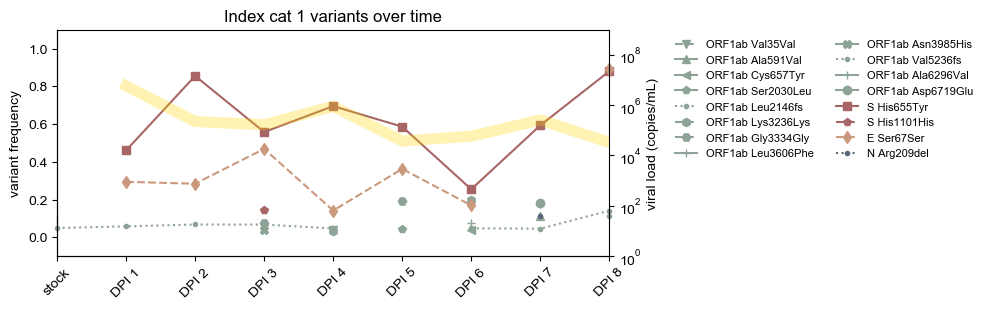

In [292]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
cat1_orf1ab_Val35Val = cat1.loc[[7]]
cat1_orf1ab_Val35Val['SNP'] = cat1_orf1ab_Val35Val['SNP'].replace({'ORF1ab_316:G>T_Val35Val_synonymous':'ORF1ab Val35Val'})
cat1_orf1ab_Val35Val = cat1_orf1ab_Val35Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Val35Val_T = cat1_orf1ab_Val35Val.T

cat1_orf1ab_Ala591Val = cat1.loc[[13]]
cat1_orf1ab_Ala591Val['SNP'] = cat1_orf1ab_Ala591Val['SNP'].replace({'ORF1ab_1983:C>T_Ala591Val_missense':'ORF1ab Ala591Val'})
cat1_orf1ab_Ala591Val = cat1_orf1ab_Ala591Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Ala591Val_T = cat1_orf1ab_Ala591Val.T

cat1_orf1ab_Cys657Tyr = cat1.loc[[11]]
cat1_orf1ab_Cys657Tyr['SNP'] = cat1_orf1ab_Cys657Tyr['SNP'].replace({'ORF1ab_2181:G>A_Cys657Tyr_missense':'ORF1ab Cys657Tyr'})
cat1_orf1ab_Cys657Tyr = cat1_orf1ab_Cys657Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Cys657Tyr_T = cat1_orf1ab_Cys657Tyr.T

cat1_orf1ab_Ser2030Leu = cat1.loc[[10]]
cat1_orf1ab_Ser2030Leu['SNP'] = cat1_orf1ab_Ser2030Leu['SNP'].replace({'ORF1ab_6300:C>T_Ser2030Leu_missense':'ORF1ab Ser2030Leu'})
cat1_orf1ab_Ser2030Leu = cat1_orf1ab_Ser2030Leu[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Ser2030Leu_T = cat1_orf1ab_Ser2030Leu.T

cat1_orf1ab_Leu2146fs = cat1.loc[[0]]
cat1_orf1ab_Leu2146fs['SNP'] = cat1_orf1ab_Leu2146fs['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146 ins'})
cat1_orf1ab_Leu2146fs = cat1_orf1ab_Leu2146fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Leu2146fs_T = cat1_orf1ab_Leu2146fs.T

cat1_orf1ab_Lys3236Lys = cat1.loc[[8]]
cat1_orf1ab_Lys3236Lys['SNP'] = cat1_orf1ab_Lys3236Lys['SNP'].replace({'ORF1ab_9919:G>A_Lys3236Lys_synonymous':'ORF1ab Lys3236Lys'})
cat1_orf1ab_Lys3236Lys = cat1_orf1ab_Lys3236Lys[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Lys3236Lys_T = cat1_orf1ab_Lys3236Lys.T

cat1_orf1ab_Gly3334Gly = cat1.loc[[4]]
cat1_orf1ab_Gly3334Gly['SNP'] = cat1_orf1ab_Gly3334Gly['SNP'].replace({'ORF1ab_10213:T>C_Gly3334Gly_synonymous':'ORF1ab Gly3334Gly'})
cat1_orf1ab_Gly3334Gly = cat1_orf1ab_Gly3334Gly[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Gly3334Gly_T = cat1_orf1ab_Gly3334Gly.T

cat1_orf1ab_Leu3606Phe = cat1.loc[[12]]
cat1_orf1ab_Leu3606Phe['SNP'] = cat1_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat1_orf1ab_Leu3606Phe = cat1_orf1ab_Leu3606Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Leu3606Phe_T = cat1_orf1ab_Leu3606Phe.T

cat1_orf1ab_Asn3985His = cat1.loc[[5]]
cat1_orf1ab_Asn3985His['SNP'] = cat1_orf1ab_Asn3985His['SNP'].replace({'ORF1ab_12164:A>C_Asn3985His_missense':'ORF1ab Asn3985His'})
cat1_orf1ab_Asn3985His = cat1_orf1ab_Asn3985His[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Asn3985His_T = cat1_orf1ab_Asn3985His.T

cat1_orf1ab_Val5236fs = cat1.loc[[15]]
cat1_orf1ab_Val5236fs['SNP'] = cat1_orf1ab_Val5236fs['SNP'].replace({'ORF1ab_15911:G>GT_Val5236fs_frameshift':'ORF1ab Val5236 ins'})
cat1_orf1ab_Val5236fs = cat1_orf1ab_Val5236fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Val5236fs_T = cat1_orf1ab_Val5236fs.T

cat1_orf1ab_Ala6296Val = cat1.loc[[1]]
cat1_orf1ab_Ala6296Val['SNP'] = cat1_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat1_orf1ab_Ala6296Val = cat1_orf1ab_Ala6296Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Ala6296Val_T = cat1_orf1ab_Ala6296Val.T

cat1_orf1ab_Asp6719Glu = cat1.loc[[14]]
cat1_orf1ab_Asp6719Glu['SNP'] = cat1_orf1ab_Asp6719Glu['SNP'].replace({'ORF1ab_20367:T>A_As719Glu_missense':'ORF1ab Asp6719Glu'})
cat1_orf1ab_Asp6719Glu = cat1_orf1ab_Asp6719Glu[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Asp6719Glu_T = cat1_orf1ab_Asp6719Glu.T

cat1_S_His655Tyr = cat1.loc[[2]]
cat1_S_His655Tyr['SNP'] = cat1_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat1_S_His655Tyr = cat1_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_S_His655Tyr_T = cat1_S_His655Tyr.T

cat1_S_His1101His = cat1.loc[[6]]
cat1_S_His1101His['SNP'] = cat1_S_His1101His['SNP'].replace({'S_24811:C>T_His1101His_synonymous':'S His1101His'})
cat1_S_His1101His = cat1_S_His1101His[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_S_His1101His_T = cat1_S_His1101His.T

cat1_E_Ser67Ser = cat1.loc[[3]]
cat1_E_Ser67Ser['SNP'] = cat1_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat1_E_Ser67Ser = cat1_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_E_Ser67Ser_T = cat1_E_Ser67Ser.T

cat1_N_Arg209del = cat1.loc[[13]]
cat1_N_Arg209del['SNP'] = cat1_N_Arg209del['SNP'].replace({'N_28843:TAGA>T_Arg209del_disruptive-inframe-deletion':'N Arg209 del'})
cat1_N_Arg209del = cat1_N_Arg209del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_N_Arg209del_T = cat1_N_Arg209del.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNP lines
cat1_orf1ab_Val35Val_T.plot(marker='v', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Ala591Val_T.plot(marker='^', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Cys657Tyr_T.plot(marker='<', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Ser2030Leu_T.plot(marker='p', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Leu2146fs_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Lys3236Lys_T.plot(marker='h', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Gly3334Gly_T.plot(marker='H', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Asn3985His_T.plot(marker='X', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Val5236fs_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Asp6719Glu_T.plot(marker='o', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_S_His1101His_T.plot(marker='p', color='#A86566', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_N_Arg209del_T.plot(marker='.', color='#59667C', linestyle='dotted', ax=ax1, legend=False, clip_on=False)  

# add title and x axis text
ax1.title.set_text('Index cat 1 variants over time')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

#add viral load line
ax4 = ax1.twinx() 
ax4.plot(VL1['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')

ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax4.set_ylabel('viral load (copies/mL)')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.1,1), fontsize=8, frameon=False, ncol=2, labels=['ORF1ab Val35Val', 'ORF1ab Ala591Val','ORF1ab Cys657Tyr', 'ORF1ab Ser2030Leu', 'ORF1ab Leu2146fs', 'ORF1ab Lys3236Lys', 'ORF1ab Gly3334Gly', 'ORF1ab Leu3606Phe', 'ORF1ab Asn3985His', 'ORF1ab Val5236fs', 'ORF1ab Ala6296Val', 'ORF1ab Asp6719Glu', 'S His655Tyr','S His1101His','E Ser67Ser', 'N Arg209del'])
# add a little 
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()
#save figure 
plt.savefig("../figures/cat1_all_snps_over_time_formatted.svg", bbox_inches='tight', dpi=300)

#



In [293]:
cat2

,SNP,POS,stock,DPI 1,DPI 2,DPI 3,DPI 4,DPI 5,DPI 6,DPI 7,DPI 8
2,ORF1ab_6582:C>T_Thr2124Ile_missense,6582.0,NaN,0.28875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,ORF1ab_6642:C>CT_Leu2146fs_frameshift,6642.0,0.0491,NaN,0.05320,0.04795,0.05560,0.04805,0.06305,0.04850,0.03945
14,ORF1ab_7835:G>A_Val2542Ile_missense,7835.0,NaN,NaN,NaN,NaN,NaN,NaN,0.06690,NaN,NaN
17,ORF1ab_8828:A>G_Ile2873Val_missense,8828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03505
10,ORF1ab_11029:G>T_Leu3606Phe_missense,11029.0,NaN,NaN,NaN,0.23465,NaN,0.17165,NaN,0.24230,NaN
8,ORF1ab_18348:T>A_Pro6046Pro_synonymous,18348.0,NaN,NaN,0.03805,NaN,NaN,NaN,NaN,NaN,NaN
1,ORF1ab_19097:C>T_Ala6296Val_missense,19097.0,0.0938,NaN,0.06925,NaN,NaN,NaN,NaN,NaN,0.04465
15,ORF1ab_19929:C>CT_As576fs_frameshift&stop,19929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03235,NaN
11,S_21521:C>T_Leu5Phe_missense,21521.0,NaN,NaN,NaN,0.04885,NaN,0.07590,NaN,NaN,NaN
12,S_23376:C>T_Ala623Val_missense,23376.0,NaN,NaN,NaN,0.03580,NaN,NaN,NaN,0.07075,NaN


/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


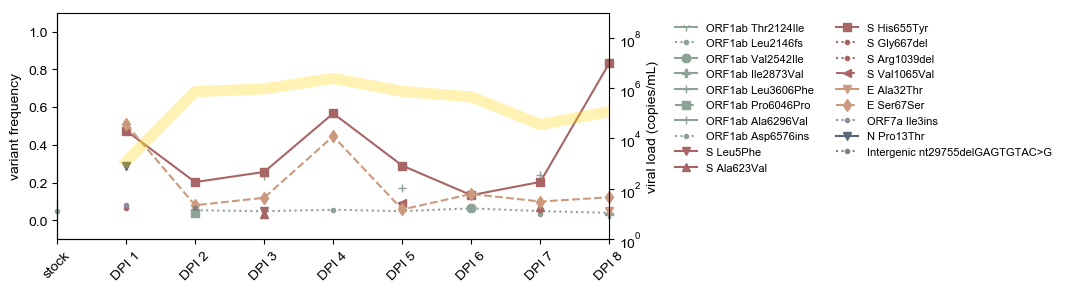

In [294]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
cat2_orf1ab_Thr2124Ile = cat2.loc[[2]]
cat2_orf1ab_Thr2124Ile['SNP'] = cat2_orf1ab_Thr2124Ile['SNP'].replace({'ORF1ab_6582:C>T_Thr2124Ile_missense':'ORF1ab Thr2124Ile'})
cat2_orf1ab_Thr2124Ile = cat2_orf1ab_Thr2124Ile[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Thr2124Ile_T = cat2_orf1ab_Thr2124Ile.T

cat2_orf1ab_Leu2146fs = cat2.loc[[0]]
cat2_orf1ab_Leu2146fs['SNP'] = cat2_orf1ab_Leu2146fs['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146 del'})
cat2_orf1ab_Leu2146fs = cat2_orf1ab_Leu2146fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Leu2146fs_T = cat2_orf1ab_Leu2146fs.T

cat2_orf1ab_Val2542Ile = cat2.loc[[14]]
cat2_orf1ab_Val2542Ile['SNP'] = cat2_orf1ab_Val2542Ile['SNP'].replace({'ORF1ab_7835:G>A_Val2542Ile_missense':'ORF1ab Val2542Ile'})
cat2_orf1ab_Val2542Ile = cat2_orf1ab_Val2542Ile[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Val2542Ile_T = cat2_orf1ab_Val2542Ile.T

cat2_orf1ab_Ile2873Val = cat2.loc[[17]]
cat2_orf1ab_Ile2873Val['SNP'] = cat2_orf1ab_Ile2873Val['SNP'].replace({'ORF1ab_8828:A>G_Ile2873Val_missense':'ORF1ab Ile2873Val'})
cat2_orf1ab_Ile2873Val = cat2_orf1ab_Ile2873Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Ile2873Val_T = cat2_orf1ab_Ile2873Val.T

cat2_orf1ab_Leu3606Phe = cat2.loc[[10]]
cat2_orf1ab_Leu3606Phe['SNP'] = cat2_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat2_orf1ab_Leu3606Phe = cat2_orf1ab_Leu3606Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Leu3606Phe_T = cat2_orf1ab_Leu3606Phe.T

cat2_orf1ab_Pro6046Pro = cat2.loc[[8]]
cat2_orf1ab_Pro6046Pro['SNP'] = cat2_orf1ab_Pro6046Pro['SNP'].replace({'ORF1ab_18348:T>A_Pro6046Pro_synonymous':'ORF1ab Pro6046Pro'})
cat2_orf1ab_Pro6046Pro = cat2_orf1ab_Pro6046Pro[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Pro6046Pro_T = cat2_orf1ab_Pro6046Pro.T

cat2_orf1ab_Ala6296Val = cat2.loc[[1]]
cat2_orf1ab_Ala6296Val['SNP'] = cat2_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat2_orf1ab_Ala6296Val = cat2_orf1ab_Ala6296Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Ala6296Val_T = cat2_orf1ab_Ala6296Val.T

cat2_orf1ab_Asp6576ins = cat2.loc[[15]]
cat2_orf1ab_Asp6576ins['SNP'] = cat2_orf1ab_Asp6576ins['SNP'].replace({'ORF1ab_19929:C>CT_As576fs_frameshift&stop':'ORF1ab Alp6576ins'})
cat2_orf1ab_Asp6576ins = cat2_orf1ab_Asp6576ins[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Asp6576ins_T = cat2_orf1ab_Asp6576ins.T

cat2_S_Leu5Phe = cat2.loc[[11]]
cat2_S_Leu5Phe['SNP'] = cat2_S_Leu5Phe['SNP'].replace({'S_21521:C>T_Leu5Phe_missense':'ORF1ab Leu5Phe'})
cat2_S_Leu5Phe = cat2_S_Leu5Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Leu5Phe_T = cat2_S_Leu5Phe.T

cat2_S_Ala623Val = cat2.loc[[12]]
cat2_S_Ala623Val['SNP'] = cat2_S_Ala623Val['SNP'].replace({'S_23376:C>T_Ala623Val_missense':'S Ala623Val'})
cat2_S_Ala623Val = cat2_S_Ala623Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Ala623Val_T = cat2_S_Ala623Val.T

cat2_S_His655Tyr = cat2.loc[[3]]
cat2_S_His655Tyr['SNP'] = cat2_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat2_S_His655Tyr = cat2_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_His655Tyr_T = cat2_S_His655Tyr.T

cat2_S_Gly667del = cat2.loc[[16]]
cat2_S_Gly667del['SNP'] = cat2_S_Gly667del['SNP'].replace({'S_23506:TGGTGCAGGTATATGCGCTAGTTA>T_Gly667fs_frameshift':'S Gly667del'})
cat2_S_Gly667del = cat2_S_Gly667del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Gly667del_T = cat2_S_Gly667del.T

cat2_S_Arg1039del = cat2.loc[[4]]
cat2_S_Arg1039del['SNP'] = cat2_S_Arg1039del['SNP'].replace({'S_24618:CA>C_Arg1039fs_frameshift':'S Arg1039del'})
cat2_S_Arg1039del = cat2_S_Arg1039del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Arg1039del_T = cat2_S_Arg1039del.T

cat2_S_Val1065Val = cat2.loc[[13]]
cat2_S_Val1065Val['SNP'] = cat2_S_Val1065Val['SNP'].replace({'S_24703:G>T_Val1065Val_synonymous':'S Val1065Val'})
cat2_S_Val1065Val = cat2_S_Val1065Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Val1065Val_T = cat2_S_Val1065Val.T

cat2_E_Ala32Thr = cat2.loc[[18]]
cat2_E_Ala32Thr['SNP'] = cat2_E_Ala32Thr['SNP'].replace({'E_26284:G>A_Ala32Thr_missense':'E Ala32Thr'})
cat2_E_Ala32Thr = cat2_E_Ala32Thr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_E_Ala32Thr_T = cat2_E_Ala32Thr.T

cat2_E_Ser67Ser = cat2.loc[[5]]
cat2_E_Ser67Ser['SNP'] = cat2_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat2_E_Ser67Ser = cat2_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_E_Ser67Ser_T = cat2_E_Ser67Ser.T

cat2_orf7a_Ile3ins = cat2.loc[[6]]
cat2_orf7a_Ile3ins['SNP'] = cat2_orf7a_Ile3ins['SNP'].replace({'ORF7a_27342:G>GA_Ile3fs_frameshift':'ORF7a Ile3ins'})
cat2_orf7a_Ile3ins = cat2_orf7a_Ile3ins[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf7a_Ile3ins_T = cat2_orf7a_Ile3ins.T

cat2_N_Pro13Thr = cat2.loc[[7]]
cat2_N_Pro13Thr['SNP'] = cat2_N_Pro13Thr['SNP'].replace({'N_28256:C>A_Pro13Thr_missense':'N Pro13Thr'})
cat2_N_Pro13Thr = cat2_N_Pro13Thr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_N_Pro13Thr_T = cat2_N_Pro13Thr.T

cat2_inter_nt29755del = cat2.loc[[9]]
cat2_inter_nt29755del['SNP'] = cat2_inter_nt29755del['SNP'].replace({'ORF10-CHR_END_29701:GAGTGTAC>G__intergenic-region':'Intergenic nt29755del'})
cat2_inter_nt29755del = cat2_inter_nt29755del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_inter_nt29755del_T = cat2_inter_nt29755del.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNP lines
cat2_orf1ab_Thr2124Ile_T.plot(marker='1', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Leu2146fs_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Val2542Ile_T.plot(marker='8', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Ile2873Val_T.plot(marker='P', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Pro6046Pro_T.plot(marker='s', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Asp6576ins_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_S_Leu5Phe_T.plot(marker='v', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_S_Ala623Val_T.plot(marker='^', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_S_Gly667del_T.plot(marker='.', color='#A86566', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_S_Arg1039del_T.plot(marker='.', color='#A86566', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_S_Val1065Val_T.plot(marker='<', color='#A86566', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat2_E_Ala32Thr_T.plot(marker='v', color='#CB997D', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat2_orf7a_Ile3ins_T.plot(marker='.', color='#938AA0', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_N_Pro13Thr_T.plot(marker='v', color='#59667C', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_inter_nt29755del_T.plot(marker='.', color='grey', linestyle='dotted', ax=ax1, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

#add viral load line
ax4 = ax1.twinx() 
ax4.plot(VL2['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')

ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax4.set_ylabel('viral load (copies/mL)')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.1,1), fontsize=8, frameon=False, ncol=2, labels=('ORF1ab Thr2124Ile', 'ORF1ab Leu2146fs', 'ORF1ab Val2542Ile', 'ORF1ab Ile2873Val', 'ORF1ab Leu3606Phe', 'ORF1ab Pro6046Pro', 'ORF1ab Ala6296Val', 'ORF1ab Asp6576ins', 'S Leu5Phe', 'S Ala623Val', 'S His655Tyr','S Gly667del', 'S Arg1039del', 'S Val1065Val', 'E Ala32Thr', 'E Ser67Ser', 'ORF7a Ile3ins', 'N Pro13Thr', 'Intergenic nt29755delGAGTGTAC>G'
))

# add a little 
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat2_all_snps_over_time_formatted.svg", bbox_inches='tight', dpi=300)
plt.show()
#

In [295]:
cat3

,SNP,POS,stock,DPI 1,DPI 2,DPI 3,DPI 4,DPI 5,DPI 6,DPI 7,DPI 8
4,ORF1ab_1168:T>C_Thr319Thr_synonymous,1168.0,NaN,NaN,0.04715,NaN,NaN,NaN,NaN,NaN,NaN
8,ORF1ab_2763:A>C_Lys851Thr_missense,2763.0,NaN,NaN,NaN,0.24835,NaN,0.46905,NaN,0.04880,NaN
9,ORF1ab_4870:T>C_Phe1553Phe_synonymous,4870.0,NaN,NaN,NaN,0.04940,NaN,0.20045,NaN,0.18090,NaN
0,ORF1ab_6642:C>CT_Leu2146fs_frameshift,6642.0,0.0491,0.06020,0.06155,0.05580,0.06820,0.04875,NaN,0.05815,0.08235
5,ORF1ab_7858:T>C_Cys2549Cys_synonymous,7858.0,NaN,NaN,0.05975,NaN,NaN,NaN,NaN,NaN,NaN
12,ORF1ab_11029:G>T_Leu3606Phe_missense,11029.0,NaN,NaN,NaN,NaN,NaN,0.03735,NaN,NaN,NaN
10,ORF1ab_15114:G>A_Leu4968Leu_synonymous,15114.0,NaN,NaN,NaN,0.05745,NaN,NaN,NaN,NaN,NaN
15,ORF1ab_15911:G>GT_Val5236fs_frameshift,15911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03325
6,ORF1ab_16275:C>T_Tyr5355Tyr_synonymous,16275.0,NaN,NaN,0.09845,NaN,NaN,NaN,NaN,NaN,NaN
1,ORF1ab_19097:C>T_Ala6296Val_missense,19097.0,0.0938,0.09350,NaN,0.03840,NaN,NaN,NaN,0.03625,NaN


In [296]:
cat3['DPI 6'] = 0 # adding in an empty day six so the plots don't get shifted 
cat3 = cat3[['SNP', 'POS', 'stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3 = cat3.replace(0,np.nan)

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


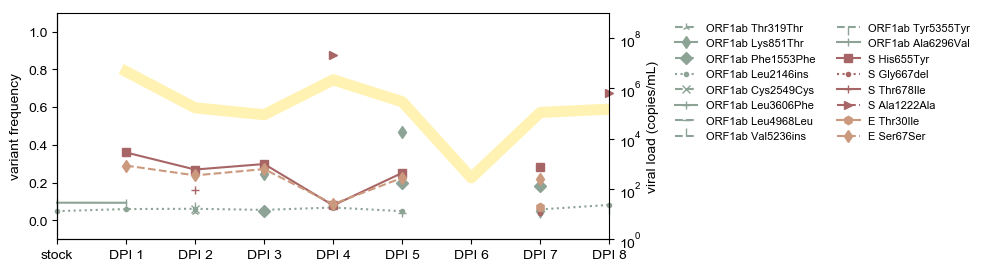

In [297]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
cat3_orf1ab_Thr319Thr = cat3.loc[[4]]
cat3_orf1ab_Thr319Thr['SNP'] = cat3_orf1ab_Thr319Thr['SNP'].replace({'ORF1ab_1168:T>C_Thr319Thr_synonymous':'ORF1ab Thr319Thr'})
cat3_orf1ab_Thr319Thr = cat3_orf1ab_Thr319Thr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Thr319Thr_T = cat3_orf1ab_Thr319Thr.T

cat3_orf1ab_Lys851Thr = cat3.loc[[8]]
cat3_orf1ab_Lys851Thr['SNP'] = cat3_orf1ab_Lys851Thr['SNP'].replace({'ORF1ab_2763:A>C_Lys851Thr_missense':'ORF1ab Lys851Thr'})
cat3_orf1ab_Lys851Thr = cat3_orf1ab_Lys851Thr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Lys851Thr_T = cat3_orf1ab_Lys851Thr.T

cat3_orf1ab_Phe1553Phe = cat3.loc[[9]]
cat3_orf1ab_Phe1553Phe['SNP'] = cat3_orf1ab_Phe1553Phe['SNP'].replace({'ORF1ab_4870:T>C_Phe1553Phe_synonymous':'ORF1ab Phe1553Phe'})
cat3_orf1ab_Phe1553Phe = cat3_orf1ab_Phe1553Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Phe1553Phe_T = cat3_orf1ab_Phe1553Phe.T

cat3_orf1ab_Leu2146ins = cat3.loc[[0]]
cat3_orf1ab_Leu2146ins['SNP'] = cat3_orf1ab_Leu2146ins['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146ins'})
cat3_orf1ab_Leu2146ins = cat3_orf1ab_Leu2146ins[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Leu2146ins_T = cat3_orf1ab_Leu2146ins.T

cat3_orf1ab_Cys2549Cys = cat3.loc[[5]]
cat3_orf1ab_Cys2549Cys['SNP'] = cat3_orf1ab_Cys2549Cys['SNP'].replace({'ORF1ab_7858:T>C_Cys2549Cys_synonymous':'ORF1ab Cys2549Cys'})
cat3_orf1ab_Cys2549Cys = cat3_orf1ab_Cys2549Cys[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5','DPI 6',  'DPI 7', 'DPI 8']]
cat3_orf1ab_Cys2549Cys_T = cat3_orf1ab_Cys2549Cys.T

cat3_orf1ab_Leu3606Phe = cat3.loc[[12]]
cat3_orf1ab_Leu3606Phe['SNP'] = cat3_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat3_orf1ab_Leu3606Phe = cat3_orf1ab_Leu3606Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Leu3606Phe_T = cat3_orf1ab_Leu3606Phe.T

cat3_orf1ab_Leu4968Leu = cat3.loc[[10]]
cat3_orf1ab_Leu4968Leu['SNP'] = cat3_orf1ab_Leu4968Leu['SNP'].replace({'ORF1ab_15114:G>A_Leu4968Leu_synonymous':'ORF1ab Leu4968Leu'})
cat3_orf1ab_Leu4968Leu = cat3_orf1ab_Leu4968Leu[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Leu4968Leu_T = cat3_orf1ab_Leu4968Leu.T

cat3_orf1ab_Val5236ins = cat3.loc[[15]]
cat3_orf1ab_Val5236ins['SNP'] = cat3_orf1ab_Val5236ins['SNP'].replace({'ORF1ab_15911:G>GT_Val5236fs_frameshift':'ORF1ab Val5236ins'})
cat3_orf1ab_Val5236ins = cat3_orf1ab_Val5236ins[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Val5236ins_T = cat3_orf1ab_Val5236ins.T

cat3_orf1ab_Tyr5355Tyr = cat3.loc[[6]]
cat3_orf1ab_Tyr5355Tyr['SNP'] = cat3_orf1ab_Tyr5355Tyr['SNP'].replace({'ORF1ab_16275:C>T_Tyr5355Tyr_synonymous':'ORF1ab Tyr5355Tyr'})
cat3_orf1ab_Tyr5355Tyr = cat3_orf1ab_Tyr5355Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Tyr5355Tyr_T = cat3_orf1ab_Tyr5355Tyr.T

cat3_orf1ab_Ala6296Val = cat3.loc[[1]]
cat3_orf1ab_Ala6296Val['SNP'] = cat3_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat3_orf1ab_Ala6296Val = cat3_orf1ab_Ala6296Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Ala6296Val_T = cat3_orf1ab_Ala6296Val.T

cat3_S_His655Tyr = cat3.loc[[2]]
cat3_S_His655Tyr['SNP'] = cat3_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat3_S_His655Tyr = cat3_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_His655Tyr_T = cat3_S_His655Tyr.T

cat3_S_Gly667del = cat3.loc[[13]]
cat3_S_Gly667del['SNP'] = cat3_S_Gly667del['SNP'].replace({'S_23503:CATTGGTGCAGGTATATGCGCTAGTT>C_Gly667fs_frameshift':'S Gly667del'})
cat3_S_Gly667del = cat3_S_Gly667del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_Gly667del_T = cat3_S_Gly667del.T

cat3_S_Thr678Ile = cat3.loc[[7]]
cat3_S_Thr678Ile['SNP'] = cat3_S_Thr678Ile['SNP'].replace({'S_23541:C>T_Thr678Ile_missense':'S Thr678Ile'})
cat3_S_Thr678Ile = cat3_S_Thr678Ile[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5','DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_Thr678Ile_T = cat3_S_Thr678Ile.T

cat3_S_Ala1222Ala = cat3.loc[[11]]
cat3_S_Ala1222Ala['SNP'] = cat3_S_Ala1222Ala['SNP'].replace({'S_25174:T>A_Ala1222Ala_synonymous':'S Ala1222Ala'})
cat3_S_Ala1222Ala = cat3_S_Ala1222Ala[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_Ala1222Ala_T = cat3_S_Ala1222Ala.T

cat3_E_Thr30Ile = cat3.loc[[14]]
cat3_E_Thr30Ile['SNP'] = cat3_E_Thr30Ile['SNP'].replace({'E_26279:C>T_Thr30Ile_missense':'E Thr30Ile'})
cat3_E_Thr30Ile = cat3_E_Thr30Ile[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_E_Thr30Ile_T = cat3_E_Thr30Ile.T

cat3_E_Ser67Ser = cat3.loc[[3]]
cat3_E_Ser67Ser['SNP'] = cat3_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat3_E_Ser67Ser = cat3_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_E_Ser67Ser_T = cat3_E_Ser67Ser.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNP lines
cat3_orf1ab_Thr319Thr_T.plot(marker='2', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Lys851Thr_T.plot(marker='d', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Phe1553Phe_T.plot(marker='D', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Leu2146ins_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Cys2549Cys_T.plot(marker='x', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Leu4968Leu_T.plot(marker='_', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Val5236ins_T.plot(marker=2, color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Tyr5355Tyr_T.plot(marker=3, color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_S_Gly667del_T.plot(marker='.', color='#A86566', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat3_S_Thr678Ile_T.plot(marker='+', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_S_Ala1222Ala_T.plot(marker='>', color='#A86566', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_E_Thr30Ile_T.plot(marker='h', color='#CB997D', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

#add viral load line
ax4 = ax1.twinx() 
ax4.plot(VL3['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')

ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax4.set_ylabel('viral load (copies/mL)')

# rotate x tick labels 45 degrees
# plt.setp(ax1.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.1,1), fontsize=8, frameon=False, ncol=2, labels=('ORF1ab Thr319Thr', 'ORF1ab Lys851Thr', 'ORF1ab Phe1553Phe', 'ORF1ab Leu2146ins', 'ORF1ab Cys2549Cys', 'ORF1ab Leu3606Phe', 'ORF1ab Leu4968Leu', 'ORF1ab Val5236ins', 'ORF1ab Tyr5355Tyr', 'ORF1ab Ala6296Val', 'S His655Tyr', 'S Gly667del', 'S Thr678Ile', 'S Ala1222Ala', 'E Thr30Ile', 'E Ser67Ser'))

# add a little 
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat3_all_snps_over_time_formatted.svg", bbox_inches='tight', dpi=300)
plt.show()
#

In [298]:
cat4

,SNP,POS,DPI 3,DPI 4,DPI 5,DPI 6,DPI 7,DPI 8,DPI 9,DPI 10
2,ORF1ab_1982:G>T_Ala591Ser_missense,1982.0,0.04475,0.04035,NaN,NaN,NaN,NaN,NaN,NaN
0,ORF1ab_6642:C>CT_Leu2146fs_frameshift,6642.0,0.04475,0.06900,0.04755,0.0558,0.05300,0.04660,NaN,NaN
8,ORF1ab_9882:C>T_Thr3224Ile_missense,9882.0,NaN,NaN,NaN,NaN,NaN,0.07935,NaN,NaN
6,ORF1ab_11029:G>T_Leu3606Phe_missense,11029.0,NaN,NaN,NaN,0.0578,0.11945,0.18510,NaN,NaN
7,ORF1ab_15096:G>T_Gln4962His_missense,15096.0,NaN,NaN,NaN,NaN,0.03425,NaN,NaN,NaN
5,ORF1ab_15911:G>GT_Val5236fs_frameshift,15911.0,NaN,0.06660,NaN,NaN,NaN,NaN,NaN,NaN
1,ORF1ab_19097:C>T_Ala6296Val_missense,19097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S_23471:C>T_His655Tyr_missense,23471.0,1.00000,1.00000,0.95445,1.0000,1.00000,0.93945,NaN,NaN
4,E_26391:T>C_Ser67Ser_synonymous,26391.0,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,NaN,0.7029


/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


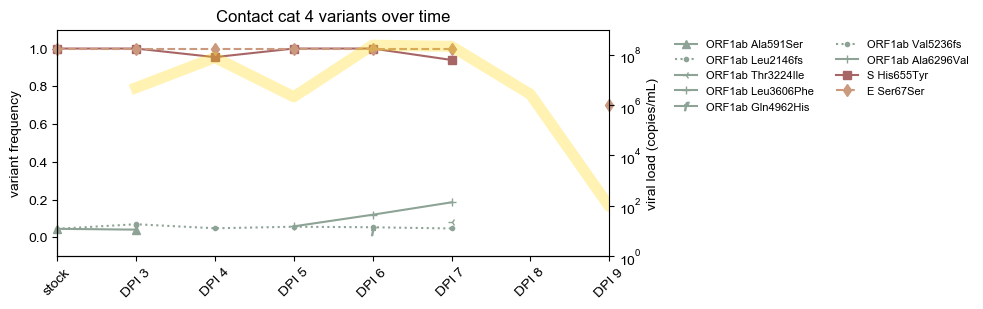

In [299]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
# cat4 = cat4.drop(columns='stock')
# VL4 = VL4.drop(['stock'])

cat4_orf1ab_Ala591Ser = cat4.loc[[2]]
cat4_orf1ab_Ala591Ser['SNP'] = cat4_orf1ab_Ala591Ser['SNP'].replace({'ORF1ab_1982:G>T_Ala591Ser_missense':'ORF1ab Ala591Ser'})
cat4_orf1ab_Ala591Ser = cat4_orf1ab_Ala591Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Ala591Ser_T = cat4_orf1ab_Ala591Ser.T

cat4_orf1ab_Leu2146fs = cat4.loc[[0]]
cat4_orf1ab_Leu2146fs['SNP'] = cat4_orf1ab_Leu2146fs['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146 ins'})
cat4_orf1ab_Leu2146fs = cat4_orf1ab_Leu2146fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Leu2146fs_T = cat4_orf1ab_Leu2146fs.T

cat4_orf1ab_Thr3224Ile = cat4.loc[[8]]
cat4_orf1ab_Thr3224Ile['SNP'] = cat4_orf1ab_Thr3224Ile['SNP'].replace({'ORF1ab_9882:C>T_Thr3224Ile_missense':'ORF1ab Thr3224Ile'})
cat4_orf1ab_Thr3224Ile = cat4_orf1ab_Thr3224Ile[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Thr3224Ile_T = cat4_orf1ab_Thr3224Ile.T

cat4_orf1ab_Leu3606Phe = cat4.loc[[6]]
cat4_orf1ab_Leu3606Phe['SNP'] = cat4_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat4_orf1ab_Leu3606Phe = cat4_orf1ab_Leu3606Phe[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Leu3606Phe_T = cat4_orf1ab_Leu3606Phe.T

cat4_orf1ab_Gln4962His = cat4.loc[[7]]
cat4_orf1ab_Gln4962His['SNP'] = cat4_orf1ab_Gln4962His['SNP'].replace({'ORF1ab_15096:G>T_Gln4962His_missense':'ORF1ab Gln4962His'})
cat4_orf1ab_Gln4962His = cat4_orf1ab_Gln4962His[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Gln4962His_T = cat4_orf1ab_Gln4962His.T

cat4_orf1ab_Val5236fs = cat4.loc[[5]]
cat4_orf1ab_Val5236fs['SNP'] = cat4_orf1ab_Val5236fs['SNP'].replace({'ORF1ab_15911:G>GT_Val5236fs_frameshift':'ORF1ab Val5236 ins'})
cat4_orf1ab_Val5236fs = cat4_orf1ab_Val5236fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Val5236fs_T = cat4_orf1ab_Val5236fs.T

cat4_orf1ab_Ala6296Val = cat4.loc[[1]]
cat4_orf1ab_Ala6296Val['SNP'] = cat4_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat4_orf1ab_Ala6296Val = cat4_orf1ab_Ala6296Val[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Ala6296Val_T = cat4_orf1ab_Ala6296Val.T

cat4_S_His655Tyr = cat4.loc[[3]]
cat4_S_His655Tyr['SNP'] = cat4_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat4_S_His655Tyr = cat4_S_His655Tyr[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_S_His655Tyr_T = cat4_S_His655Tyr.T

cat4_E_Ser67Ser = cat4.loc[[4]]
cat4_E_Ser67Ser['SNP'] = cat4_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat4_E_Ser67Ser = cat4_E_Ser67Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_E_Ser67Ser_T = cat4_E_Ser67Ser.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNP lines
cat4_orf1ab_Ala591Ser_T.plot(marker='^', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat4_orf1ab_Leu2146fs_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat4_orf1ab_Thr3224Ile_T.plot(marker='3', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat4_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat4_orf1ab_Gln4962His_T.plot(marker='$f$', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat4_orf1ab_Val5236fs_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat4_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat4_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat4_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#add viral load line
ax4 = ax1.twinx() 
ax4.plot(VL4['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')

ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax4.set_ylabel('viral load (copies/mL)')

# add title and x axis text
ax1.title.set_text('Contact cat 4 variants over time')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.1,1), fontsize=8, frameon=False, ncol=2, labels=['ORF1ab Ala591Ser', 'ORF1ab Leu2146fs', 'ORF1ab Thr3224Ile', 'ORF1ab Leu3606Phe', 'ORF1ab Gln4962His', 'ORF1ab Val5236fs', 'ORF1ab Ala6296Val', 'S His655Tyr', 'E Ser67Ser'])

# add a little 
# xlabels = ['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']
# x=(0,1,2,3,4,5,6,7)
# plt.xticks(x, labels, rotation='vertical')
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat4_all_snps_over_time_formatted.svg", bbox_inches='tight', dpi=300)
plt.show()
#

In [300]:
cat5 = cat5.drop(columns='stock')

In [301]:
cat5

,SNP,POS,DPI 3,DPI 4,DPI 5,DPI 6,DPI 7,DPI 8,DPI 9,DPI 10
5,ORF1ab_5479:A>G_Gly1756Gly_synonymous,5479.0,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000
0,ORF1ab_6642:C>CT_Leu2146fs_frameshift,6642.0,NaN,NaN,NaN,0.06175,0.08330,0.06840,0.06915,0.06690
3,ORF1ab_11028:TG>T_Leu3606fs_frameshift,11028.0,NaN,NaN,0.03540,0.07320,0.07075,0.07895,0.07910,0.07415
6,ORF1ab_11028:T>TT_Leu3606fs_frameshift,11028.0,NaN,NaN,NaN,0.08990,0.08710,0.07870,0.07775,0.07210
4,ORF1ab_11029:G>T_Leu3606Phe_missense,11029.0,NaN,NaN,0.95575,0.91160,0.92190,0.90955,0.91025,0.91150
7,ORF1ab_15911:G>GT_Val5236fs_frameshift,15911.0,NaN,NaN,NaN,0.04480,0.05460,0.05220,0.06015,0.05950
1,ORF1ab_19097:C>T_Ala6296Val_missense,19097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ORF1ab_19929:C>CT_As576fs_frameshift&stop,19929.0,NaN,NaN,NaN,NaN,0.03750,NaN,NaN,NaN
9,S_21837:TAG>T_As11fs_frameshift,21837.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03915
2,E_26391:T>C_Ser67Ser_synonymous,26391.0,NaN,0.3344,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
VL5

,viral_load
DPI,
stock,NaN
DPI 3,107.0
DPI 4,852.0
DPI 5,518.0
DPI 6,218000.0
DPI 7,84000000.0
DPI 8,534000.0
DPI 9,1860000.0
DPI 10,6.0


/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


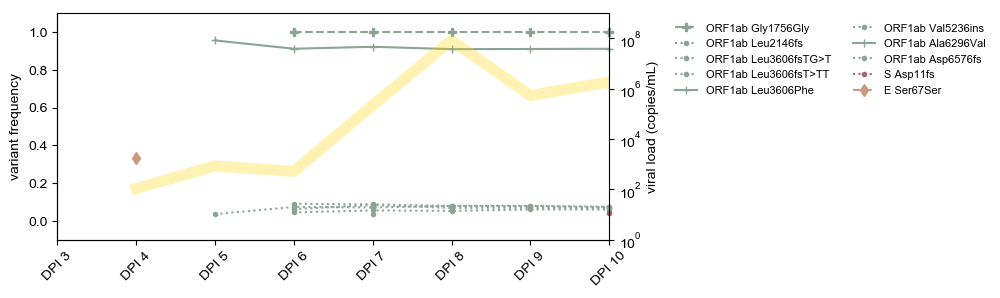

In [303]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
# VL5 = VL5.drop(['stock'])

cat5_orf1ab_Gly1756Gly = cat5.loc[[5]]
cat5_orf1ab_Gly1756Gly['SNP'] = cat5_orf1ab_Gly1756Gly['SNP'].replace({'ORF1ab_5479:A>G_Gly1756Gly_synonymous':'ORF1ab Gly1756Gly'})
cat5_orf1ab_Gly1756Gly = cat5_orf1ab_Gly1756Gly[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Gly1756Gly_T = cat5_orf1ab_Gly1756Gly.T

cat5_orf1ab_Leu2146fs = cat5.loc[[0]]
cat5_orf1ab_Leu2146fs['SNP'] = cat5_orf1ab_Leu2146fs['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146 del'})
cat5_orf1ab_Leu2146fs = cat5_orf1ab_Leu2146fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu2146fs_T = cat5_orf1ab_Leu2146fs.T

cat5_orf1ab_Leu3606fs = cat5.loc[[3]]
cat5_orf1ab_Leu3606fs['SNP'] = cat5_orf1ab_Leu3606fs['SNP'].replace({'ORF1ab_11028:TG>T_Leu3606fs_frameshift':'ORF1ab Leu3606fsTG>T'})
cat5_orf1ab_Leu3606fs = cat5_orf1ab_Leu3606fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu3606fs_T = cat5_orf1ab_Leu3606fs.T

cat5_orf1ab_Leu3606fs2 = cat5.loc[[6]]
cat5_orf1ab_Leu3606fs2['SNP'] = cat5_orf1ab_Leu3606fs2['SNP'].replace({'ORF1ab_11028:T>TT_Leu3606fs_frameshift':'ORF1ab Leu3606fsT>TT'})
cat5_orf1ab_Leu3606fs2 = cat5_orf1ab_Leu3606fs2[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu3606fs2_T = cat5_orf1ab_Leu3606fs2.T

cat5_orf1ab_Leu3606Phe = cat5.loc[[4]]
cat5_orf1ab_Leu3606Phe['SNP'] = cat5_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat5_orf1ab_Leu3606Phe = cat5_orf1ab_Leu3606Phe[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu3606Phe_T = cat5_orf1ab_Leu3606Phe.T

cat5_orf1ab_Val5236ins = cat5.loc[[7]]
cat5_orf1ab_Val5236ins['SNP'] = cat5_orf1ab_Val5236ins['SNP'].replace({'ORF1ab_15911:G>GT_Val5236fs_frameshift':'ORF1ab Val5236ins'})
cat5_orf1ab_Val5236ins = cat5_orf1ab_Val5236ins[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Val5236ins_T = cat5_orf1ab_Val5236ins.T

cat5_orf1ab_Ala6296Val = cat5.loc[[1]]
cat5_orf1ab_Ala6296Val['SNP'] = cat5_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat5_orf1ab_Ala6296Val = cat5_orf1ab_Ala6296Val[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Ala6296Val_T = cat5_orf1ab_Ala6296Val.T

cat5_orf1ab_As576fs = cat5.loc[[8]]
cat5_orf1ab_As576fs['SNP'] = cat5_orf1ab_As576fs['SNP'].replace({'ORF1ab_19929:C>CT_As576fs_frameshift&stop':'ORF1ab Asp6576fs'})
cat5_orf1ab_As576fs = cat5_orf1ab_As576fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_As576fs_T = cat5_orf1ab_As576fs.T

cat5_S_As11fs = cat5.loc[[9]]
cat5_S_As11fs['SNP'] = cat5_S_As11fs['SNP'].replace({'S_21837:TAG>T_As11fs_frameshift':'S Asp11fs'})
cat5_S_As11fs = cat5_S_As11fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_S_As11fs_T = cat5_S_As11fs.T

cat5_E_Ser67Ser = cat5.loc[[2]]
cat5_E_Ser67Ser['SNP'] = cat5_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat5_E_Ser67Ser = cat5_E_Ser67Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_E_Ser67Ser_T = cat5_E_Ser67Ser.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNP lines
cat5_orf1ab_Gly1756Gly_T.plot(marker='P', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat5_orf1ab_Leu2146fs_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat5_orf1ab_Leu3606fs_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat5_orf1ab_Leu3606fs2_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat5_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat5_orf1ab_Val5236ins_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat5_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat5_orf1ab_As576fs_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat5_S_As11fs_T.plot(marker='.', color='#A86566', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat5_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

#add viral load line
ax4 = ax1.twinx() 
ax4.plot(VL5['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')

ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax4.set_ylabel('viral load (copies/mL)')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.1,1), fontsize=8, frameon=False, ncol=2, labels=('ORF1ab Gly1756Gly', 'ORF1ab Leu2146fs', 'ORF1ab Leu3606fsTG>T', 'ORF1ab Leu3606fsT>TT', 'ORF1ab Leu3606Phe', 'ORF1ab Val5236ins', 'ORF1ab Ala6296Val', 'ORF1ab Asp6576fs', 'S Asp11fs', 'E Ser67Ser'))

# add a little 
xlabels = ['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']
x=(0,1,2,3,4,5,6,7)
plt.xticks(x, xlabels, rotation='vertical')
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat5_all_snps_over_time_formatted.svg", bbox_inches='tight', dpi=300)

#

In [304]:
cat6.drop(columns='stock')

,SNP,POS,DPI 4,DPI 5,DPI 6,DPI 7,DPI 8,DPI 9,DPI 10
0,ORF1ab_6642:C>CT_Leu2146fs_frameshift,6642.0,NaN,0.04540,NaN,NaN,NaN,NaN,NaN
1,ORF1ab_19097:C>T_Ala6296Val_missense,19097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ORF1ab_21415:A>G_Ile7069Val_missense,21415.0,NaN,NaN,NaN,NaN,0.18015,NaN,NaN
2,S_23471:C>T_His655Tyr_missense,23471.0,NaN,0.95650,NaN,NaN,0.85295,NaN,NaN
3,E_26391:T>C_Ser67Ser_synonymous,26391.0,NaN,1.00000,NaN,NaN,0.85655,NaN,NaN
4,N_29457:G>A_Ser413Asn_missense,29457.0,NaN,0.06155,NaN,NaN,0.08000,NaN,NaN


In [305]:
VL6

,viral_load
DPI,
stock,NaN
DPI 3,128.0
DPI 4,49.5
DPI 5,11800000.0
DPI 6,265.0
DPI 7,518.0
DPI 8,32800000.0
DPI 9,NaN
DPI 10,169.0


In [310]:
cat6['DPI 3'] = 0 # adding in an empty day three so the plots don't get shifted 
cat6 = cat6[['SNP', 'POS', 'stock', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6 = cat6.replace(0,np.nan)
cat6

,SNP,POS,stock,DPI 3,DPI 4,DPI 5,DPI 6,DPI 7,DPI 8,DPI 9,DPI 10
0,ORF1ab_6642:C>CT_Leu2146fs_frameshift,6642.0,0.0491,NaN,NaN,0.04540,NaN,NaN,NaN,NaN,NaN
1,ORF1ab_19097:C>T_Ala6296Val_missense,19097.0,0.0938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ORF1ab_21415:A>G_Ile7069Val_missense,21415.0,NaN,NaN,NaN,NaN,NaN,NaN,0.18015,NaN,NaN
2,S_23471:C>T_His655Tyr_missense,23471.0,NaN,NaN,NaN,0.95650,NaN,NaN,0.85295,NaN,NaN
3,E_26391:T>C_Ser67Ser_synonymous,26391.0,NaN,NaN,NaN,1.00000,NaN,NaN,0.85655,NaN,NaN
4,N_29457:G>A_Ser413Asn_missense,29457.0,NaN,NaN,NaN,0.06155,NaN,NaN,0.08000,NaN,NaN


/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


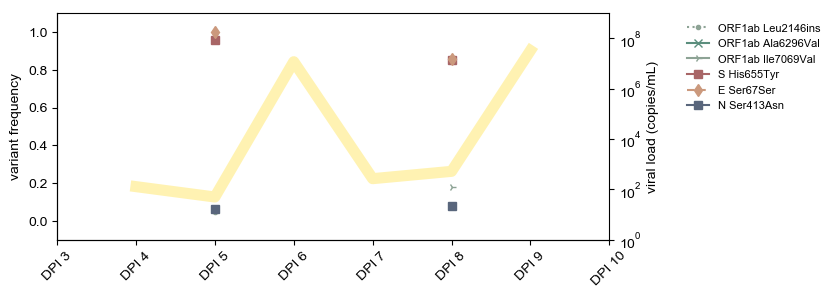

In [315]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
# VL6 = VL6.drop(['stock'])

cat6_orf1ab_Leu2146ins = cat6.loc[[0]]
cat6_orf1ab_Leu2146ins['SNP'] = cat6_orf1ab_Leu2146ins['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146ins'})
cat6_orf1ab_Leu2146ins = cat6_orf1ab_Leu2146ins[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_orf1ab_Leu2146ins_T = cat6_orf1ab_Leu2146ins.T

cat6_orf1ab_Ala6296Val = cat6.loc[[1]]
cat6_orf1ab_Ala6296Val['SNP'] = cat6_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat6_orf1ab_Ala6296Val = cat6_orf1ab_Ala6296Val[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_orf1ab_Ala6296Val_T = cat6_orf1ab_Ala6296Val.T

cat6_orf1ab_Ile7069Val = cat6.loc[[5]]
cat6_orf1ab_Ile7069Val['SNP'] = cat6_orf1ab_Ile7069Val['SNP'].replace({'ORF1ab_21415:A>G_Ile7069Val_missense':'ORF1ab Ile7069Val'})
cat6_orf1ab_Ile7069Val = cat6_orf1ab_Ile7069Val[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_orf1ab_Ile7069Val_T = cat6_orf1ab_Ile7069Val.T

cat6_S_His655Tyr = cat6.loc[[2]]
cat6_S_His655Tyr['SNP'] = cat6_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat6_S_His655Tyr = cat6_S_His655Tyr[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_S_His655Tyr_T = cat6_S_His655Tyr.T

cat6_E_Ser67Ser = cat6.loc[[3]]
cat6_E_Ser67Ser['SNP'] = cat6_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat6_E_Ser67Ser = cat6_E_Ser67Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_E_Ser67Ser_T = cat6_E_Ser67Ser.T

cat6_N_Ser413Asn = cat6.loc[[4]]
cat6_N_Ser413Asn['SNP'] = cat6_N_Ser413Asn['SNP'].replace({'N_29457:G>A_Ser413Asn_missense':'Ser413Asn'})
cat6_N_Ser413Asn = cat6_N_Ser413Asn[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_N_Ser413Asn_T = cat6_N_Ser413Asn.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) # syn

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNP lines
cat6_orf1ab_Leu2146ins_T.plot(marker='.', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat6_orf1ab_Ala6296Val_T.plot(marker='x', color='#5b8e7d', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat6_orf1ab_Ile7069Val_T.plot(marker='4', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat6_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat6_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat6_N_Ser413Asn_T.plot(marker='s', color='#59667C', linestyle='solid', ax=ax1, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('synonymous variants')
ax1.set(xlabel="",ylabel="SNP frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

#add viral load line
ax4 = ax1.twinx() 
ax4.plot(VL6['viral_load'], linewidth=8, alpha=0.3, label=column, color='gold')

ax4.set_yscale('log')
ax4.set_ylim([1,1000000000])

ax4.set_ylabel('viral load (copies/mL)')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.4,1), fontsize=8, frameon=False, ncol=1, labels=('ORF1ab Leu2146ins',  'ORF1ab Ala6296Val', 'ORF1ab Ile7069Val', 'S His655Tyr',  'E Ser67Ser','N Ser413Asn'
))

# add a little 
xlabels = ['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']
x=(0,1,2,3,4,5,6,7)
plt.xticks(x, xlabels, rotation='vertical')

# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat6_all_snps_over_time_formatted.svg", bbox_inches='tight', dpi=300)
plt.show()
#


## Plotting the transmission pairs on the same axes without any of the indels 


/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


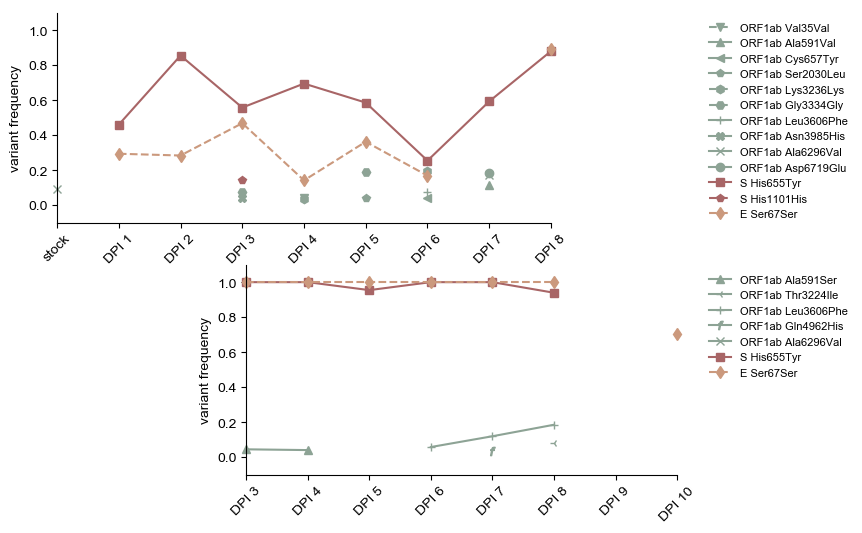

In [349]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
cat1_orf1ab_Val35Val = cat1.loc[[7]]
cat1_orf1ab_Val35Val['SNP'] = cat1_orf1ab_Val35Val['SNP'].replace({'ORF1ab_316:G>T_Val35Val_synonymous':'ORF1ab Val35Val'})
cat1_orf1ab_Val35Val = cat1_orf1ab_Val35Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Val35Val_T = cat1_orf1ab_Val35Val.T

cat1_orf1ab_Ala591Val = cat1.loc[[13]]
cat1_orf1ab_Ala591Val['SNP'] = cat1_orf1ab_Ala591Val['SNP'].replace({'ORF1ab_1983:C>T_Ala591Val_missense':'ORF1ab Ala591Val'})
cat1_orf1ab_Ala591Val = cat1_orf1ab_Ala591Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Ala591Val_T = cat1_orf1ab_Ala591Val.T

cat1_orf1ab_Cys657Tyr = cat1.loc[[11]]
cat1_orf1ab_Cys657Tyr['SNP'] = cat1_orf1ab_Cys657Tyr['SNP'].replace({'ORF1ab_2181:G>A_Cys657Tyr_missense':'ORF1ab Cys657Tyr'})
cat1_orf1ab_Cys657Tyr = cat1_orf1ab_Cys657Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Cys657Tyr_T = cat1_orf1ab_Cys657Tyr.T

cat1_orf1ab_Ser2030Leu = cat1.loc[[10]]
cat1_orf1ab_Ser2030Leu['SNP'] = cat1_orf1ab_Ser2030Leu['SNP'].replace({'ORF1ab_6300:C>T_Ser2030Leu_missense':'ORF1ab Ser2030Leu'})
cat1_orf1ab_Ser2030Leu = cat1_orf1ab_Ser2030Leu[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Ser2030Leu_T = cat1_orf1ab_Ser2030Leu.T

cat1_orf1ab_Lys3236Lys = cat1.loc[[8]]
cat1_orf1ab_Lys3236Lys['SNP'] = cat1_orf1ab_Lys3236Lys['SNP'].replace({'ORF1ab_9919:G>A_Lys3236Lys_synonymous':'ORF1ab Lys3236Lys'})
cat1_orf1ab_Lys3236Lys = cat1_orf1ab_Lys3236Lys[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Lys3236Lys_T = cat1_orf1ab_Lys3236Lys.T

cat1_orf1ab_Gly3334Gly = cat1.loc[[4]]
cat1_orf1ab_Gly3334Gly['SNP'] = cat1_orf1ab_Gly3334Gly['SNP'].replace({'ORF1ab_10213:T>C_Gly3334Gly_synonymous':'ORF1ab Gly3334Gly'})
cat1_orf1ab_Gly3334Gly = cat1_orf1ab_Gly3334Gly[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Gly3334Gly_T = cat1_orf1ab_Gly3334Gly.T

cat1_orf1ab_Leu3606Phe = cat1.loc[[12]]
cat1_orf1ab_Leu3606Phe['SNP'] = cat1_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat1_orf1ab_Leu3606Phe = cat1_orf1ab_Leu3606Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Leu3606Phe_T = cat1_orf1ab_Leu3606Phe.T

cat1_orf1ab_Asn3985His = cat1.loc[[5]]
cat1_orf1ab_Asn3985His['SNP'] = cat1_orf1ab_Asn3985His['SNP'].replace({'ORF1ab_12164:A>C_Asn3985His_missense':'ORF1ab Asn3985His'})
cat1_orf1ab_Asn3985His = cat1_orf1ab_Asn3985His[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Asn3985His_T = cat1_orf1ab_Asn3985His.T

cat1_orf1ab_Ala6296Val = cat1.loc[[1]]
cat1_orf1ab_Ala6296Val['SNP'] = cat1_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat1_orf1ab_Ala6296Val = cat1_orf1ab_Ala6296Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Ala6296Val_T = cat1_orf1ab_Ala6296Val.T

cat1_orf1ab_Asp6719Glu = cat1.loc[[14]]
cat1_orf1ab_Asp6719Glu['SNP'] = cat1_orf1ab_Asp6719Glu['SNP'].replace({'ORF1ab_20367:T>A_As719Glu_missense':'ORF1ab Asp6719Glu'})
cat1_orf1ab_Asp6719Glu = cat1_orf1ab_Asp6719Glu[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Asp6719Glu_T = cat1_orf1ab_Asp6719Glu.T

cat1_S_His655Tyr = cat1.loc[[2]]
cat1_S_His655Tyr['SNP'] = cat1_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat1_S_His655Tyr = cat1_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_S_His655Tyr_T = cat1_S_His655Tyr.T

cat1_S_His1101His = cat1.loc[[6]]
cat1_S_His1101His['SNP'] = cat1_S_His1101His['SNP'].replace({'S_24811:C>T_His1101His_synonymous':'S His1101His'})
cat1_S_His1101His = cat1_S_His1101His[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_S_His1101His_T = cat1_S_His1101His.T

cat1_E_Ser67Ser = cat1.loc[[3]]
cat1_E_Ser67Ser['SNP'] = cat1_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat1_E_Ser67Ser = cat1_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_E_Ser67Ser_T = cat1_E_Ser67Ser.T

cat4_orf1ab_Ala591Ser = cat4.loc[[2]]
cat4_orf1ab_Ala591Ser['SNP'] = cat4_orf1ab_Ala591Ser['SNP'].replace({'ORF1ab_1982:G>T_Ala591Ser_missense':'ORF1ab Ala591Ser'})
cat4_orf1ab_Ala591Ser = cat4_orf1ab_Ala591Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Ala591Ser_T = cat4_orf1ab_Ala591Ser.T

cat4_orf1ab_Thr3224Ile = cat4.loc[[8]]
cat4_orf1ab_Thr3224Ile['SNP'] = cat4_orf1ab_Thr3224Ile['SNP'].replace({'ORF1ab_9882:C>T_Thr3224Ile_missense':'ORF1ab Thr3224Ile'})
cat4_orf1ab_Thr3224Ile = cat4_orf1ab_Thr3224Ile[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Thr3224Ile_T = cat4_orf1ab_Thr3224Ile.T

cat4_orf1ab_Leu3606Phe = cat4.loc[[6]]
cat4_orf1ab_Leu3606Phe['SNP'] = cat4_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat4_orf1ab_Leu3606Phe = cat4_orf1ab_Leu3606Phe[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Leu3606Phe_T = cat4_orf1ab_Leu3606Phe.T

cat4_orf1ab_Gln4962His = cat4.loc[[7]]
cat4_orf1ab_Gln4962His['SNP'] = cat4_orf1ab_Gln4962His['SNP'].replace({'ORF1ab_15096:G>T_Gln4962His_missense':'ORF1ab Gln4962His'})
cat4_orf1ab_Gln4962His = cat4_orf1ab_Gln4962His[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Gln4962His_T = cat4_orf1ab_Gln4962His.T

cat4_orf1ab_Ala6296Val = cat4.loc[[1]]
cat4_orf1ab_Ala6296Val['SNP'] = cat4_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat4_orf1ab_Ala6296Val = cat4_orf1ab_Ala6296Val[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Ala6296Val_T = cat4_orf1ab_Ala6296Val.T

cat4_S_His655Tyr = cat4.loc[[3]]
cat4_S_His655Tyr['SNP'] = cat4_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat4_S_His655Tyr = cat4_S_His655Tyr[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_S_His655Tyr_T = cat4_S_His655Tyr.T

cat4_E_Ser67Ser = cat4.loc[[4]]
cat4_E_Ser67Ser['SNP'] = cat4_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat4_E_Ser67Ser = cat4_E_Ser67Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_E_Ser67Ser_T = cat4_E_Ser67Ser.T  

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(8,6), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0,0:8]) # index
ax2 = fig.add_subplot(gs[1,3:10])# contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True) 

#plot SNP lines - index 
cat1_orf1ab_Val35Val_T.plot(marker='v', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Ala591Val_T.plot(marker='^', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Cys657Tyr_T.plot(marker='<', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Ser2030Leu_T.plot(marker='p', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Lys3236Lys_T.plot(marker='h', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Gly3334Gly_T.plot(marker='H', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Asn3985His_T.plot(marker='X', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Asp6719Glu_T.plot(marker='o', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_S_His1101His_T.plot(marker='p', color='#A86566', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat1_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - contact
cat4_orf1ab_Ala591Ser_T.plot(marker='^', color='#8DA395', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat4_orf1ab_Thr3224Ile_T.plot(marker='3', color='#8DA395', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat4_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat4_orf1ab_Gln4962His_T.plot(marker='$f$', color='#8DA395', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat4_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat4_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat4_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax2, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('index cat 1')
ax1.set(xlabel="",ylabel="iSNV frequency")

# ax2.title.set_text('contact cat 4')
ax2.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

ax2.set_ylim([-0.1, 1.1])
ax2.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.3,1), fontsize=8, frameon=False, ncol=1, labels=['ORF1ab Val35Val', 'ORF1ab Ala591Val','ORF1ab Cys657Tyr', 'ORF1ab Ser2030Leu', 'ORF1ab Lys3236Lys', 'ORF1ab Gly3334Gly', 'ORF1ab Leu3606Phe', 'ORF1ab Asn3985His', 'ORF1ab Ala6296Val', 'ORF1ab Asp6719Glu', 'S His655Tyr','S His1101His','E Ser67Ser'])

ax2.legend(bbox_to_anchor=(1.05,1), fontsize=8, frameon=False, ncol=1, labels=['ORF1ab Ala591Ser', 'ORF1ab Thr3224Ile', 'ORF1ab Leu3606Phe', 'ORF1ab Gln4962His', 'ORF1ab Ala6296Val', 'S His655Tyr', 'E Ser67Ser'])
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/iSNVs_over_time_pair_1.svg", bbox_inches='tight', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


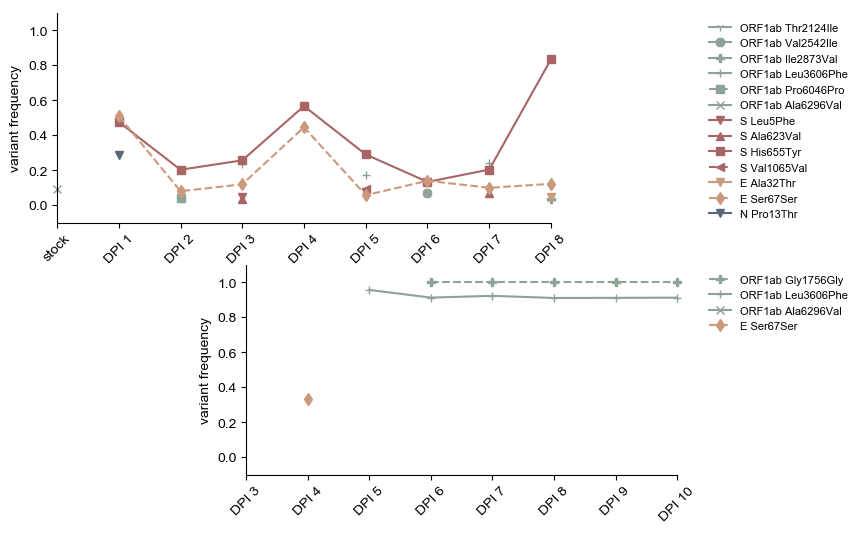

In [354]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
cat2_orf1ab_Thr2124Ile = cat2.loc[[2]]
cat2_orf1ab_Thr2124Ile['SNP'] = cat2_orf1ab_Thr2124Ile['SNP'].replace({'ORF1ab_6582:C>T_Thr2124Ile_missense':'ORF1ab Thr2124Ile'})
cat2_orf1ab_Thr2124Ile = cat2_orf1ab_Thr2124Ile[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Thr2124Ile_T = cat2_orf1ab_Thr2124Ile.T

cat2_orf1ab_Val2542Ile = cat2.loc[[14]]
cat2_orf1ab_Val2542Ile['SNP'] = cat2_orf1ab_Val2542Ile['SNP'].replace({'ORF1ab_7835:G>A_Val2542Ile_missense':'ORF1ab Val2542Ile'})
cat2_orf1ab_Val2542Ile = cat2_orf1ab_Val2542Ile[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Val2542Ile_T = cat2_orf1ab_Val2542Ile.T

cat2_orf1ab_Ile2873Val = cat2.loc[[17]]
cat2_orf1ab_Ile2873Val['SNP'] = cat2_orf1ab_Ile2873Val['SNP'].replace({'ORF1ab_8828:A>G_Ile2873Val_missense':'ORF1ab Ile2873Val'})
cat2_orf1ab_Ile2873Val = cat2_orf1ab_Ile2873Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Ile2873Val_T = cat2_orf1ab_Ile2873Val.T

cat2_orf1ab_Leu3606Phe = cat2.loc[[10]]
cat2_orf1ab_Leu3606Phe['SNP'] = cat2_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat2_orf1ab_Leu3606Phe = cat2_orf1ab_Leu3606Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Leu3606Phe_T = cat2_orf1ab_Leu3606Phe.T

cat2_orf1ab_Pro6046Pro = cat2.loc[[8]]
cat2_orf1ab_Pro6046Pro['SNP'] = cat2_orf1ab_Pro6046Pro['SNP'].replace({'ORF1ab_18348:T>A_Pro6046Pro_synonymous':'ORF1ab Pro6046Pro'})
cat2_orf1ab_Pro6046Pro = cat2_orf1ab_Pro6046Pro[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Pro6046Pro_T = cat2_orf1ab_Pro6046Pro.T

cat2_orf1ab_Ala6296Val = cat2.loc[[1]]
cat2_orf1ab_Ala6296Val['SNP'] = cat2_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat2_orf1ab_Ala6296Val = cat2_orf1ab_Ala6296Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Ala6296Val_T = cat2_orf1ab_Ala6296Val.T

cat2_S_Leu5Phe = cat2.loc[[11]]
cat2_S_Leu5Phe['SNP'] = cat2_S_Leu5Phe['SNP'].replace({'S_21521:C>T_Leu5Phe_missense':'ORF1ab Leu5Phe'})
cat2_S_Leu5Phe = cat2_S_Leu5Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Leu5Phe_T = cat2_S_Leu5Phe.T

cat2_S_Ala623Val = cat2.loc[[12]]
cat2_S_Ala623Val['SNP'] = cat2_S_Ala623Val['SNP'].replace({'S_23376:C>T_Ala623Val_missense':'S Ala623Val'})
cat2_S_Ala623Val = cat2_S_Ala623Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Ala623Val_T = cat2_S_Ala623Val.T

cat2_S_His655Tyr = cat2.loc[[3]]
cat2_S_His655Tyr['SNP'] = cat2_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat2_S_His655Tyr = cat2_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_His655Tyr_T = cat2_S_His655Tyr.T

cat2_S_Val1065Val = cat2.loc[[13]]
cat2_S_Val1065Val['SNP'] = cat2_S_Val1065Val['SNP'].replace({'S_24703:G>T_Val1065Val_synonymous':'S Val1065Val'})
cat2_S_Val1065Val = cat2_S_Val1065Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Val1065Val_T = cat2_S_Val1065Val.T

cat2_E_Ala32Thr = cat2.loc[[18]]
cat2_E_Ala32Thr['SNP'] = cat2_E_Ala32Thr['SNP'].replace({'E_26284:G>A_Ala32Thr_missense':'E Ala32Thr'})
cat2_E_Ala32Thr = cat2_E_Ala32Thr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_E_Ala32Thr_T = cat2_E_Ala32Thr.T

cat2_E_Ser67Ser = cat2.loc[[5]]
cat2_E_Ser67Ser['SNP'] = cat2_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat2_E_Ser67Ser = cat2_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_E_Ser67Ser_T = cat2_E_Ser67Ser.T

cat2_N_Pro13Thr = cat2.loc[[7]]
cat2_N_Pro13Thr['SNP'] = cat2_N_Pro13Thr['SNP'].replace({'N_28256:C>A_Pro13Thr_missense':'N Pro13Thr'})
cat2_N_Pro13Thr = cat2_N_Pro13Thr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_N_Pro13Thr_T = cat2_N_Pro13Thr.T

cat5_orf1ab_Gly1756Gly = cat5.loc[[5]]
cat5_orf1ab_Gly1756Gly['SNP'] = cat5_orf1ab_Gly1756Gly['SNP'].replace({'ORF1ab_5479:A>G_Gly1756Gly_synonymous':'ORF1ab Gly1756Gly'})
cat5_orf1ab_Gly1756Gly = cat5_orf1ab_Gly1756Gly[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Gly1756Gly_T = cat5_orf1ab_Gly1756Gly.T

cat5_orf1ab_Leu3606Phe = cat5.loc[[4]]
cat5_orf1ab_Leu3606Phe['SNP'] = cat5_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat5_orf1ab_Leu3606Phe = cat5_orf1ab_Leu3606Phe[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu3606Phe_T = cat5_orf1ab_Leu3606Phe.T

cat5_orf1ab_Ala6296Val = cat5.loc[[1]]
cat5_orf1ab_Ala6296Val['SNP'] = cat5_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat5_orf1ab_Ala6296Val = cat5_orf1ab_Ala6296Val[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Ala6296Val_T = cat5_orf1ab_Ala6296Val.T

cat5_E_Ser67Ser = cat5.loc[[2]]
cat5_E_Ser67Ser['SNP'] = cat5_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat5_E_Ser67Ser = cat5_E_Ser67Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_E_Ser67Ser_T = cat5_E_Ser67Ser.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(8,6), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0,0:8]) # index
ax2 = fig.add_subplot(gs[1,3:10])# contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True) 

#plot SNP lines - index 

cat2_orf1ab_Thr2124Ile_T.plot(marker='1', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Val2542Ile_T.plot(marker='8', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Ile2873Val_T.plot(marker='P', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Pro6046Pro_T.plot(marker='s', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_S_Leu5Phe_T.plot(marker='v', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_S_Ala623Val_T.plot(marker='^', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_S_Val1065Val_T.plot(marker='<', color='#A86566', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat2_E_Ala32Thr_T.plot(marker='v', color='#CB997D', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat2_N_Pro13Thr_T.plot(marker='v', color='#59667C', linestyle='solid', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - contact
cat5_orf1ab_Gly1756Gly_T.plot(marker='P', color='#8DA395', linestyle='dashed', ax=ax2, legend=False, clip_on=False)
cat5_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat5_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat5_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax2, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('index cat 2')
ax1.set(xlabel="",ylabel="iSNV frequency")

# ax2.title.set_text('contact cat 5')
ax2.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

ax2.set_ylim([-0.1, 1.1])
ax2.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.3,1), fontsize=8, frameon=False, ncol=1, labels=('ORF1ab Thr2124Ile', 'ORF1ab Val2542Ile', 'ORF1ab Ile2873Val', 'ORF1ab Leu3606Phe', 'ORF1ab Pro6046Pro', 'ORF1ab Ala6296Val', 'S Leu5Phe', 'S Ala623Val', 'S His655Tyr', 'S Val1065Val', 'E Ala32Thr', 'E Ser67Ser', 'N Pro13Thr'))

ax2.legend(bbox_to_anchor=(1.05,1), fontsize=8, frameon=False, ncol=1, labels=('ORF1ab Gly1756Gly', 'ORF1ab Leu3606Phe', 'ORF1ab Ala6296Val', 'E Ser67Ser'))

# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/iSNVs_over_time_pair_2.svg", bbox_inches='tight', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


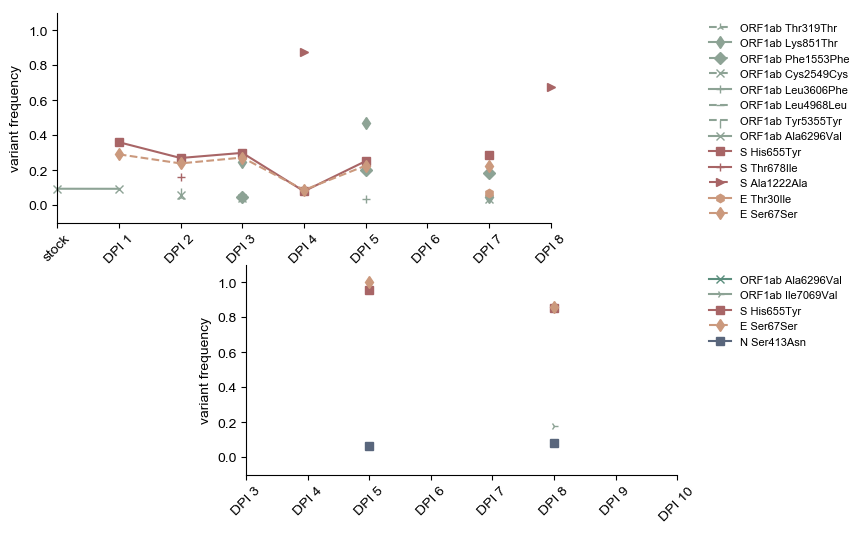

In [358]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
cat3_orf1ab_Thr319Thr = cat3.loc[[4]]
cat3_orf1ab_Thr319Thr['SNP'] = cat3_orf1ab_Thr319Thr['SNP'].replace({'ORF1ab_1168:T>C_Thr319Thr_synonymous':'ORF1ab Thr319Thr'})
cat3_orf1ab_Thr319Thr = cat3_orf1ab_Thr319Thr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Thr319Thr_T = cat3_orf1ab_Thr319Thr.T

cat3_orf1ab_Lys851Thr = cat3.loc[[8]]
cat3_orf1ab_Lys851Thr['SNP'] = cat3_orf1ab_Lys851Thr['SNP'].replace({'ORF1ab_2763:A>C_Lys851Thr_missense':'ORF1ab Lys851Thr'})
cat3_orf1ab_Lys851Thr = cat3_orf1ab_Lys851Thr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Lys851Thr_T = cat3_orf1ab_Lys851Thr.T

cat3_orf1ab_Phe1553Phe = cat3.loc[[9]]
cat3_orf1ab_Phe1553Phe['SNP'] = cat3_orf1ab_Phe1553Phe['SNP'].replace({'ORF1ab_4870:T>C_Phe1553Phe_synonymous':'ORF1ab Phe1553Phe'})
cat3_orf1ab_Phe1553Phe = cat3_orf1ab_Phe1553Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Phe1553Phe_T = cat3_orf1ab_Phe1553Phe.T

cat3_orf1ab_Cys2549Cys = cat3.loc[[5]]
cat3_orf1ab_Cys2549Cys['SNP'] = cat3_orf1ab_Cys2549Cys['SNP'].replace({'ORF1ab_7858:T>C_Cys2549Cys_synonymous':'ORF1ab Cys2549Cys'})
cat3_orf1ab_Cys2549Cys = cat3_orf1ab_Cys2549Cys[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5','DPI 6',  'DPI 7', 'DPI 8']]
cat3_orf1ab_Cys2549Cys_T = cat3_orf1ab_Cys2549Cys.T

cat3_orf1ab_Leu3606Phe = cat3.loc[[12]]
cat3_orf1ab_Leu3606Phe['SNP'] = cat3_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat3_orf1ab_Leu3606Phe = cat3_orf1ab_Leu3606Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Leu3606Phe_T = cat3_orf1ab_Leu3606Phe.T

cat3_orf1ab_Leu4968Leu = cat3.loc[[10]]
cat3_orf1ab_Leu4968Leu['SNP'] = cat3_orf1ab_Leu4968Leu['SNP'].replace({'ORF1ab_15114:G>A_Leu4968Leu_synonymous':'ORF1ab Leu4968Leu'})
cat3_orf1ab_Leu4968Leu = cat3_orf1ab_Leu4968Leu[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Leu4968Leu_T = cat3_orf1ab_Leu4968Leu.T

cat3_orf1ab_Tyr5355Tyr = cat3.loc[[6]]
cat3_orf1ab_Tyr5355Tyr['SNP'] = cat3_orf1ab_Tyr5355Tyr['SNP'].replace({'ORF1ab_16275:C>T_Tyr5355Tyr_synonymous':'ORF1ab Tyr5355Tyr'})
cat3_orf1ab_Tyr5355Tyr = cat3_orf1ab_Tyr5355Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Tyr5355Tyr_T = cat3_orf1ab_Tyr5355Tyr.T

cat3_orf1ab_Ala6296Val = cat3.loc[[1]]
cat3_orf1ab_Ala6296Val['SNP'] = cat3_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat3_orf1ab_Ala6296Val = cat3_orf1ab_Ala6296Val[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Ala6296Val_T = cat3_orf1ab_Ala6296Val.T

cat3_S_His655Tyr = cat3.loc[[2]]
cat3_S_His655Tyr['SNP'] = cat3_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat3_S_His655Tyr = cat3_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_His655Tyr_T = cat3_S_His655Tyr.T

cat3_S_Thr678Ile = cat3.loc[[7]]
cat3_S_Thr678Ile['SNP'] = cat3_S_Thr678Ile['SNP'].replace({'S_23541:C>T_Thr678Ile_missense':'S Thr678Ile'})
cat3_S_Thr678Ile = cat3_S_Thr678Ile[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5','DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_Thr678Ile_T = cat3_S_Thr678Ile.T

cat3_S_Ala1222Ala = cat3.loc[[11]]
cat3_S_Ala1222Ala['SNP'] = cat3_S_Ala1222Ala['SNP'].replace({'S_25174:T>A_Ala1222Ala_synonymous':'S Ala1222Ala'})
cat3_S_Ala1222Ala = cat3_S_Ala1222Ala[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_Ala1222Ala_T = cat3_S_Ala1222Ala.T

cat3_E_Thr30Ile = cat3.loc[[14]]
cat3_E_Thr30Ile['SNP'] = cat3_E_Thr30Ile['SNP'].replace({'E_26279:C>T_Thr30Ile_missense':'E Thr30Ile'})
cat3_E_Thr30Ile = cat3_E_Thr30Ile[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_E_Thr30Ile_T = cat3_E_Thr30Ile.T

cat3_E_Ser67Ser = cat3.loc[[3]]
cat3_E_Ser67Ser['SNP'] = cat3_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat3_E_Ser67Ser = cat3_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_E_Ser67Ser_T = cat3_E_Ser67Ser.T

cat6_orf1ab_Ala6296Val = cat6.loc[[1]]
cat6_orf1ab_Ala6296Val['SNP'] = cat6_orf1ab_Ala6296Val['SNP'].replace({'ORF1ab_19097:C>T_Ala6296Val_missense':'ORF1ab Ala6296Val'})
cat6_orf1ab_Ala6296Val = cat6_orf1ab_Ala6296Val[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_orf1ab_Ala6296Val_T = cat6_orf1ab_Ala6296Val.T

cat6_orf1ab_Ile7069Val = cat6.loc[[5]]
cat6_orf1ab_Ile7069Val['SNP'] = cat6_orf1ab_Ile7069Val['SNP'].replace({'ORF1ab_21415:A>G_Ile7069Val_missense':'ORF1ab Ile7069Val'})
cat6_orf1ab_Ile7069Val = cat6_orf1ab_Ile7069Val[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_orf1ab_Ile7069Val_T = cat6_orf1ab_Ile7069Val.T

cat6_S_His655Tyr = cat6.loc[[2]]
cat6_S_His655Tyr['SNP'] = cat6_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat6_S_His655Tyr = cat6_S_His655Tyr[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_S_His655Tyr_T = cat6_S_His655Tyr.T

cat6_E_Ser67Ser = cat6.loc[[3]]
cat6_E_Ser67Ser['SNP'] = cat6_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat6_E_Ser67Ser = cat6_E_Ser67Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_E_Ser67Ser_T = cat6_E_Ser67Ser.T

cat6_N_Ser413Asn = cat6.loc[[4]]
cat6_N_Ser413Asn['SNP'] = cat6_N_Ser413Asn['SNP'].replace({'N_29457:G>A_Ser413Asn_missense':'Ser413Asn'})
cat6_N_Ser413Asn = cat6_N_Ser413Asn[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_N_Ser413Asn_T = cat6_N_Ser413Asn.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(8,6), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0,0:8]) # index
ax2 = fig.add_subplot(gs[1,3:10])# contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True) 

#plot SNP lines - index 
cat3_orf1ab_Thr319Thr_T.plot(marker='2', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Lys851Thr_T.plot(marker='d', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Phe1553Phe_T.plot(marker='D', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Cys2549Cys_T.plot(marker='x', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Leu3606Phe_T.plot(marker='+', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Leu4968Leu_T.plot(marker='_', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Tyr5355Tyr_T.plot(marker=3, color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Ala6296Val_T.plot(marker='x', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_S_Thr678Ile_T.plot(marker='+', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_S_Ala1222Ala_T.plot(marker='>', color='#A86566', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_E_Thr30Ile_T.plot(marker='h', color='#CB997D', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - contact
cat6_orf1ab_Ala6296Val_T.plot(marker='x', color='#5b8e7d', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat6_orf1ab_Ile7069Val_T.plot(marker='4', color='#8DA395', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat6_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax2, legend=False, clip_on=False)
cat6_E_Ser67Ser_T.plot(marker='d', color='#CB997D', linestyle='dashed', ax=ax2, legend=False, clip_on=False)
cat6_N_Ser413Asn_T.plot(marker='s', color='#59667C', linestyle='solid', ax=ax2, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('index cat 3')
ax1.set(xlabel="",ylabel="iSNV frequency")

# ax2.title.set_text('contact cat 6')
ax2.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

ax2.set_ylim([-0.1, 1.1])
ax2.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.3,1), fontsize=8, frameon=False, ncol=1, labels=('ORF1ab Thr319Thr', 'ORF1ab Lys851Thr', 'ORF1ab Phe1553Phe', 'ORF1ab Cys2549Cys', 'ORF1ab Leu3606Phe', 'ORF1ab Leu4968Leu', 'ORF1ab Tyr5355Tyr', 'ORF1ab Ala6296Val', 'S His655Tyr', 'S Thr678Ile', 'S Ala1222Ala', 'E Thr30Ile', 'E Ser67Ser'))

ax2.legend(bbox_to_anchor=(1.05,1), fontsize=8, frameon=False, ncol=1, labels=('ORF1ab Ala6296Val', 'ORF1ab Ile7069Val', 'S His655Tyr',  'E Ser67Ser','N Ser413Asn'))

# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/iSNVs_over_time_pair_3.svg", bbox_inches='tight', dpi=300)

#

## plotting transmission pairs with indels only 

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


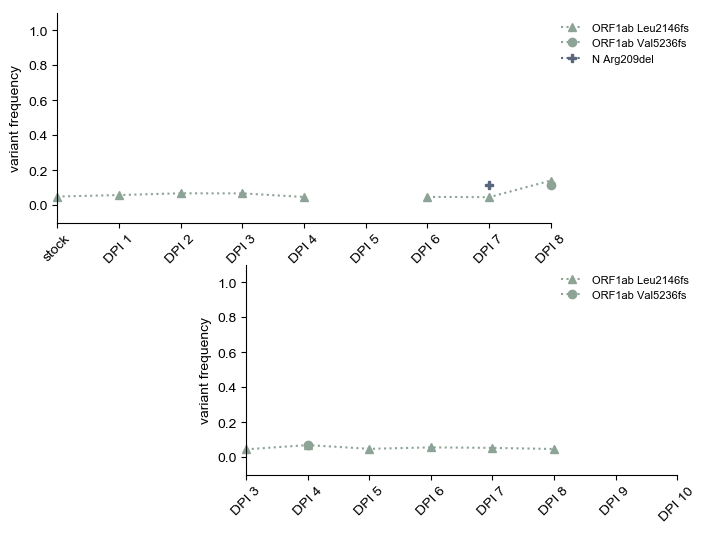

In [365]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
cat1_orf1ab_Leu2146fs = cat1.loc[[0]]
cat1_orf1ab_Leu2146fs['SNP'] = cat1_orf1ab_Leu2146fs['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146 ins'})
cat1_orf1ab_Leu2146fs = cat1_orf1ab_Leu2146fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Leu2146fs_T = cat1_orf1ab_Leu2146fs.T

cat1_orf1ab_Val5236fs = cat1.loc[[15]]
cat1_orf1ab_Val5236fs['SNP'] = cat1_orf1ab_Val5236fs['SNP'].replace({'ORF1ab_15911:G>GT_Val5236fs_frameshift':'ORF1ab Val5236 ins'})
cat1_orf1ab_Val5236fs = cat1_orf1ab_Val5236fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_orf1ab_Val5236fs_T = cat1_orf1ab_Val5236fs.T

cat1_N_Arg209del = cat1.loc[[13]]
cat1_N_Arg209del['SNP'] = cat1_N_Arg209del['SNP'].replace({'N_28843:TAGA>T_Arg209del_disruptive-inframe-deletion':'N Arg209 del'})
cat1_N_Arg209del = cat1_N_Arg209del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_N_Arg209del_T = cat1_N_Arg209del.T

cat4_orf1ab_Leu2146fs = cat4.loc[[0]]
cat4_orf1ab_Leu2146fs['SNP'] = cat4_orf1ab_Leu2146fs['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146 ins'})
cat4_orf1ab_Leu2146fs = cat4_orf1ab_Leu2146fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Leu2146fs_T = cat4_orf1ab_Leu2146fs.T

cat4_orf1ab_Val5236fs = cat4.loc[[5]]
cat4_orf1ab_Val5236fs['SNP'] = cat4_orf1ab_Val5236fs['SNP'].replace({'ORF1ab_15911:G>GT_Val5236fs_frameshift':'ORF1ab Val5236 ins'})
cat4_orf1ab_Val5236fs = cat4_orf1ab_Val5236fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_orf1ab_Val5236fs_T = cat4_orf1ab_Val5236fs.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(8,6), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0,0:8]) # index
ax2 = fig.add_subplot(gs[1,3:10])# contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True) 

#plot SNP lines - index 
cat1_orf1ab_Leu2146fs_T.plot(marker='^', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat1_orf1ab_Val5236fs_T.plot(marker='o', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat1_N_Arg209del_T.plot(marker='P', color='#59667C', linestyle='dotted', ax=ax1, legend=False, clip_on=False)  

#plot SNP lines - contact
cat4_orf1ab_Leu2146fs_T.plot(marker='^', color='#8DA395', linestyle='dotted', ax=ax2, legend=False, clip_on=False)
cat4_orf1ab_Val5236fs_T.plot(marker='o', color='#8DA395', linestyle='dotted', ax=ax2, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('index cat 1')
ax1.set(xlabel="",ylabel="iSNV frequency")

# ax2.title.set_text('contact cat 4')
ax2.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

ax2.set_ylim([-0.1, 1.1])
ax2.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.3,1), fontsize=8, frameon=False, ncol=1, labels=['ORF1ab Leu2146fs', 'ORF1ab Val5236fs', 'N Arg209del'])

ax2.legend(bbox_to_anchor=(1.05,1), fontsize=8, frameon=False, ncol=1, labels=['ORF1ab Leu2146fs', 'ORF1ab Val5236fs'])
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/indels_over_time_pair_1.svg", bbox_inches='tight', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


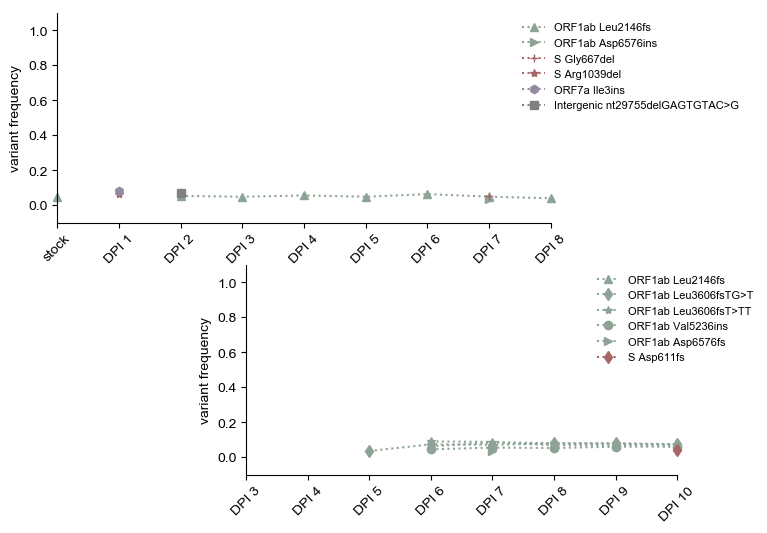

In [370]:
cat2_orf1ab_Leu2146fs = cat2.loc[[0]]
cat2_orf1ab_Leu2146fs['SNP'] = cat2_orf1ab_Leu2146fs['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146 del'})
cat2_orf1ab_Leu2146fs = cat2_orf1ab_Leu2146fs[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Leu2146fs_T = cat2_orf1ab_Leu2146fs.T

cat2_orf1ab_Asp6576ins = cat2.loc[[15]]
cat2_orf1ab_Asp6576ins['SNP'] = cat2_orf1ab_Asp6576ins['SNP'].replace({'ORF1ab_19929:C>CT_As576fs_frameshift&stop':'ORF1ab Alp6576ins'})
cat2_orf1ab_Asp6576ins = cat2_orf1ab_Asp6576ins[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Asp6576ins_T = cat2_orf1ab_Asp6576ins.T

cat2_S_Gly667del = cat2.loc[[16]]
cat2_S_Gly667del['SNP'] = cat2_S_Gly667del['SNP'].replace({'S_23506:TGGTGCAGGTATATGCGCTAGTTA>T_Gly667fs_frameshift':'S Gly667del'})
cat2_S_Gly667del = cat2_S_Gly667del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Gly667del_T = cat2_S_Gly667del.T

cat2_S_Arg1039del = cat2.loc[[4]]
cat2_S_Arg1039del['SNP'] = cat2_S_Arg1039del['SNP'].replace({'S_24618:CA>C_Arg1039fs_frameshift':'S Arg1039del'})
cat2_S_Arg1039del = cat2_S_Arg1039del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_Arg1039del_T = cat2_S_Arg1039del.T

cat2_orf7a_Ile3ins = cat2.loc[[6]]
cat2_orf7a_Ile3ins['SNP'] = cat2_orf7a_Ile3ins['SNP'].replace({'ORF7a_27342:G>GA_Ile3fs_frameshift':'ORF7a Ile3ins'})
cat2_orf7a_Ile3ins = cat2_orf7a_Ile3ins[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf7a_Ile3ins_T = cat2_orf7a_Ile3ins.T

cat2_inter_nt29755del = cat2.loc[[9]]
cat2_inter_nt29755del['SNP'] = cat2_inter_nt29755del['SNP'].replace({'ORF10-CHR_END_29701:GAGTGTAC>G__intergenic-region':'Intergenic nt29755del'})
cat2_inter_nt29755del = cat2_inter_nt29755del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_inter_nt29755del_T = cat2_inter_nt29755del.T

cat5_orf1ab_Leu2146fs = cat5.loc[[0]]
cat5_orf1ab_Leu2146fs['SNP'] = cat5_orf1ab_Leu2146fs['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146 del'})
cat5_orf1ab_Leu2146fs = cat5_orf1ab_Leu2146fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu2146fs_T = cat5_orf1ab_Leu2146fs.T

cat5_orf1ab_Leu3606fs = cat5.loc[[3]]
cat5_orf1ab_Leu3606fs['SNP'] = cat5_orf1ab_Leu3606fs['SNP'].replace({'ORF1ab_11028:TG>T_Leu3606fs_frameshift':'ORF1ab Leu3606fsTG>T'})
cat5_orf1ab_Leu3606fs = cat5_orf1ab_Leu3606fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu3606fs_T = cat5_orf1ab_Leu3606fs.T

cat5_orf1ab_Leu3606fs2 = cat5.loc[[6]]
cat5_orf1ab_Leu3606fs2['SNP'] = cat5_orf1ab_Leu3606fs2['SNP'].replace({'ORF1ab_11028:T>TT_Leu3606fs_frameshift':'ORF1ab Leu3606fsT>TT'})
cat5_orf1ab_Leu3606fs2 = cat5_orf1ab_Leu3606fs2[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu3606fs2_T = cat5_orf1ab_Leu3606fs2.T

cat5_orf1ab_Val5236ins = cat5.loc[[7]]
cat5_orf1ab_Val5236ins['SNP'] = cat5_orf1ab_Val5236ins['SNP'].replace({'ORF1ab_15911:G>GT_Val5236fs_frameshift':'ORF1ab Val5236ins'})
cat5_orf1ab_Val5236ins = cat5_orf1ab_Val5236ins[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Val5236ins_T = cat5_orf1ab_Val5236ins.T

cat5_orf1ab_As576fs = cat5.loc[[8]]
cat5_orf1ab_As576fs['SNP'] = cat5_orf1ab_As576fs['SNP'].replace({'ORF1ab_19929:C>CT_As576fs_frameshift&stop':'ORF1ab Asp6576fs'})
cat5_orf1ab_As576fs = cat5_orf1ab_As576fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_As576fs_T = cat5_orf1ab_As576fs.T

cat5_S_As11fs = cat5.loc[[9]]
cat5_S_As11fs['SNP'] = cat5_S_As11fs['SNP'].replace({'S_21837:TAG>T_As11fs_frameshift':'S Asp11fs'})
cat5_S_As11fs = cat5_S_As11fs[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_S_As11fs_T = cat5_S_As11fs.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(8,6), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0,0:8]) # index
ax2 = fig.add_subplot(gs[1,3:10])# contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True) 

#plot SNP lines - index 
cat2_orf1ab_Leu2146fs_T.plot(marker='^', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_orf1ab_Asp6576ins_T.plot(marker='>', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_S_Gly667del_T.plot(marker='+', color='#A86566', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_S_Arg1039del_T.plot(marker='*', color='#A86566', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_orf7a_Ile3ins_T.plot(marker='h', color='#938AA0', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat2_inter_nt29755del_T.plot(marker='s', color='grey', linestyle='dotted', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - contact
cat5_orf1ab_Leu2146fs_T.plot(marker='^', color='#8DA395', linestyle='dotted', ax=ax2, legend=False, clip_on=False)
cat5_orf1ab_Leu3606fs_T.plot(marker='d', color='#8DA395', linestyle='dotted', ax=ax2, legend=False, clip_on=False)
cat5_orf1ab_Leu3606fs2_T.plot(marker='*', color='#8DA395', linestyle='dotted', ax=ax2, legend=False, clip_on=False)
cat5_orf1ab_Val5236ins_T.plot(marker='o', color='#8DA395', linestyle='dotted', ax=ax2, legend=False, clip_on=False)
cat5_orf1ab_As576fs_T.plot(marker='>', color='#8DA395', linestyle='dotted', ax=ax2, legend=False, clip_on=False)
cat5_S_As11fs_T.plot(marker='d', color='#A86566', linestyle='dotted', ax=ax2, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('index cat 2')
ax1.set(xlabel="",ylabel="iSNV frequency")

# ax2.title.set_text('contact cat 5')
ax2.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

ax2.set_ylim([-0.1, 1.1])
ax2.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.4,1), fontsize=8, frameon=False, ncol=1, labels=['ORF1ab Leu2146fs', 'ORF1ab Asp6576ins', 'S Gly667del', 'S Arg1039del', 'ORF7a Ile3ins', 'Intergenic nt29755delGAGTGTAC>G'])

ax2.legend(bbox_to_anchor=(1.2,1), fontsize=8, frameon=False, ncol=1, labels=['ORF1ab Leu2146fs', 'ORF1ab Leu3606fsTG>T', 'ORF1ab Leu3606fsT>TT', 'ORF1ab Val5236ins', 'ORF1ab Asp6576fs', 'S Asp611fs', ])
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/indels_over_time_pair_2.svg", bbox_inches='tight', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


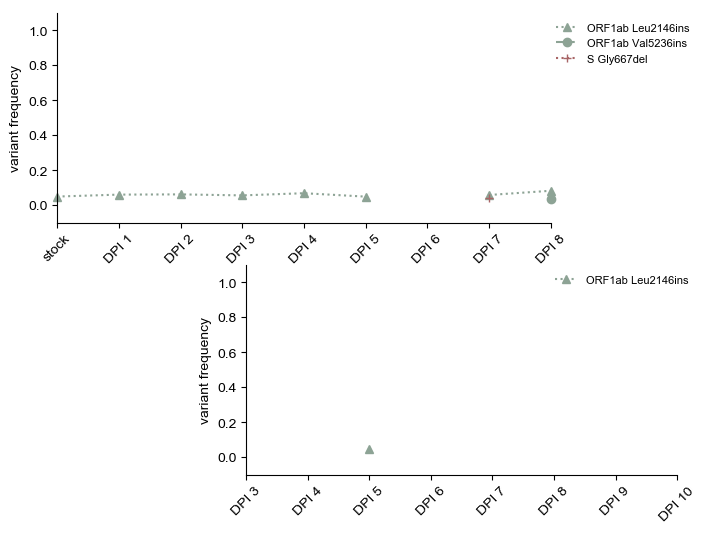

In [371]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 

cat3_orf1ab_Leu2146ins = cat3.loc[[0]]
cat3_orf1ab_Leu2146ins['SNP'] = cat3_orf1ab_Leu2146ins['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146ins'})
cat3_orf1ab_Leu2146ins = cat3_orf1ab_Leu2146ins[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Leu2146ins_T = cat3_orf1ab_Leu2146ins.T

cat3_orf1ab_Val5236ins = cat3.loc[[15]]
cat3_orf1ab_Val5236ins['SNP'] = cat3_orf1ab_Val5236ins['SNP'].replace({'ORF1ab_15911:G>GT_Val5236fs_frameshift':'ORF1ab Val5236ins'})
cat3_orf1ab_Val5236ins = cat3_orf1ab_Val5236ins[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_orf1ab_Val5236ins_T = cat3_orf1ab_Val5236ins.T

cat3_S_Gly667del = cat3.loc[[13]]
cat3_S_Gly667del['SNP'] = cat3_S_Gly667del['SNP'].replace({'S_23503:CATTGGTGCAGGTATATGCGCTAGTT>C_Gly667fs_frameshift':'S Gly667del'})
cat3_S_Gly667del = cat3_S_Gly667del[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_Gly667del_T = cat3_S_Gly667del.T

cat6_orf1ab_Leu2146ins = cat6.loc[[0]]
cat6_orf1ab_Leu2146ins['SNP'] = cat6_orf1ab_Leu2146ins['SNP'].replace({'ORF1ab_6642:C>CT_Leu2146fs_frameshift':'ORF1ab Leu2146ins'})
cat6_orf1ab_Leu2146ins = cat6_orf1ab_Leu2146ins[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_orf1ab_Leu2146ins_T = cat6_orf1ab_Leu2146ins.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(8,6), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0,0:8]) # index
ax2 = fig.add_subplot(gs[1,3:10])# contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True) 

#plot SNP lines - index 
cat3_orf1ab_Leu2146ins_T.plot(marker='^', color='#8DA395', linestyle='dotted', ax=ax1, legend=False, clip_on=False)
cat3_orf1ab_Val5236ins_T.plot(marker='o', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat3_S_Gly667del_T.plot(marker='+', color='#A86566', linestyle='dotted', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - contact
cat6_orf1ab_Leu2146ins_T.plot(marker='^', color='#8DA395', linestyle='dotted', ax=ax2, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('index cat 3')
ax1.set(xlabel="",ylabel="iSNV frequency")

# ax2.title.set_text('contact cat 6')
ax2.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

ax2.set_ylim([-0.1, 1.1])
ax2.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

# add legend
ax1.legend(bbox_to_anchor=(1.3,1), fontsize=8, frameon=False, ncol=1, labels=['ORF1ab Leu2146ins', 'ORF1ab Val5236ins', 'S Gly667del'])

ax2.legend(bbox_to_anchor=(1.05,1), fontsize=8, frameon=False, ncol=1, labels=['ORF1ab Leu2146ins',])
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/indels_over_time_pair_3.svg", bbox_inches='tight', dpi=300)

#

## Plotting only iSNVs of interest for primary fig 3 

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


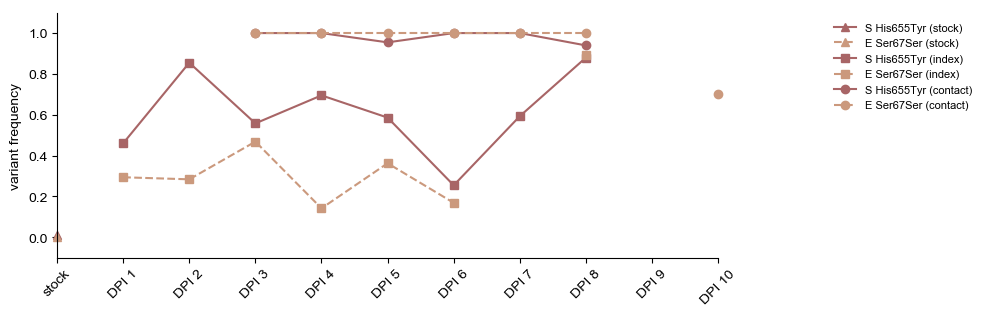

In [399]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
data = [['S His655Tyr', 0.0085]]
stock_655 = pd.DataFrame(data, columns = ['SNP', 'stock'])
stock_655 = stock_655.set_index('SNP')
stock_655['DPI 1'] = ''
stock_655['DPI 2'] = ''
stock_655['DPI 3'] = ''
stock_655['DPI 4'] = ''
stock_655['DPI 5'] = ''
stock_655['DPI 6'] = ''
stock_655['DPI 7'] = ''
stock_655['DPI 8'] = ''
stock_655['DPI 9'] = ''
stock_655['DPI 10'] = ''
stock_655 = stock_655.replace('', np.NaN, regex=True)
stock_655_T = stock_655.T

data = [['E Ser67Ser', 0.0034]]
stock_67 = pd.DataFrame(data, columns = ['SNP', 'stock'])
stock_67 = stock_67.set_index('SNP')
stock_67['DPI 1'] = ''
stock_67['DPI 2'] = ''
stock_67['DPI 3'] = ''
stock_67['DPI 4'] = ''
stock_67['DPI 5'] = ''
stock_67['DPI 6'] = ''
stock_67['DPI 7'] = ''
stock_67['DPI 8'] = ''
stock_67['DPI 9'] = ''
stock_67['DPI 10'] = ''
stock_67 = stock_67.replace('', np.NaN, regex=True)
stock_67_T = stock_67.T

cat1_S_His655Tyr = cat1.loc[[2]]
cat1_S_His655Tyr['SNP'] = cat1_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat1_S_His655Tyr = cat1_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_S_His655Tyr['DPI 9'] = ''
cat1_S_His655Tyr['DPI 10'] = ''
cat1_S_His655Tyr = cat1_S_His655Tyr.replace('', np.NaN, regex=True)
cat1_S_His655Tyr_T = cat1_S_His655Tyr.T

cat1_E_Ser67Ser = cat1.loc[[3]]
cat1_E_Ser67Ser['SNP'] = cat1_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat1_E_Ser67Ser = cat1_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat1_E_Ser67Ser['DPI 9'] = ''
cat1_E_Ser67Ser['DPI 10'] = ''
cat1_E_Ser67Ser = cat1_E_Ser67Ser.replace('', np.NaN, regex=True)
cat1_E_Ser67Ser_T = cat1_E_Ser67Ser.T

cat4_S_His655Tyr = cat4.loc[[3]]
cat4_S_His655Tyr['SNP'] = cat4_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat4_S_His655Tyr['stock'] = ''
cat4_S_His655Tyr['DPI 1'] = ''
cat4_S_His655Tyr['DPI 2'] = ''
cat4_S_His655Tyr = cat4_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_S_His655Tyr = cat4_S_His655Tyr.replace('', np.NaN, regex=True)
cat4_S_His655Tyr_T = cat4_S_His655Tyr.T

cat4_E_Ser67Ser = cat4.loc[[4]]
cat4_E_Ser67Ser['SNP'] = cat4_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat4_E_Ser67Ser['stock'] = ''
cat4_E_Ser67Ser['DPI 1'] = ''
cat4_E_Ser67Ser['DPI 2'] = ''
cat4_E_Ser67Ser = cat4_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat4_E_Ser67Ser = cat4_E_Ser67Ser.replace('', np.NaN, regex=True)
cat4_E_Ser67Ser_T = cat4_E_Ser67Ser.T  

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(12,7), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 14)

ax1 = fig.add_subplot(gs[0,0:10]) # index and contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNPs in the stcok 
stock_655_T.plot(marker='^', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
stock_67_T.plot(marker='^', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - index 
cat1_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat1_E_Ser67Ser_T.plot(marker='s', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - contact
cat4_S_His655Tyr_T.plot(marker='o', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat4_E_Ser67Ser_T.plot(marker='o', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

# add title and x axis text
ax1.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

positions = (0,1,2,3,4,5,6,7,8,9,10)
labels = ('stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10')
plt.xticks(positions, labels)

# add legend
ax1.legend(bbox_to_anchor=(1.4,1), fontsize=8, frameon=False, ncol=1, labels=['S His655Tyr (stock)', 'E Ser67Ser (stock)', 'S His655Tyr (index)', 'E Ser67Ser (index)', 'S His655Tyr (contact)', 'E Ser67Ser (contact)'])    


# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/iSNVs_of_interest_over_time_pair_1.svg", bbox_inches='tight', dpi=300)



/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


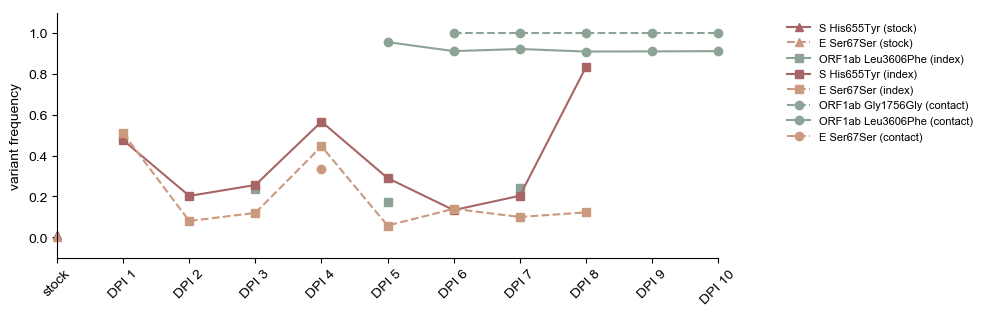

In [402]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
data = [['S His655Tyr', 0.0085]]
stock_655 = pd.DataFrame(data, columns = ['SNP', 'stock'])
stock_655 = stock_655.set_index('SNP')
stock_655['DPI 1'] = ''
stock_655['DPI 2'] = ''
stock_655['DPI 3'] = ''
stock_655['DPI 4'] = ''
stock_655['DPI 5'] = ''
stock_655['DPI 6'] = ''
stock_655['DPI 7'] = ''
stock_655['DPI 8'] = ''
stock_655['DPI 9'] = ''
stock_655['DPI 10'] = ''
stock_655 = stock_655.replace('', np.NaN, regex=True)
stock_655_T = stock_655.T

data = [['E Ser67Ser', 0.0034]]
stock_67 = pd.DataFrame(data, columns = ['SNP', 'stock'])
stock_67 = stock_67.set_index('SNP')
stock_67['DPI 1'] = ''
stock_67['DPI 2'] = ''
stock_67['DPI 3'] = ''
stock_67['DPI 4'] = ''
stock_67['DPI 5'] = ''
stock_67['DPI 6'] = ''
stock_67['DPI 7'] = ''
stock_67['DPI 8'] = ''
stock_67['DPI 9'] = ''
stock_67['DPI 10'] = ''
stock_67 = stock_67.replace('', np.NaN, regex=True)
stock_67_T = stock_67.T

cat2_orf1ab_Leu3606Phe = cat2.loc[[10]]
cat2_orf1ab_Leu3606Phe['SNP'] = cat2_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat2_orf1ab_Leu3606Phe = cat2_orf1ab_Leu3606Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_orf1ab_Leu3606Phe['DPI 9'] = ''
cat2_orf1ab_Leu3606Phe['DPI 10'] = ''
cat2_orf1ab_Leu3606Phe = cat2_orf1ab_Leu3606Phe.replace('', np.NaN, regex=True)
cat2_orf1ab_Leu3606Phe_T = cat2_orf1ab_Leu3606Phe.T

cat2_S_His655Tyr = cat2.loc[[3]]
cat2_S_His655Tyr['SNP'] = cat2_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat2_S_His655Tyr = cat2_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_S_His655Tyr['DPI 9'] = ''
cat2_S_His655Tyr['DPI 10'] = ''
cat2_S_His655Tyr = cat2_S_His655Tyr.replace('', np.NaN, regex=True)
cat2_S_His655Tyr_T = cat2_S_His655Tyr.T

cat2_E_Ser67Ser = cat2.loc[[5]]
cat2_E_Ser67Ser['SNP'] = cat2_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat2_E_Ser67Ser = cat2_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat2_E_Ser67Ser['DPI 9'] = ''
cat2_E_Ser67Ser['DPI 10'] = ''
cat2_E_Ser67Ser = cat2_E_Ser67Ser.replace('', np.NaN, regex=True)
cat2_E_Ser67Ser_T = cat2_E_Ser67Ser.T

cat5_orf1ab_Gly1756Gly = cat5.loc[[5]]
cat5_orf1ab_Gly1756Gly['SNP'] = cat5_orf1ab_Gly1756Gly['SNP'].replace({'ORF1ab_5479:A>G_Gly1756Gly_synonymous':'ORF1ab Gly1756Gly'})
cat5_orf1ab_Gly1756Gly['stock'] = ''
cat5_orf1ab_Gly1756Gly['DPI 1'] = ''
cat5_orf1ab_Gly1756Gly['DPI 2'] = ''
cat5_orf1ab_Gly1756Gly = cat5_orf1ab_Gly1756Gly[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Gly1756Gly = cat5_orf1ab_Gly1756Gly.replace('', np.NaN, regex=True)
cat5_orf1ab_Gly1756Gly_T = cat5_orf1ab_Gly1756Gly.T

cat5_orf1ab_Leu3606Phe = cat5.loc[[4]]
cat5_orf1ab_Leu3606Phe['SNP'] = cat5_orf1ab_Leu3606Phe['SNP'].replace({'ORF1ab_11029:G>T_Leu3606Phe_missense':'ORF1ab Leu3606Phe'})
cat5_orf1ab_Leu3606Phe['stock'] = ''
cat5_orf1ab_Leu3606Phe['DPI 1'] = ''
cat5_orf1ab_Leu3606Phe['DPI 2'] = ''
cat5_orf1ab_Leu3606Phe = cat5_orf1ab_Leu3606Phe[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_orf1ab_Leu3606Phe = cat5_orf1ab_Leu3606Phe.replace('', np.NaN, regex=True)
cat5_orf1ab_Leu3606Phe_T = cat5_orf1ab_Leu3606Phe.T

cat5_E_Ser67Ser = cat5.loc[[2]]
cat5_E_Ser67Ser['SNP'] = cat5_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat5_E_Ser67Ser['stock'] = ''
cat5_E_Ser67Ser['DPI 1'] = ''
cat5_E_Ser67Ser['DPI 2'] = ''
cat5_E_Ser67Ser = cat5_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat5_E_Ser67Ser = cat5_E_Ser67Ser.replace('', np.NaN, regex=True)
cat5_E_Ser67Ser_T = cat5_E_Ser67Ser.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(12,7), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 14)

ax1 = fig.add_subplot(gs[0,0:10]) # index and contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNPs in the stcok 
stock_655_T.plot(marker='^', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
stock_67_T.plot(marker='^', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - index 
cat2_orf1ab_Leu3606Phe_T.plot(marker='s', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat2_E_Ser67Ser_T.plot(marker='s', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - contact
cat5_orf1ab_Gly1756Gly_T.plot(marker='o', color='#8DA395', linestyle='dashed', ax=ax1, legend=False, clip_on=False)
cat5_orf1ab_Leu3606Phe_T.plot(marker='o', color='#8DA395', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat5_E_Ser67Ser_T.plot(marker='o', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

# add title and x axis text
# ax1.title.set_text('index cat 2')
ax1.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

# add title and x axis text
ax1.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

positions = (0,1,2,3,4,5,6,7,8,9,10)
labels = ('stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10')
plt.xticks(positions, labels)

# add legend
ax1.legend(bbox_to_anchor=(1.4,1), fontsize=8, frameon=False, ncol=1, labels=['S His655Tyr (stock)', 'E Ser67Ser (stock)', 'ORF1ab Leu3606Phe (index)', 'S His655Tyr (index)', 'E Ser67Ser (index)', 'ORF1ab Gly1756Gly (contact)', 'ORF1ab Leu3606Phe (contact)', 'E Ser67Ser (contact)'])    

# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/iSNVs_of_interest_over_time_pair_2.svg", bbox_inches='tight', dpi=300)



/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


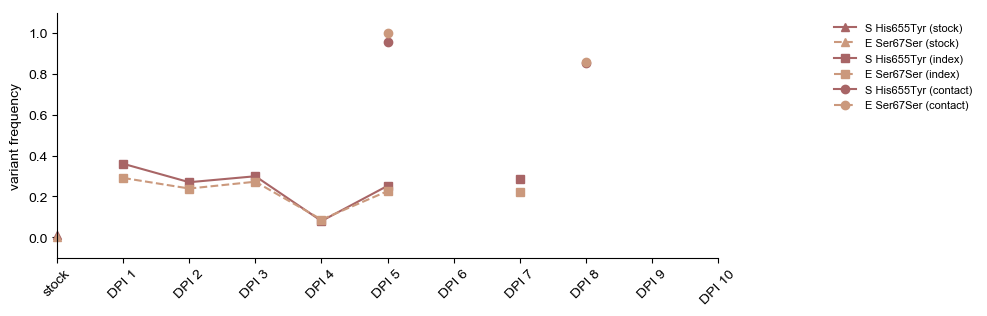

In [403]:
#format each SNP individually - color = gene, linetype = annotation, marker = SNP 
data = [['S His655Tyr', 0.0085]]
stock_655 = pd.DataFrame(data, columns = ['SNP', 'stock'])
stock_655 = stock_655.set_index('SNP')
stock_655['DPI 1'] = ''
stock_655['DPI 2'] = ''
stock_655['DPI 3'] = ''
stock_655['DPI 4'] = ''
stock_655['DPI 5'] = ''
stock_655['DPI 6'] = ''
stock_655['DPI 7'] = ''
stock_655['DPI 8'] = ''
stock_655['DPI 9'] = ''
stock_655['DPI 10'] = ''
stock_655 = stock_655.replace('', np.NaN, regex=True)
stock_655_T = stock_655.T

data = [['E Ser67Ser', 0.0034]]
stock_67 = pd.DataFrame(data, columns = ['SNP', 'stock'])
stock_67 = stock_67.set_index('SNP')
stock_67['DPI 1'] = ''
stock_67['DPI 2'] = ''
stock_67['DPI 3'] = ''
stock_67['DPI 4'] = ''
stock_67['DPI 5'] = ''
stock_67['DPI 6'] = ''
stock_67['DPI 7'] = ''
stock_67['DPI 8'] = ''
stock_67['DPI 9'] = ''
stock_67['DPI 10'] = ''
stock_67 = stock_67.replace('', np.NaN, regex=True)
stock_67_T = stock_67.T

cat3_S_His655Tyr = cat3.loc[[2]]
cat3_S_His655Tyr['SNP'] = cat3_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat3_S_His655Tyr = cat3_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_S_His655Tyr['DPI 9'] = ''
cat3_S_His655Tyr['DPI 10'] = ''
cat3_S_His655Tyr = cat3_S_His655Tyr.replace('', np.NaN, regex=True)
cat3_S_His655Tyr_T = cat3_S_His655Tyr.T

cat3_E_Ser67Ser = cat3.loc[[3]]
cat3_E_Ser67Ser['SNP'] = cat3_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat3_E_Ser67Ser = cat3_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8']]
cat3_E_Ser67Ser['DPI 9'] = ''
cat3_E_Ser67Ser['DPI 10'] = ''
cat3_E_Ser67Ser = cat3_E_Ser67Ser.replace('', np.NaN, regex=True)
cat3_E_Ser67Ser_T = cat3_E_Ser67Ser.T

cat6_S_His655Tyr = cat6.loc[[2]]
cat6_S_His655Tyr['SNP'] = cat6_S_His655Tyr['SNP'].replace({'S_23471:C>T_His655Tyr_missense':'S His655Tyr'})
cat6_S_His655Tyr = cat6_S_His655Tyr[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_S_His655Tyr['stock'] = ''
cat6_S_His655Tyr['DPI 1'] = ''
cat6_S_His655Tyr['DPI 2'] = ''
cat6_S_His655Tyr = cat6_S_His655Tyr[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_S_His655Tyr = cat6_S_His655Tyr.replace('', np.NaN, regex=True)
cat6_S_His655Tyr_T = cat6_S_His655Tyr.T

cat6_E_Ser67Ser = cat6.loc[[3]]
cat6_E_Ser67Ser['SNP'] = cat6_E_Ser67Ser['SNP'].replace({'E_26391:T>C_Ser67Ser_synonymous':'E Ser67Ser'})
cat6_E_Ser67Ser = cat6_E_Ser67Ser[['DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_E_Ser67Ser['stock'] = ''
cat6_E_Ser67Ser['DPI 1'] = ''
cat6_E_Ser67Ser['DPI 2'] = ''
cat6_E_Ser67Ser = cat6_E_Ser67Ser[['stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10']]
cat6_E_Ser67Ser = cat6_E_Ser67Ser.replace('', np.NaN, regex=True)
cat6_E_Ser67Ser_T = cat6_E_Ser67Ser.T

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(12,7), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 14)

ax1 = fig.add_subplot(gs[0,0:10]) # index and contact

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

#plot SNPs in the stcok 
stock_655_T.plot(marker='^', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
stock_67_T.plot(marker='^', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - index 
cat3_S_His655Tyr_T.plot(marker='s', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat3_E_Ser67Ser_T.plot(marker='s', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

#plot SNP lines - contact
cat6_S_His655Tyr_T.plot(marker='o', color='#A86566', linestyle='solid', ax=ax1, legend=False, clip_on=False)
cat6_E_Ser67Ser_T.plot(marker='o', color='#CB997D', linestyle='dashed', ax=ax1, legend=False, clip_on=False)

# add title and x axis text
ax1.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

# add title and x axis text
ax1.set(xlabel="",ylabel="iSNV frequency")

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_ylabel('variant frequency')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

positions = (0,1,2,3,4,5,6,7,8,9,10)
labels = ('stock', 'DPI 1', 'DPI 2', 'DPI 3', 'DPI 4', 'DPI 5', 'DPI 6', 'DPI 7', 'DPI 8', 'DPI 9', 'DPI 10')
plt.xticks(positions, labels)

# add legend
ax1.legend(bbox_to_anchor=(1.4,1), fontsize=8, frameon=False, ncol=1, labels=['S His655Tyr (stock)', 'E Ser67Ser (stock)', 'S His655Tyr (index)', 'E Ser67Ser (index)',  'S His655Tyr (contact)', 'E Ser67Ser (contact)'])    

# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

# save figure 
plt.savefig("../figures/iSNVs_of_interest_over_time_pair_3.svg", bbox_inches='tight', dpi=300)

